<a id='top'></a>

# Creating a of Chance Quality Model from Shots Data
##### Notebook to create a Chance Quality Model (CQM) model using a provided sample of just under 11,000 shots

### By [Edd Webster](https://www.twitter.com/eddwebster)
Notebook first written: 08/03/2021<br>
Notebook submitted for review: 21/03/2021<br>
Notebook last updated: 24/03/2021

![title](../../img/expected_goals_visual.png)

Photo credit to David Sumpter ([@Soccermatics](https://twitter.com/Soccermatics?)).

---

## <a id='introduction'>Introduction</a>
This notebook is a short walk-through of how to create an Expected Goals (xG) model using a just under 11,00 shots, in [Python](https://www.python.org/), using [pandas](http://pandas.pydata.org/) DataFrames, [scikit-learn](https://scikit-learn.org/stable/) for Machine Learning, and [matplotlib](https://matplotlib.org/contents.html?v=20200411155018) visualisations.

For more information about this notebook and the author, I am available through all the following channels:
*    [eddwebster.com](https://www.eddwebster.com/);
*    edd.j.webster@gmail.com;
*    [@eddwebster](https://www.twitter.com/eddwebster);
*    [linkedin.com/in/eddwebster](https://www.linkedin.com/in/eddwebster/);
*    [github/eddwebster](https://github.com/eddwebster/); and
*    [public.tableau.com/profile/edd.webster](https://public.tableau.com/profile/edd.webster).

![title](../../img/edd_webster/fifa21eddwebsterbanner.png)

The accompanying GitHub repository for this notebook can be found [here](https://github.com/eddwebster/mcfc_submission/) and a static version of this notebook can be found [here](https://nbviewer.jupyter.org/github/eddwebster/mcfc_submission/blob/main/notebooks/chance_quality_modelling/Creating%20a%20Chance%20Quality%20Model%20from%20Shots%20Data.ipynb).

___

## <a id='notebook_contents'>Notebook Contents</a>
1.     [Notebook Dependencies](#section1)<br>
2.     [Project Brief](#section2)<br>
3.     [Data Sources](#section3)<br>
       1.    [Data Dictionary](#section3.1)<br>
       2.    [Creating the DataFrame](#section3.2)<br>
       3.    [Initial Data Handling](#section3.3)<br>    
4.     [Data Engineering](#section4)<br>
5.     [Initial Modeling](#section5)<br>
6.     [Metric definition](#section6)<br>
7.     [Treating Outliers](#section7)<br>
       1.    [Shot Position](#section7.1)<br>
       2.    [Body Part](#section7.2)<br>
       3.    [Number of Intervening Opponents](#section7.3)<br>   
       4.    [Number of Intervening Teammates](#section7.4)<br>   
       5.    [Interference on Shooter](#section7.5)<br>   
       6.    [Impact on Log Loss](#section7.6)<br>   
8.     [Univariate Analysis](#section8)<br>
       1.    [Distance](#section8.1)<br>
       2.    [Position Y](#section8.2)<br>
       3.    [Angle](#section8.3)<br>   
       4.    [Number of Intervening Opponents](#section8.4)<br> 
       5.    [Number of Intervening Teammates](#section8.5)<br>
       6.    [Body Part](#section8.6)<br>
       7.    [Interference on Shooter](#section8.7)<br>
       8.    [Model Performance](#section8.8)<br>
9.     [Feature Engineering](#section9)<br>
       1.    [Features to Add](#section9.1)<br>
       2.    [Wishlist Features](#section9.2)<br>
10.    [Multivariate Analysis](#section10)<br>
11.    [Final Model and Evaluation](#section11)<br>
12.    [Feature Interpretation](#section12)<br>
13.    [Apply the Trained Chance Quality Model to the Metrica Sports Data](#section13)<br>
14.    [Assessment of the Performance of the Teams in Game 2 of the Metrica Sports Shot Data](#section14)<br>
15.    [Summary](#section15)<br>
16.    [Next Steps](#section16)<br>
17.    [References and Further Reading](#section17)<br>

---

## <a id='#section1'>1. Notebook Dependencies</a>
This notebook was written using [Python 3](https://docs.python.org/3.7/) and requires the following libraries:
*    [`Jupyter notebooks`](https://jupyter.org/) for this notebook environment with which this project is presented;
*    [`NumPy`](http://www.numpy.org/) for multidimensional array computing;
*    [`pandas`](http://pandas.pydata.org/) for data analysis and manipulation;
*    [`matplotlib`](https://matplotlib.org/contents.html?v=20200411155018) for data visualisations; and
*    [`scikit-learn`](https://scikit-learn.org/stable/index.html) for Machine Learning.

All packages used for this notebook except can be obtained by downloading and installing the [Conda](https://anaconda.org/anaconda/conda) distribution, available on all platforms (Windows, Linux and Mac OSX). Step-by-step guides on how to install Anaconda can be found for Windows [here](https://medium.com/@GalarnykMichael/install-python-on-windows-anaconda-c63c7c3d1444) and Mac [here](https://medium.com/@GalarnykMichael/install-python-on-mac-anaconda-ccd9f2014072), as well as in the Anaconda documentation itself [here](https://docs.anaconda.com/anaconda/install/).

### Import Libraries and Modules

In [1]:
%load_ext autoreload
%autoreload 2

# Python ≥3.5 (ideally)
import platform
import sys, getopt
assert sys.version_info >= (3, 5)
import csv

# Import Dependencies
%matplotlib inline

# Math Operations
import numpy as np
import math
from math import pi

# Datetime
import datetime
from datetime import date
import time

# Data Preprocessing
import pandas as pd
import os
import re
import random
from io import BytesIO
from pathlib import Path

# Reading directories
import glob
import os
from os.path import basename

# Working with JSON
import json
from pandas.io.json import json_normalize

# Data Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import patches
from matplotlib.patches import Arc
from matplotlib.colors import ListedColormap
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno as msno

# Downloading data sources
from urllib.parse import urlparse
from urllib.request import urlopen, urlretrieve
from zipfile import ZipFile, is_zipfile
from tqdm import tqdm

# Football libraries
#import FCPython
#from FCPython import createPitch
import matplotsoccer

# Machine Learning
import scipy as sp
from scipy.spatial import distance
from sklearn.ensemble import RandomForestClassifier
#from sklearn.inspection import permutation_importance
import sklearn.metrics as sk_metrics
from sklearn.metrics import log_loss, brier_score_loss, roc_auc_score , roc_curve, average_precision_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scikitplot.metrics import plot_roc_curve, plot_precision_recall_curve, plot_calibration_curve
import pickle
from xgboost import XGBClassifier   # version 1.0.2

# Display in Jupyter
from IPython.display import Image, Video, YouTubeVideo
from IPython.core.display import HTML

# Ignore Warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

print('Setup Complete')

Setup Complete


In [2]:
# Python / module versions used here for reference
print('Python: {}'.format(platform.python_version()))
print('NumPy: {}'.format(np.__version__))
print('pandas: {}'.format(pd.__version__))
print('matplotlib: {}'.format(mpl.__version__))
print('Seaborn: {}'.format(sns.__version__))

Python: 3.7.6
NumPy: 1.18.0
pandas: 1.2.0
matplotlib: 3.3.2
Seaborn: 0.11.1


### Defined Variables

In [3]:
# Define today's date
today = datetime.datetime.now().strftime('%d/%m/%Y').replace('/', '')

### Defined Filepaths

In [4]:
# Set up initial paths to subfolders
base_dir = os.path.join('..', '..')
data_dir = os.path.join(base_dir, 'data')
data_dir_shots = os.path.join(base_dir, 'data', 'shots')
data_dir_metrica = os.path.join(base_dir, 'data', 'metrica-sports')
models_dir = os.path.join(base_dir, 'models')
models_dir_shots = os.path.join(base_dir, 'models', 'shots')
scripts_dir = os.path.join(base_dir, 'scripts')
img_dir = os.path.join(base_dir, 'img')
fig_dir = os.path.join(base_dir, 'img', 'fig')
fig_shots_dir = os.path.join(base_dir, 'img', 'fig', 'shots')
video_dir = os.path.join(base_dir, 'video')

### Custom Functions

In [5]:
# Custom function to draw a football pitch by Peter McKeever. See: http://petermckeever.com/2020/10/how-to-draw-a-football-pitch/
def draw_pitch(x_min=0, x_max=105,
               y_min=0, y_max=68,
               pitch_color="w",
               line_color="grey",
               line_thickness=1.5,
               point_size=20,
               orientation="horizontal",
               aspect="full",
               ax=None
               ):

    if not ax:
        raise TypeError("This function is intended to be used with an existing fig and ax in order to allow flexibility in plotting of various sizes and in subplots.")


    if orientation.lower().startswith("h"):
        first = 0
        second = 1
        arc_angle = 0

        if aspect == "half":
            ax.set_xlim(x_max / 2, x_max + 5)

    elif orientation.lower().startswith("v"):
        first = 1
        second = 0
        arc_angle = 90

        if aspect == "half":
            ax.set_ylim(x_max / 2, x_max + 5)

    
    else:
        raise NameError("You must choose one of horizontal or vertical")

    
    ax.axis("off")

    rect = plt.Rectangle((x_min, y_min),
                         x_max, y_max,
                         facecolor=pitch_color,
                         edgecolor="none",
                         zorder=-2)

    ax.add_artist(rect)

    x_conversion = x_max / 100
    y_conversion = y_max / 100

    pitch_x = [0,5.8,11.5,17,50,83,88.5,94.2,100] # pitch x markings
    pitch_x = [x * x_conversion for x in pitch_x]

    pitch_y = [0, 21.1, 36.6, 50, 63.2, 78.9, 100] # pitch y markings
    pitch_y = [x * y_conversion for x in pitch_y]

    goal_y = [45.2, 54.8] # goal posts
    goal_y = [x * y_conversion for x in goal_y]

    # side and goal lines
    lx1 = [x_min, x_max, x_max, x_min, x_min]
    ly1 = [y_min, y_min, y_max, y_max, y_min]

    # outer boxed
    lx2 = [x_max, pitch_x[5], pitch_x[5], x_max]
    ly2 = [pitch_y[1], pitch_y[1], pitch_y[5], pitch_y[5]]

    lx3 = [0, pitch_x[3], pitch_x[3], 0]
    ly3 = [pitch_y[1], pitch_y[1], pitch_y[5], pitch_y[5]]

    # goals
    lx4 = [x_max, x_max+2, x_max+2, x_max]
    ly4 = [goal_y[0], goal_y[0], goal_y[1], goal_y[1]]

    lx5 = [0, -2, -2, 0]
    ly5 = [goal_y[0], goal_y[0], goal_y[1], goal_y[1]]

    # 6 yard boxes
    lx6 = [x_max, pitch_x[7], pitch_x[7], x_max]
    ly6 = [pitch_y[2],pitch_y[2], pitch_y[4], pitch_y[4]]

    lx7 = [0, pitch_x[1], pitch_x[1], 0]
    ly7 = [pitch_y[2],pitch_y[2], pitch_y[4], pitch_y[4]]


    # Halfway line, penalty spots, and kickoff spot
    lx8 = [pitch_x[4], pitch_x[4]]
    ly8 = [0, y_max]

    lines = [
        [lx1, ly1],
        [lx2, ly2],
        [lx3, ly3],
        [lx4, ly4],
        [lx5, ly5],
        [lx6, ly6],
        [lx7, ly7],
        [lx8, ly8],
        ]

    points = [
        [pitch_x[6], pitch_y[3]],
        [pitch_x[2], pitch_y[3]],
        [pitch_x[4], pitch_y[3]]
        ]

    circle_points = [pitch_x[4], pitch_y[3]]
    arc_points1 = [pitch_x[6], pitch_y[3]]
    arc_points2 = [pitch_x[2], pitch_y[3]]


    for line in lines:
        ax.plot(line[first], line[second],
                color=line_color,
                lw=line_thickness,
                zorder=-1)

    for point in points:
        ax.scatter(point[first], point[second],
                   color=line_color,
                   s=point_size,
                   zorder=-1)

    circle = plt.Circle((circle_points[first], circle_points[second]),
                        x_max * 0.088,
                        lw=line_thickness,
                        color=line_color,
                        fill=False,
                        zorder=-1)

    ax.add_artist(circle)

    arc1 = Arc((arc_points1[first], arc_points1[second]),
               height=x_max * 0.088 * 2,
               width=x_max * 0.088 * 2,
               angle=arc_angle,
               theta1=128.75,
               theta2=231.25,
               color=line_color,
               lw=line_thickness,
               zorder=-1)

    ax.add_artist(arc1)

    arc2 = Arc((arc_points2[first], arc_points2[second]),
               height=x_max * 0.088 * 2,
               width=x_max * 0.088 * 2,
               angle=arc_angle,
               theta1=308.75,
               theta2=51.25,
               color=line_color,
               lw=line_thickness,
               zorder=-1)

    ax.add_artist(arc2)

    ax.set_aspect("equal")

    return ax

### Notebook Settings

In [6]:
# Display all columns of pandas DataFrames
pd.set_option('display.max_columns', None)

---

## <a id='#section2'>2. Project Brief</a>

### <a id='#section2.1'>2.1. About this notebook</a>
This notebook is the first in a series of notebooks to create a Chance Quality model from the Event data of just under 11,000 shots, using [pandas](http://pandas.pydata.org/) DataFrames for data manipulation, [scikit-learn](https://scikit-learn.org/stable/) and [XGBoost](https://xgboost.readthedocs.io/en/latest/) for Machine Learning, and [matplotlib](https://matplotlib.org/contents.html?v=20200411155018) for data visualisation.

**Notebook Conventions**:<br>
*    Variables that refer a `DataFrame` object are prefixed with `df_`.
*    Variables that refer to a collection of `DataFrame` objects (e.g., a list, a set or a dict) are prefixed with `dfs_`.

### <a id='#section2.2'>2.2. Challenge</a>
As defined in the email brief.

<b>Step 1:</b>
We have attached to this email a sample of just under 11,000 shots (ShotData.csv, and the associated description in ShotData.txt). We would like you to use this data to build a chance quality model that calculates the probability of a shot resulting in a goal (i.e. P[goal|shot,situation]) using whichever situational variables in the data you think are informative. We ask that you provide a description of the method that you chose, including any metrics and plots that you have used to understand and assess the performance of your model. This description may take the form of a short written report (no more than one page of text plus additional room for figures & tables) or a slide pack (PowerPoint, Google slides, etc; no more than a total of 10 slides).

<b>Step 2:</b>
In the second step we ask you to work with the tracking data for a single game to analyse the shooting opportunities that each team created. In this github repository* you will find the tracking data for two matches, along with a description of the data. Using the data for sample game 2 in the repository, identify the shots in this game and write a short report describing the major chances that each team created during the game, making use of the chance quality model that you developed in Step 1 and any other information that you think is relevant. Based solely on the quality of chances that each team created, which team do you think deserved to win the game? Your report may take the form of a document (1 page plus additional room for figures & tables) or presentation (no more than 10 slides).

This notebook is concerned with <b>Step 1</b> - building a Chance Quality Model.

To build this Chance Quality Model, we will be using a metric popular in Football Analytics called <b>Expected Goals</b>, otherwise known as <b>xG</b>.

### <a id='#section2.3'>2.3. What is xG?</a>
["Expected goals"](https://en.wikipedia.org/wiki/Expected_goals) or more commonly known as 'xG', is a derived football metric, which allows you to evaluate team and player performance. In a low-scoring game such as football, final match score does not provide a clear picture of performance. More and more professional clubs and sports analytics teams are now turning to the advanced models like xG, which is a statistical measure of the quality of chances created and conceded.

As a metric, xG assesses every chance, essentially answering the question of whether a player should have scored from a certain opportunity. Put simply, it is a way of assigning a "quality" value (xG) to every attempt based on what we know about it. The higher the xG - with 1 being the maximum - the more likelihood of the opportunity being taken. So if a chance is 0.5xG, it should be scored 50% of the time.

xG was created by [Sam Green](https://twitter.com/aSamGreen) from [Opta](https://www.optasports.com/) after analysing over 300,000 shots to calculate the likelihood of an attempt being scored from a specific position on the pitch during a particular phase of play.

The factors taken into account when assessing the quality of a chance include:
*    Distance from goal
*    Angle of the shot
*    Did the chance fall at the player's feet or was it a header?
*    Was it a one on one?
*    What was the assist like? (eg long ball, cross, through ball, pull-back)
*    In what passage of play did it happen? (eg open play, direct free-kick, corner kick)
*    Has the player just beaten an opponent?
*    Is it a rebound?

The expected goals value reveals a number of things including:
*    Whether a chance really is as good as we think. While football is still a game that where debate and opinion make a huge part of the build up and analysis of matches, using xG we can now say with some certainty whether an opportunity should have been taken.
*    How many goals an individual player should be scoring from the chances their have. A striker might be top of the scoring charts, but does that necessarily mean he is the best finisher in the league? Previously we might have simply looked at their conversion rate (how many of their chances ended up as goals), but this did not provide the whole picture, as someone with a high conversion rate might just be the beneficiary of their team creating really clear-cut chances.
*    Team performance. If a team is performing above or below expectations at the start of the new season, a look at their expected goals difference could tell you whether that run is likely to last.

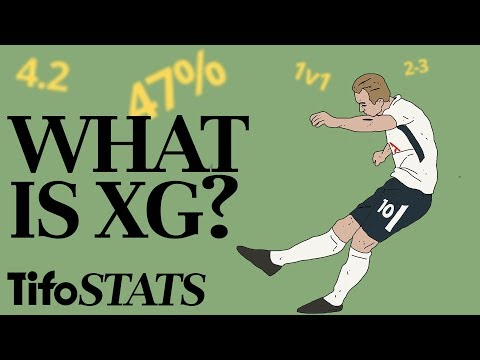

In [7]:
# What is xG? by Alex Stewart for Tifo Football
YouTubeVideo('zSaeaFcm1SY')

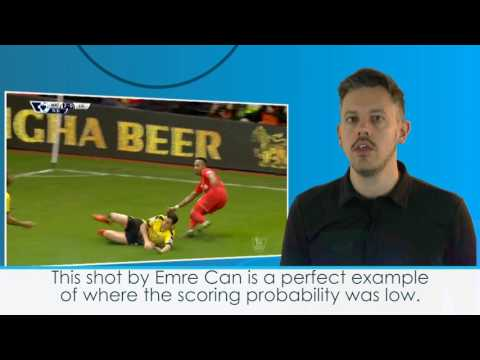

In [8]:
# Opta Expected Goals presented by Duncan Alexander (@oilysailor)
YouTubeVideo('w7zPZsLGK18')

### <a id='#section2.4'>2.4. Modelling Approach</a>
This model will first create Logistic Regression model, for which the approach taken in this notebook can be defined as the following:

*    <b>Import data and initial data handling</b>: import CSV file as a pandas DataFrame and conduct basic data exploration ([section 3](#section3));
*    <b>Data Engineering</b>: convert pitch dimensions to match those used with Metrica Sports data, clean the data, and subset the data for Open Play shots i.e. shots that are not Penalties or Free Kicks ([section 4](#section4));
*    <b>Initial modeling:</b> build first logistic model as a baseline ([section 5](#section5));
*    <b>Bias detection:</b> understand the inherit bias of the dataset provided ([section 6](#section6));
*    <b>Metric definition:</b> define appropriate metrics for a Logistic Regression model to predict probabilities of goals scored and rule out inappropriate metrics ([section 7](#section7));
*    <b>Treating outliers:</b> find and treat outliers in the dataset to improve model ([section 8](#section8));
*    <b>Univariate analysis:</b> engineer the first set of features to be usable in our logistic regression approach ([section 9](#section9));
*    <b>Feature Engineering:</b> createe additional features for dataset and evaluate as to whether their inclusion improves the model performance ([section 10](#section10));
*    <b>Multivariate analysis:</b> analysis the complete set of features and their correlations. ([section 11](#section11));
*    <b>Final model:</b> productionise final model and assess for performance performance ([section 12](#section12)); and
*    <b>Feature interpretation:</b> Interpret model features ([section 13](#section13)).

---

## <a id='#section3'>3. Data Sources</a>
The following cells read in the raw Shots CSV data provided by Laurie Shaw for City Football Group.

### <a id='#section3.1'>3.1. Data Dictionary</a>
The following information is as per the definition in the `ShotData.txt` documentation, provided with the data.

The raw shots DataFrame has ten features (columns) with the following definitions and data types:

| Feature                           | Variables Type     | Data Type    | Description    |
|-----------------------------------|--------------------|--------------|--------------------------------------|
| `match_minute`                    | continuous         | int64        | minute of the match in which the shot was taken     |
| `match_second`                    | continuous         | int64        | second of match_minute in which the shot was taken     |
| `position_x`                      | continuous         | float64      | position of the shot on the pitch in meters (x-coordinate)     |
| `position_y`                      | continuous         | float64      | position of the shot on the pitch in meters (y-coordinate)     |
| `play_type`                       | categorical        | object       | game situation in which the shot was taken (open play, penalty, direct free kick, direct from a corner)     |
| `BodyPart`                        | categorical        | object       | body part with which shot was taken (left foot, right foot, head, other)                        |
| `Number_Intervening_Opponents`    | discrete           | int64        | The number of opposing players that were obscuring the goal at the instant of the shot (from the perspective of the shot-taker)     |
| `Number_Intervening_Teammates`    | discrete           | int64        | The number of teammates that are obscuring the goal at the instant of the shot (from the perspective of the shot-taker)     |
| `Interference_on_Shooter`         | categorical        | object       | The degree of direct interference exerted on the shot-taker from defenders (Low - no or minimal interference, Medium - a single defender was in close proximity to the shot-taker; High - multiple defenders in close proximity and interfering with the shot).     |
| `outcome`                         | discrete.          | object       | The outcome of the shot (blocked, missed, goal frame (post or bar), saved, goal or own goal).     |

Each row consists of a single shot event. 

Positions are quoted in meters, with the origin located at the centre of the goal. The x-coordinate measures perpendicular distance from the goal line while the y-coordinate measures perpendicular distance from the line that joins the centre spot and the centre of the goal. For example, a penalty is at co-ordinates (10.97, 0) meters.

### <a id='#section3.2'>3.2. Read in CSV as pandas DataFrame</a>
The following cell read the the `CSV` file as a pandas `DataFrame`.

In [10]:
# Read data directory
print(glob.glob(os.path.join(data_dir_shots, 'raw/*')))

['../../data/shots/raw/ShotData.csv', '../../data/shots/raw/ShotData.txt']


In [11]:
# Read in raw Shots CSV as a pandas DataFrame
df_shots_raw = pd.read_csv(os.path.join(data_dir_shots, 'raw', 'ShotData.csv'))

### <a id='#section3.3'>3.3. Initial Data Handling</a>
Let's quality of the dataset by looking first and last rows in pandas using the [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) and [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) methods.

In [12]:
# Display the first 5 rows of the raw DataFrame, df_shots_raw
df_shots_raw.head()

,match_minute,match_second,position_x,position_y,play_type,BodyPart,Number_Intervening_Opponents,Number_Intervening_Teammates,Interference_on_Shooter,outcome
0,7,24,3.24,-0.75,Open Play,Head,1,0,Low,Goal
1,34,55,24.94,0.75,Open Play,Left,3,0,Medium,Missed
2,60,33,3.74,-0.50,Open Play,Right,1,0,Low,Missed
3,68,42,21.45,-8.48,Direct freekick,Left,4,2,Low,Blocked
4,18,0,10.23,4.99,Open Play,Head,1,0,Low,Missed


In [13]:
# Display the last 5 rows of the raw DataFrame, df_shots_raw
df_shots_raw.tail()

,match_minute,match_second,position_x,position_y,play_type,BodyPart,Number_Intervening_Opponents,Number_Intervening_Teammates,Interference_on_Shooter,outcome
10920,18,16,13.72,4.49,Open Play,Left,1,2,Medium,Goal
10921,8,39,9.48,6.24,Open Play,Head,1,0,Medium,Goal
10922,28,55,23.94,-7.73,Open Play,Right,3,1,Medium,Missed
10923,15,50,20.95,8.23,Open Play,Left,2,0,Medium,Missed
10924,47,22,7.23,4.99,Open Play,Right,1,0,High,Saved


In [14]:
# Print the shape of the raw DataFrame, df_shots_raw
print(df_shots_raw.shape)

(10925, 10)


In [15]:
# Print the column names of the raw DataFrame, df_shots_raw
print(df_shots_raw.columns)

Index(['match_minute', 'match_second', 'position_x', 'position_y', 'play_type',
       'BodyPart', 'Number_Intervening_Opponents',
       'Number_Intervening_Teammates', 'Interference_on_Shooter', 'outcome'],
      dtype='object')


The dataset has ten features (columns). Full details of these attributes can be found in the [Data Dictionary](section3.3.1).

In [16]:
# Data types of the features of the raw DataFrame, df_shots_raw
df_shots_raw.dtypes

match_minute                      int64
match_second                      int64
position_x                      float64
position_y                      float64
play_type                        object
BodyPart                         object
Number_Intervening_Opponents      int64
Number_Intervening_Teammates      int64
Interference_on_Shooter          object
outcome                          object
dtype: object

Full details of these attributes and their data types can be found in the [Data Dictionary](section3.3.1).

In [17]:
# Print statements about the dataset

## Assign variables
count_shots = len(df_shots_raw)
count_goals = len(df_shots_raw[(df_shots_raw['outcome'] == 'Goal') | (df_shots_raw['outcome'] == 'owngoal')])
cols = list(df_shots_raw)
vals_play_type = df_shots_raw['play_type'].unique()
vals_body_part = df_shots_raw['BodyPart'].unique()
vals_interference = df_shots_raw['Interference_on_Shooter'].unique()
vals_outcome = df_shots_raw['outcome'].unique()

## Print statements
print(f'The shots DataFrame contains {count_shots:,} shots and {count_goals:,} goals ({round(100*count_goals/count_shots,1)}%).\n')
print(f"The dataset contains the following columns: {cols}\n")
print(f"Unique values in the 'play_type' column: {vals_play_type}\n")    
print(f"Unique values in the 'BodyPart' column: {vals_body_part}\n")    
print(f"Unique values in the 'Interference_on_Shooter' column: {vals_interference}\n")    
print(f"Unique values in the 'outcome' column: {vals_outcome}\n")    

The shots DataFrame contains 10,925 shots and 1,374 goals (12.6%).

The dataset contains the following columns: ['match_minute', 'match_second', 'position_x', 'position_y', 'play_type', 'BodyPart', 'Number_Intervening_Opponents', 'Number_Intervening_Teammates', 'Interference_on_Shooter', 'outcome']

Unique values in the 'play_type' column: ['Open Play' 'Direct freekick' 'Penalty' 'Direct corner' 'Direct Corner']

Unique values in the 'BodyPart' column: ['Head' 'Left' 'Right' 'Other']

Unique values in the 'Interference_on_Shooter' column: ['Low' 'Medium' 'High' nan]

Unique values in the 'outcome' column: ['Goal' 'Missed' 'Blocked' 'Saved' 'GoalFrame' 'owngoal']



In [18]:
# Shot outcomes types and their frequency
df_shots_raw.groupby(['outcome']).outcome.count()

outcome
Blocked      2155
Goal         1331
GoalFrame     215
Missed       4254
Saved        2927
owngoal        43
Name: outcome, dtype: int64

In [19]:
# Shot interference types and their frequency
df_shots_raw.groupby(['Interference_on_Shooter']).outcome.count()

Interference_on_Shooter
High      1694
Low       4050
Medium    5138
Name: outcome, dtype: int64

In [20]:
# Info for the raw DataFrame, df_shots_raw
df_shots_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10925 entries, 0 to 10924
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   match_minute                  10925 non-null  int64  
 1   match_second                  10925 non-null  int64  
 2   position_x                    10925 non-null  float64
 3   position_y                    10925 non-null  float64
 4   play_type                     10925 non-null  object 
 5   BodyPart                      10925 non-null  object 
 6   Number_Intervening_Opponents  10925 non-null  int64  
 7   Number_Intervening_Teammates  10925 non-null  int64  
 8   Interference_on_Shooter       10882 non-null  object 
 9   outcome                       10925 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 853.6+ KB


In [21]:
# Description of the raw DataFrame, df_shots_raw, showing some summary statistics for each numerical column in the DataFrame
df_shots_raw.describe()

,match_minute,match_second,position_x,position_y,Number_Intervening_Opponents,Number_Intervening_Teammates
count,10925.000000,10925.000000,10925.000000,10925.000000,10925.000000,10925.000000
mean,48.576018,29.310481,14.614466,0.367259,2.534828,0.339314
std,26.434263,17.305743,7.879827,8.983705,1.388344,0.678376
min,0.000000,0.000000,0.000000,-33.920000,0.000000,0.000000
25%,26.000000,14.000000,8.480000,-5.740000,2.000000,0.000000
50%,49.000000,29.000000,12.470000,0.500000,2.000000,0.000000
75%,71.000000,44.000000,20.950000,6.730000,3.000000,0.000000
max,98.000000,59.000000,70.820000,33.920000,11.000000,7.000000


<AxesSubplot:>

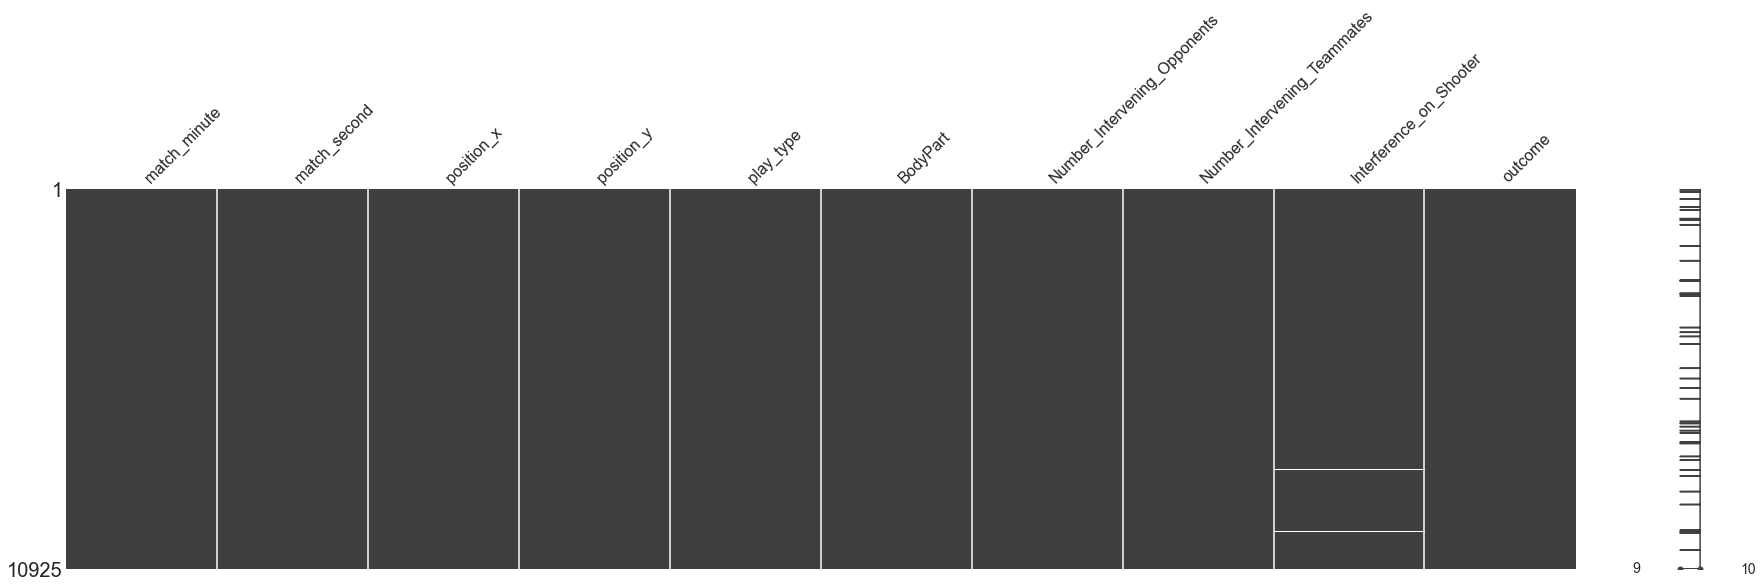

In [22]:
# Plot visualisation of the missing values for each feature of the raw DataFrame, df_shots_raw
msno.matrix(df_shots_raw, figsize = (30, 7))

In [23]:
# Counts of missing values
null_value_stats = df_shots_raw.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

Interference_on_Shooter    43
dtype: int64

The visualisation shows us very quickly that there are 43 missing values in the `Interference_on_Shooter` column, but otherwise the dataset is complete. This column will be engineered in the following section.

---

## <a id='#section4'>4. Data Engineering</a>
Before any Feature Engineering or Data Visualisation, we first need to clean and wrangle the datasets to a form that meet our needs.

### <a id='#section4.1'>4.1. Assign Raw DataFrame to Engineered DataFrame

In [24]:
# Assign Raw DataFrame to Engineered DataFrame
df_shots = df_shots_raw.copy()

# Display DataFrame
df_shots.head() 

,match_minute,match_second,position_x,position_y,play_type,BodyPart,Number_Intervening_Opponents,Number_Intervening_Teammates,Interference_on_Shooter,outcome
0,7,24,3.24,-0.75,Open Play,Head,1,0,Low,Goal
1,34,55,24.94,0.75,Open Play,Left,3,0,Medium,Missed
2,60,33,3.74,-0.50,Open Play,Right,1,0,Low,Missed
3,68,42,21.45,-8.48,Direct freekick,Left,4,2,Low,Blocked
4,18,0,10.23,4.99,Open Play,Head,1,0,Low,Missed


### <a id='#section4.2'>4.2. Explore and Convert Pitch Dimensions

#### <a id='#section4.2.1.'>4.2.1. Determine Existing Pitch Dimensions 
As per the documentation:
    
> Positions are quoted in meters, with the origin located at the centre of the goal. The x-coordinate, `position_x`, measures perpendicular distance from the goal line while the y-coordinate, `position_y`, measures perpendicular distance from the line that joins the centre spot and the centre of the goal. For example, a penalty is at co-ordinates (10.97, 0) meters.

In [25]:
# Description of the DataFrame, df_shots, showing some summary statistics for each numberical column in the DataFrame
df_shots.describe()

,match_minute,match_second,position_x,position_y,Number_Intervening_Opponents,Number_Intervening_Teammates
count,10925.000000,10925.000000,10925.000000,10925.000000,10925.000000,10925.000000
mean,48.576018,29.310481,14.614466,0.367259,2.534828,0.339314
std,26.434263,17.305743,7.879827,8.983705,1.388344,0.678376
min,0.000000,0.000000,0.000000,-33.920000,0.000000,0.000000
25%,26.000000,14.000000,8.480000,-5.740000,2.000000,0.000000
50%,49.000000,29.000000,12.470000,0.500000,2.000000,0.000000
75%,71.000000,44.000000,20.950000,6.730000,3.000000,0.000000
max,98.000000,59.000000,70.820000,33.920000,11.000000,7.000000


From the min and max of `position_y` and the penalty spot defined as 10.97,0, we can estimate, with knowledge of standard pitch size [[link](https://en.wikipedia.org/wiki/Football_pitch)], that the pitch dimension are x(+106, 0) and y(-33.92, 33.92).

#### <a id='#section4.2.2.'>4.2.2. Convert Pitch Dimensions to Standard Coordinates
The next step is to convert the assumed default coordinates of x(+106, 0) and y(-33.92, 33.92) to a range of x(-52, +52) and y(-34, +34) i.e. the coordinates used by Laurie Shaw ([@Soccermatics](https://twitter.com/EightyFivePoint)) in his Metrica Sports tutorial code [[link](https://github.com/Friends-of-Tracking-Data-FoTD/LaurieOnTracking)]. This should help to keep things simple.

![title](../../img/metrica_pitch_dimensions_converted.png)

Diagram credit to Laurie Shaw ([@EightyFivePoint](https://twitter.com/EightyFivePoint)).

In [26]:
# Convert to standard pitch dimensions

## Define 'standardised' pitch x and y lengths
pitch_x_start = -53
pitch_x_end = 53
pitch_y_start = -34
pitch_y_end = 34
pitch_length_x = pitch_x_end - pitch_x_start 
pitch_length_y = pitch_y_end - pitch_y_start 

## Convert default coordinates of x(106, 0) and y(-33.92, 33.92) to a standardised range of x(-53, +53) and y(-34, +34) - the average pitch size
#df_shots['position_xM'] = -((df_shots['position_x'] - (df_shots['position_x'].max() / 2)) / (df_shots['position_x'].max() / 2)) * (pitch_length_x/2)
df_shots['position_xM'] = (pitch_length_x/2)-(df_shots['position_x'])
df_shots['position_yM'] = (df_shots['position_y'] / df_shots['position_y'].max()) * (pitch_length_y/2)

## Create reverse columns of standardised xM' and 'yM' columns (used later for visualisation purposes only)
df_shots['position_xM_r'] = -df_shots['position_xM']
df_shots['position_yM_r'] = -df_shots['position_yM']

## Create standardised columns where the start is 0 (used for visualisations but not for ML)
df_shots['position_xM_std'] = df_shots['position_xM'] + (pitch_length_x/2)
df_shots['position_yM_std'] = df_shots['position_yM'] + (pitch_length_y/2)

## Create reverse columns for standardised columns (used later for visualisation purposes only)
df_shots['position_xM_std_r'] = df_shots['position_xM_std'] + (pitch_length_x/2)
df_shots['position_yM_std_r'] = df_shots['position_yM_std'] + (pitch_length_y/2)

In [27]:
# Description of the DataFrame, df_shots
df_shots.describe()

,match_minute,match_second,position_x,position_y,Number_Intervening_Opponents,Number_Intervening_Teammates,position_xM,position_yM,position_xM_r,position_yM_r,position_xM_std,position_yM_std,position_xM_std_r,position_yM_std_r
count,10925.000000,10925.000000,10925.000000,10925.000000,10925.000000,10925.000000,10925.000000,10925.000000,10925.000000,10925.000000,10925.000000,10925.000000,10925.000000,10925.000000
mean,48.576018,29.310481,14.614466,0.367259,2.534828,0.339314,38.385534,0.368126,-38.385534,-0.368126,91.385534,34.368126,144.385534,68.368126
std,26.434263,17.305743,7.879827,8.983705,1.388344,0.678376,7.879827,9.004893,7.879827,9.004893,7.879827,9.004893,7.879827,9.004893
min,0.000000,0.000000,0.000000,-33.920000,0.000000,0.000000,-17.820000,-34.000000,-53.000000,-34.000000,35.180000,0.000000,88.180000,34.000000
25%,26.000000,14.000000,8.480000,-5.740000,2.000000,0.000000,32.050000,-5.753538,-44.520000,-6.745873,85.050000,28.246462,138.050000,62.246462
50%,49.000000,29.000000,12.470000,0.500000,2.000000,0.000000,40.530000,0.501179,-40.530000,-0.501179,93.530000,34.501179,146.530000,68.501179
75%,71.000000,44.000000,20.950000,6.730000,3.000000,0.000000,44.520000,6.745873,-32.050000,5.753538,97.520000,40.745873,150.520000,74.745873
max,98.000000,59.000000,70.820000,33.920000,11.000000,7.000000,53.000000,34.000000,17.820000,34.000000,106.000000,68.000000,159.000000,102.000000


We can now see from the description of the DataFrame that the min and max of `position_xM` and `position_yM` corresponding to a pitch size of x(-53, +53) and y(-34, +34).


We can visualise these shots, using the `draw_pitch()` function, using code from [Peter McKeever](https://twitter.com/petermckeever)'s [How to Draw a Football Pitch](http://petermckeever.com/2020/10/how-to-draw-a-football-pitch/) blog post.

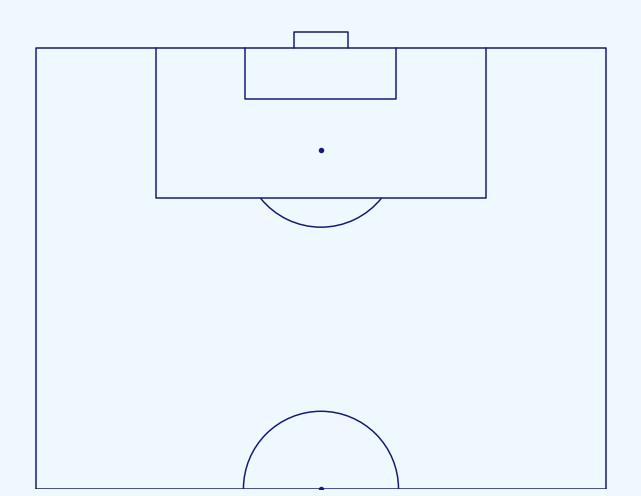

In [28]:
# Plotting Pitch

## Set background colour
background = 'aliceblue'

## Create figure 
fig, ax = plt.subplots(figsize=(11, 7))
fig.set_facecolor(background)

## Draw the pitch
draw_pitch(orientation="vertical",    # "horizontal"
           aspect='half',             # "fll"
           pitch_color=background,
           line_color='midnightblue',
           ax=ax)

## Show figure
plt.tight_layout()
plt.show()

The shots plotted on a pitch using the `draw_pitch()` function will look like the following:

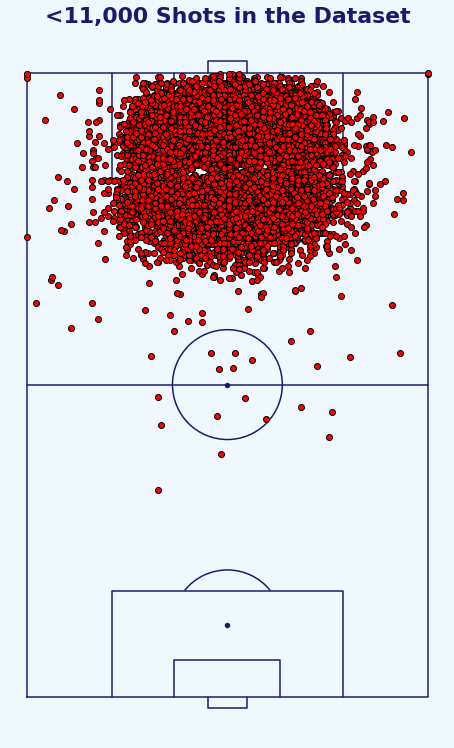

In [29]:
# Plotting Shots

## Define fonts
#title_font = 'Alegreya Sans'
#main_font = 'Open Sans'

## Set background colour
background = 'aliceblue'

## Create figure 
fig, ax = plt.subplots(figsize=(16.5, 10.5))
fig.set_facecolor(background)
#ax.patch.set_facecolor('w')

"""
## Set title
ax.set_title('Title',
             loc='left',
             fontweight='bold',
             fontsize=18,
             #fontfamily='title_font'
            )
"""

## Set Gridlines 
#ax.grid(lw=0.25, color='k', zorder=1)

## Draw the pitch
draw_pitch(x_min=0,
           x_max=pitch_length_x,
           y_min=0,
           y_max=pitch_length_y,
           orientation="vertical",
           aspect="fll", # "half"
           pitch_color=background,
           line_color='midnightblue',
           ax=ax)

## Define X and Y values
y = df_shots['position_xM_std'].tolist()
x = df_shots['position_yM_std'].tolist()

zo = 12

## Create scatter plot
plt.scatter(x,
            y,
            marker='o',
            color='red',
            edgecolors="black",
           #linewidths=0.5,
           #s=400,
            zorder=zo
           )

"""
# Add point label
ax.text(x[19], y[19]+0.025,
        'Point label',
        ha='center',
        color='k',
        fontsize=14,
        fontweight='medium',
        zorder=3,
       #fontfamily=main_font
       )
"""

"""
## Set X and Y Limits
ax.set_ylim(0,1)
ax.set_xlim(0,1)
"""

## Set title
ax.set_title('<11,000 Shots in the Dataset',
             loc='center',
             color='midnightblue', 
             fontweight='bold',
             fontfamily='DejaVu Sans',
             fontsize=22,
            )


## Save figure
if not os.path.exists(fig_shots_dir + '/shots_v_full_pitch_std.png'):
    plt.savefig(fig_shots_dir + '/shots_v_full_pitch_std.png', bbox_inches='tight', dpi=300)
else:
    pass

## Show figure
plt.tight_layout()
plt.show()

This visualisation shows that the coordinates were successfully converted.

### <a id='#section4.3'>4.3. Clean Attributes

##### `Interference_on_Shooter`
In the initial data handling, we saw that there were 43 missing values in the `Interference_on_Shooter` column.

To prevent further issues later Feature Engineering, all NULL valus are replaced with a string equal to 'Unknown'.

In [30]:
df_shots['Interference_on_Shooter'].unique()

array(['Low', 'Medium', 'High', nan], dtype=object)

In [31]:
df_shots['Interference_on_Shooter'] = df_shots['Interference_on_Shooter'].replace(np.nan, 'Unknown', regex=True)

In [32]:
# Shot play types and their frequency
df_shots.groupby(['Interference_on_Shooter']).play_type.count()

Interference_on_Shooter
High       1694
Low        4050
Medium     5138
Unknown      43
Name: play_type, dtype: int64

Create attribute `Interference_on_Shooter_code`

In [33]:
# Define dictionary of Interference_on_Shooter codes
dict_inferenceshooter_codes = {'Low': 1,
                               'Medium': 2,
                               'High': 3,
                               'Unknown': 4
                              }

# Map Interference_on_Shooter_Code to DataFrame
df_shots['Interference_on_Shooter_Code'] = df_shots['Interference_on_Shooter'].map(dict_inferenceshooter_codes)

##### `play_type`

In [34]:
df_shots['play_type'] = df_shots['play_type'].replace('Direct Corner', 'Direct corner', regex=True)

##### `BodyPartCode`

In [35]:
# Define dictionary of BodyPart codes
dict_bodypart_codes = {'Left': 1,
                       'Right': 2,
                       'Head': 3,
                       'Other': 4
                      }

# Map BodyPartCode to DataFrame
df_shots['BodyPartCode'] = df_shots['BodyPart'].map(dict_bodypart_codes)

In [36]:
# Shot play types and their frequency
df_shots.groupby(['BodyPartCode']).play_type.count()

BodyPartCode
1    3548
2    5445
3    1862
4      70
Name: play_type, dtype: int64

### <a id='#section4.4'>4.4. Create Attributes

##### `isGoal`
Boolean field, used as the Target in the Machine Learning i.e. whether the shot resulted in a goal (1) or not (0).

In [37]:
# Shot outcomes types and their frequency
df_shots.groupby(['outcome']).outcome.count()

outcome
Blocked      2155
Goal         1331
GoalFrame     215
Missed       4254
Saved        2927
owngoal        43
Name: outcome, dtype: int64

In [38]:
# Define dictionary of outcomes
dict_outcome_codes = {'Blocked': 0,
                      'Goal': 1,
                      'GoalFrame': 0,
                      'Missed': 0,
                      'Saved': 0,
                      'owngoal': 1
                     }

# Map isGoal Boolean to DataFrame
df_shots['isGoal'] = df_shots['outcome'].map(dict_outcome_codes)

In [39]:
# Shot outcomes types and their frequency
df_shots.groupby(['isGoal']).isGoal.count()

isGoal
0    9551
1    1374
Name: isGoal, dtype: int64

### <a id='#section4.5'>4.5. Create Open Play (OP) Shots DataFrame</a>

First look at some overall statistics of the shots in the dataset.

In [40]:
### Count number of shots and goals in the dataset

## Assign variables
count_all_shots = len(df_shots)
count_np_shots = len(df_shots[(df_shots['play_type'] != 'Penalty')])
count_op_shots = len(df_shots[(df_shots['play_type'] == 'Open Play')])
count_all_goals = len(df_shots[(df_shots['outcome'] == 'Goal') | (df_shots['outcome'] == 'owngoal')])
count_np_goals = len(df_shots[(df_shots['play_type'] != 'Penalty') & ((df_shots['outcome'] == 'Goal') | (df_shots['outcome'] == 'owngoal'))])
count_op_goals = len(df_shots[(df_shots['play_type'] == 'Open Play') & ((df_shots['outcome'] == 'Goal') | (df_shots['outcome'] == 'owngoal'))])

## Print statements
print(f'The shots DataFrame contains {count_all_shots:,} shots and {count_all_goals:,} goals ({round(100*count_all_goals/count_shots,1)}%).')
print(f'The shots DataFrame contains {count_np_shots:,} non-penalty shots and {count_np_goals:,} non-penalty goals ({round(100*count_np_goals/count_np_shots,1)}%).')
print(f'The shots DataFrame contains {count_op_shots:,} Open Play shots and {count_op_goals:,} Open Play goals ({round(100*count_op_goals/count_op_shots,1)}%).')
print(f'The Expected Goal when shooting is {round(100*count_goals/count_shots,1)}%.')

The shots DataFrame contains 10,925 shots and 1,374 goals (12.6%).
The shots DataFrame contains 10,777 non-penalty shots and 1,261 non-penalty goals (11.7%).
The shots DataFrame contains 10,269 Open Play shots and 1,218 Open Play goals (11.9%).
The Expected Goal when shooting is 12.6%.


Next, we need to filter the DataFrame for Open Play shots.

This is because dead ball situations, most notably penalty shots, are in a state with completely different characterics to Open Play shots. For example, just over 70% of penalities result in a goal - quote from The Numbers Game.

In [41]:
# Shot play types and their frequency
df_shots.groupby(['play_type']).play_type.count()

play_type
Direct corner          5
Direct freekick      503
Open Play          10269
Penalty              148
Name: play_type, dtype: int64

We can see that 148 goals were scored from penalties, 503 from direct freekicks, 5 from direct corners, and then 10,269 from Open Play.

For the purpose of this model, we will isolate only Open Play shots.

In [42]:
# Subset DataFrame for non-penalty shots
df_op_shots = df_shots[(df_shots['play_type'] == 'Open Play')].copy()

# Display DataFrame
df_op_shots.head() 

,match_minute,match_second,position_x,position_y,play_type,BodyPart,Number_Intervening_Opponents,Number_Intervening_Teammates,Interference_on_Shooter,outcome,position_xM,position_yM,position_xM_r,position_yM_r,position_xM_std,position_yM_std,position_xM_std_r,position_yM_std_r,Interference_on_Shooter_Code,BodyPartCode,isGoal
0,7,24,3.24,-0.75,Open Play,Head,1,0,Low,Goal,49.76,-0.751769,-49.76,0.751769,102.76,33.248231,155.76,67.248231,1,3,1
1,34,55,24.94,0.75,Open Play,Left,3,0,Medium,Missed,28.06,0.751769,-28.06,-0.751769,81.06,34.751769,134.06,68.751769,2,1,0
2,60,33,3.74,-0.50,Open Play,Right,1,0,Low,Missed,49.26,-0.501179,-49.26,0.501179,102.26,33.498821,155.26,67.498821,1,2,0
4,18,0,10.23,4.99,Open Play,Head,1,0,Low,Missed,42.77,5.001769,-42.77,-5.001769,95.77,39.001769,148.77,73.001769,1,3,0
5,31,26,24.19,0.75,Open Play,Right,3,1,Medium,Missed,28.81,0.751769,-28.81,-0.751769,81.81,34.751769,134.81,68.751769,2,2,0


In [43]:
# Shot play types of the Open Play DataFrame with frequency
df_op_shots.groupby(['play_type']).play_type.count()

play_type
Open Play    10269
Name: play_type, dtype: int64

In [44]:
# Count number of shots and goals in the the Open Play dataset

## Assign variables
count_op_shots = len(df_op_shots)
count_op_goals = len(df_op_shots[(df_op_shots['outcome'] == 'Goal') | (df_op_shots['outcome'] == 'owngoal')])

## Print statement
print(f'The shots DataFrame contains {count_op_shots:,} shots and {count_op_goals:,} goals ({round(100*count_op_goals/count_op_shots,1)}%).')

The shots DataFrame contains 10,269 shots and 1,218 goals (11.9%).


---

## <a id='#section5'>5. Initial Modeling</a>
First model created as a baseline for which interations of improvement are based.

##### Feature Selection
First model just uses the features first included in the dataset. Future iterations include engineered and one-hot encoded categorical features.

The two that are of most interest to start are: 

1. The position of the shot was taken on the pitch as `position_xM` and `position_yM` (converted in the Data Engineering section'
2. The body part the shot was taken with, i.e. left foot, right foot or head. This information is already encoded in `BodyPartCode` (converted from strings to codes in the Data Engineering section'

In [45]:
# Features of the Open Play shots DataFrame
df_op_shots.columns

Index(['match_minute', 'match_second', 'position_x', 'position_y', 'play_type',
       'BodyPart', 'Number_Intervening_Opponents',
       'Number_Intervening_Teammates', 'Interference_on_Shooter', 'outcome',
       'position_xM', 'position_yM', 'position_xM_r', 'position_yM_r',
       'position_xM_std', 'position_yM_std', 'position_xM_std_r',
       'position_yM_std_r', 'Interference_on_Shooter_Code', 'BodyPartCode',
       'isGoal'],
      dtype='object')

In [46]:
# Select Features of interest
feature_cols = ['position_xM', 
                'position_yM', 
                'BodyPartCode'
               ]

# Define Target
target_col = ['isGoal']

# Assign Feature and Target to separate DataFrames and Series
X = df_op_shots[feature_cols]
y = df_op_shots[target_col]

In [47]:
# DataFrame of Features
X.head()

,position_xM,position_yM,BodyPartCode
0,49.76,-0.751769,3
1,28.06,0.751769,1
2,49.26,-0.501179,2
4,42.77,5.001769,3
5,28.81,0.751769,2


In [48]:
# Series of Labels
y.head()

,isGoal
0,1
1,0
2,0
4,0
5,0


##### Split the dataset into a train set and a test set
Split the data into a training set which will be used to build the model, and a testing set that is not used to build the model, but which we use to evaluate the model's predictions.

The Chance Quality model is trained on 70% of the data and the remaining 30% is evaluate the model.

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

##### Train Logistic Regression model

In [50]:
reg_initial = LogisticRegression(random_state=42)
reg_initial.fit(X_train, np.array(y_train).ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

##### Predict on the Test set

In [51]:
pred_probs = reg_initial.predict_proba(X_test)[:,1]
pred_vals = reg_initial.predict(X_test)

In [52]:
# Compute Accuracy of initial model
print(f"Accuracy of initial model: {sk_metrics.accuracy_score(y_test, pred_vals)*100:.1f}%")

# Computer Log Loss of initial model
pred_probs = reg_initial.predict_proba(X_test)[:,1]
print(f"Log loss of initial model: {sk_metrics.log_loss(y_test, pred_probs):.5f}")

# Compute the AUC of initial model
print(f"AUC of our initial model: {sk_metrics.roc_auc_score(y_test, pred_probs)*100:.2f}%")

Accuracy of initial model: 88.5%
Log loss of initial model: 0.32416
AUC of our initial model: 72.78%


In the [Metric definition](#section7) section (section 7), these metrics are discussed for those that are useful, those that are not, and how to comprehend them.

In [53]:
# Logistic Model coefficients
for i, col in enumerate(X_train.columns):
    print(f"Coefficient of {col}: {reg_initial.coef_[0][i]:.3f}")

Coefficient of position_xM: 0.133
Coefficient of position_yM: -0.005
Coefficient of BodyPartCode: -0.307


##### Next steps
The following section of this notebook iterate of this Logistic Regression model, to improve the model's performance. These steps are:
*    <b>Metric definition:</b> define appropriate metrics for a Logistic Regression modelto predict probabilities of goals scored and rule out inappropriate metrics ([section 6](#section6));
*    <b>Treating outliers:</b> find and treat outliers in the dataset to improve model ([section 7](#section7));
*    <b>Univariate analysis:</b> engineer the first set of features to be usable in our logistic regression approach ([section 8](#section8));
*    <b>Feature Engineering:</b> create additional features for dataset and evaluate as to whether their inclusion improves the model performance ([section 9](#section9));
*    <b>Multivariate analysis:</b> analysis the complete set of features and their correlations. ([section 10](#section10));
*    <b>Final model and evaluation:</b> productionise final model and assess for performance performance ([section 12](#section11)); and
*    <b>Feature interpretation:</b> Interpret model features ([section 13](#section12)).

---

## <a id='#section6'>6. Metric Definition</a>

This Chance Quality Model is required to calculate the <b>probability</b> of a shot resulting in a goal (i.e. P[goal|shot,situation]) given a certain state e.g. position of the shot, left foot, number of defenders, etc.

Three commonly used metrics for measuring the performance of a model are:
*    Accuracy;
*    Log Loss; and 
*    ROC AUC (aka AUC).

##### Accuracy
Accuracy measures the share of right and wrong decisions and does not take into consideration at all the certainty of a decision, whether you are 51% sure or 99% sure. When having unbalanced data, i.e. on outcome happens way more often than the other, it is very simple to get a good accuracy. All you need to do is to just always predict the outcome that is more likely. For this reason, Accuracy is an inappropriate metric for this model.

In [54]:
# Compute Accuracy of initial model
print(f"Accuracy of initial model: {sk_metrics.accuracy_score(y_test, pred_vals)*100:.1f}%")

Accuracy of initial model: 88.5%


In [55]:
np.unique(pred_vals)

array([0])

In [56]:
# Shot outcomes types and their frequency
df_op_shots.groupby(['isGoal']).isGoal.count()

isGoal
0    9051
1    1218
Name: isGoal, dtype: int64

The current model predicts that all shots result in no goals. This results in a high accuracy, as the ratio of goals to no goals is 9,551 to 1,374 (14.39%). Despite this high accuracy, 'Accuracy' is not a good metric to evaluate model performance of a Logistic Regression model.

##### Log loss
When predicting probabilities the metric you should always look at is the log loss (also called [binary cross entropy](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a)). As this model looks at the probability with which a goal is scored, this is an appropriate metric to assess this model.

In [57]:
# Computer Log Loss of initial model
pred_probs = reg_initial.predict_proba(X_test)[:,1]
print(f"Log loss of initial model: {sk_metrics.log_loss(y_test, pred_probs):.5f}")

Log loss of initial model: 0.32416


The model has a Log Loss of 0.32515. For comparison, let's compute a model that just always predicts 14.39%, i.e. the average expected goal over all shots taken (stated when data imported into model).

In [58]:
print(f'Log loss of dummy: {sk_metrics.log_loss(y_test, [0.143859282]*len(y_test)):.5f}')

Log loss of dummy: 0.36025


The current Logistic Regression model is a bit better than just predicting the average with a Log Loss of 0.364. To improve this model, we will compare use the current Log Loss of 0.325 as a baseline for which to compare other models.

##### ROC AUC
The AUC of a model is the probability that the model ranks a random positive example (i.e. a successful shot) more highly than a random negative example (i.e. unsuccessful shot).

The problem with measuring the AUC of a Chance Quality model is that it only looks at ranking of the positive vs. the negative examples and not about the probabilities that are assigned to the examples. We, however, are interested in knowing the probability of a shot being successful. This is not captured by the AUC.

In [59]:
# Compute the AUC of initial model
print(f'AUC of our initial model: {sk_metrics.roc_auc_score(y_test, pred_probs)*100:.2f}%')

AUC of our initial model: 72.78%


The ROC AUC of the initial model says that when randomly selecting a successful shot and an unsuccessful shot, there is a 72.3% chance that our model gives the successful shot a higher probability than the unsuccessful shot.

To prove that AUC in not useful, this can be demonstrated by oversestimated the probabilities of the ball going in.

In [60]:
print(f'Currently predicted success when shooting: {np.mean(pred_probs)*100:.2f}%')

# Overestimate the probabilities
pred_probs_over = pred_probs * 5
print(f'Overestimated predicted success when shooting: {np.mean(pred_probs_over)*100:.2f}%')

Currently predicted success when shooting: 11.85%
Overestimated predicted success when shooting: 59.25%


Now we predict that 62% of all shots are successful. Something that is completely ridiculous. But guess what happens when we look at the two metrics *log loss* and *AUC*

In [61]:
print(f'Log loss w/o overestimation: {sk_metrics.log_loss(y_test, pred_probs):.3f}')
print(f'Log loss with overestimation: {sk_metrics.log_loss(y_test, pred_probs_over):.3f}')
print(f'AUC w/o overestimation: {sk_metrics.roc_auc_score(y_test, pred_probs)*100:.2f}%')
print(f'AUC with overestimation: {sk_metrics.roc_auc_score(y_test, pred_probs_over)*100:.2f}%')

Log loss w/o overestimation: 0.324
Log loss with overestimation: 4.729
AUC w/o overestimation: 72.78%
AUC with overestimation: 72.78%


We can see that the Log Loss skyrocketed as expected whilst the the AUC remained exactly the same. This is because the AUC only measures the ranking between the shots, but does not at all measure if the probabilities make any sense. AUC is therefore not a reliable metric when evaluation a Chance Quality model.

The AUC however can be useful to communicate results to non data scientists. In this analysis, we will focus oin reducing the Log Loss during model development, however, using the AUC, we can explain how good the model is with the answer "*It has a 71% chance of detecting the successful shot from the unsuccessful one*" rather than "*It has a log loss of 0.345*".

---

## <a id='#section7'>7. Treating Outliers</a>

Outliers in an Chance Quality model can be described as two types of data points:
1.    Data points that are wrong, i.e. shots that never happened; and
2.    Data points that are correct, i.e. shot happened in reality, but you do not want the model to learn from.

The first point is easy to understand - a data for the shot is incorrectly collected. It therefore needs to be removed.

For the second point, an example could be the last minute of the game and the team that is currently losing has a corner. They therefore decide to take out the goalkeeper as an extra man to try and nick a goal. However, the corner isn't successful, the other team counter attacks and shoots from over 50 meters into the empty goal. This shot took place, but we do not want the model to learn that there is a chance to score from this area as our current data doesn't account for the goalkeeper being out of their goal. If tracking data was available and we knew the goal was empty, maybe yes. If we don't have this data, however, it's best to exclude it.

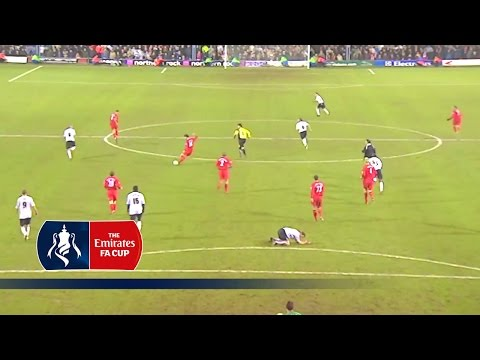

In [62]:
# Xabi Alonso's 70 yard goal against Luton in the FA Cup
YouTubeVideo('4OTQwuAc4HU')

### <a id='#section7.1'>7.1. Shot Position</a>
The the following cells, the visualisations look at the goals and shots made.

##### Create 2D Histograms for shots and goals used to generate Heat Maps

In [63]:
# Two dimensional histogram
H_Shot = np.histogram2d(df_op_shots['position_xM_std'], df_op_shots['position_yM_std'], bins=50, range=[[0, pitch_length_x], [0, pitch_length_y]])
df_op_goals = df_op_shots[df_op_shots['isGoal'] == 1]
H_Goal = np.histogram2d(df_op_goals['position_xM_std'], df_op_goals['position_yM_std'], bins=50, range=[[0, pitch_length_x], [0, pitch_length_y]])

Create custom colour map [[link](https://kbkb-wx-python.blogspot.com/2015/12/python-transparent-colormap.html)]

In [64]:
# Choose colormap
cmap=plt.cm.Reds

# Get the colormap colors
my_cmap = cmap(np.arange(cmap.N))

# Set alpha
my_cmap[:,-1] = np.linspace(0, 1, cmap.N)

# Create new colormap
my_cmap = ListedColormap(my_cmap)

##### Visualise Shots

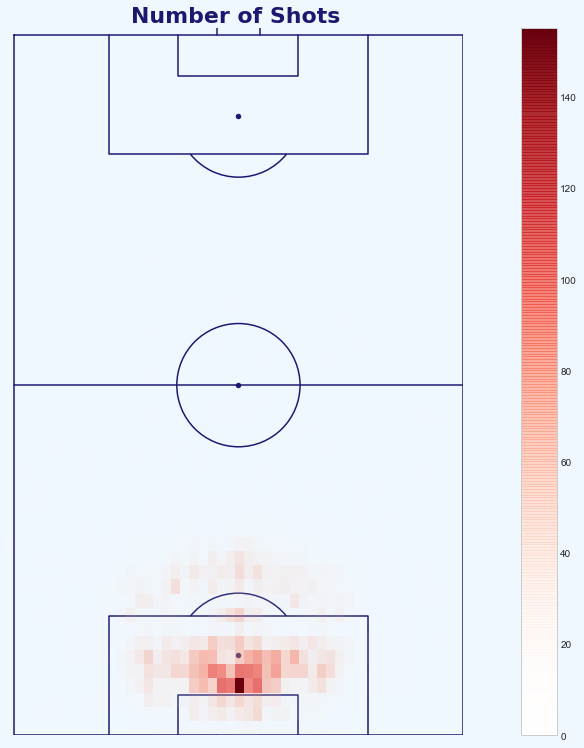

In [65]:
# Visualise Shots

## Set background colour
background = 'aliceblue' #"white"

## Create figure 
fig, ax = plt.subplots(figsize=(16.5, 10.5))
fig.set_facecolor(background)

## Draw the pitch
draw_pitch(x_min=0,
           x_max=pitch_length_x,
           y_min=0,
           y_max=pitch_length_y,
           orientation='vertical', # "horizontal"
           aspect="fll",
           pitch_color=background,
           line_color="midnightblue",
           ax=ax)

## Heat map
pos=ax.imshow(H_Shot[0],
              extent=[-1, pitch_length_y, pitch_length_x, -1],
              aspect='auto',
              cmap=my_cmap
             )

## Colour bar
fig.colorbar(pos, ax=ax)

## Set title
ax.set_title('Number of Shots',
             loc='center',
             color='midnightblue', 
             fontweight='bold',
             fontfamily='DejaVu Sans',
             fontsize=22,
            )

## Save figure
if not os.path.exists(fig_shots_dir + '/op_shots_v_full_shots.png'):
    plt.savefig(fig_shots_dir + '/op_shots_v_full_shots.png', bbox_inches='tight', dpi=300)
else:
    pass

## Show figure
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

The visualisation looks as expected. Most of the shots where taken either inside or slightly outside the box. Within the box, there appears to be a slight bias to the goalkeeper's left, but it is generally even.

Next we'll visualise where the goals were scored from.

##### Visualise Goals

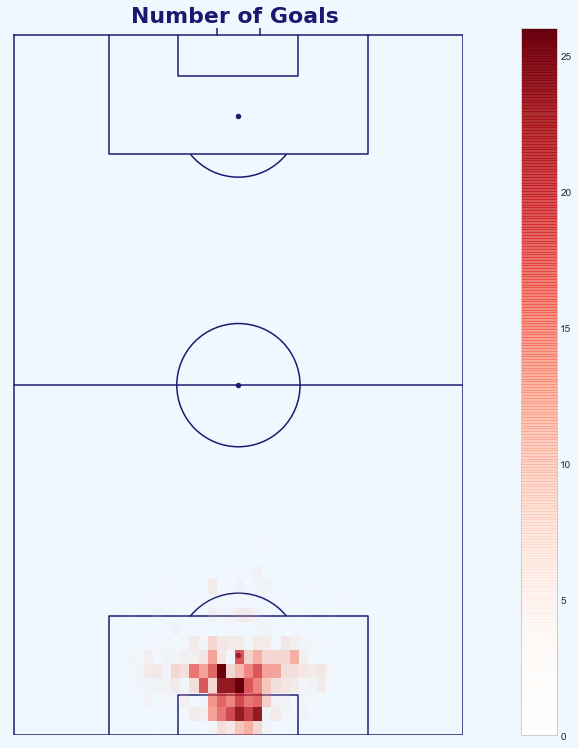

In [66]:
# Visualise Goals

## Set background colour
background = 'aliceblue' #"white"

## Create figure 
fig, ax = plt.subplots(figsize=(16.5, 10.5))
fig.set_facecolor(background)

## Draw the pitch
draw_pitch(x_min=0,
           x_max=pitch_length_x,
           y_min=0,
           y_max=pitch_length_y,
           orientation="vertical", # "horizontal"
           aspect="fll",
           pitch_color=background,
           line_color="midnightblue",
           ax=ax)

## Heat map
pos=ax.imshow(H_Goal[0],
              extent=[-1, pitch_length_y, pitch_length_x, -1],
              aspect='auto',
              cmap=my_cmap
             )

## Colour bar
fig.colorbar(pos, ax=ax)

## Set title
ax.set_title('Number of Goals',
             loc='center',
             color='midnightblue', 
             fontweight='bold',
             fontfamily='DejaVu Sans',
             fontsize=22,
            )

## Save figure
if not os.path.exists(fig_shots_dir + '/op_shots_v_full_goals.png'):
    plt.savefig(fig_shots_dir + '/op_shots_v_full_goals.png', bbox_inches='tight', dpi=300)
else:
    pass

## Show figure
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

Again, the visualisation looks as expected. Most of the goals scored were within the 6 or 18-yard box. Again, there appears to be a slight bias to the goalkeeper's left, but it is generally even.

Next we'll investigate the probability from scoring per zone i.e. the number of goals divided by the number of shots.

##### Frequency of Scoring
Dividing the number of goals by the number of shots.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


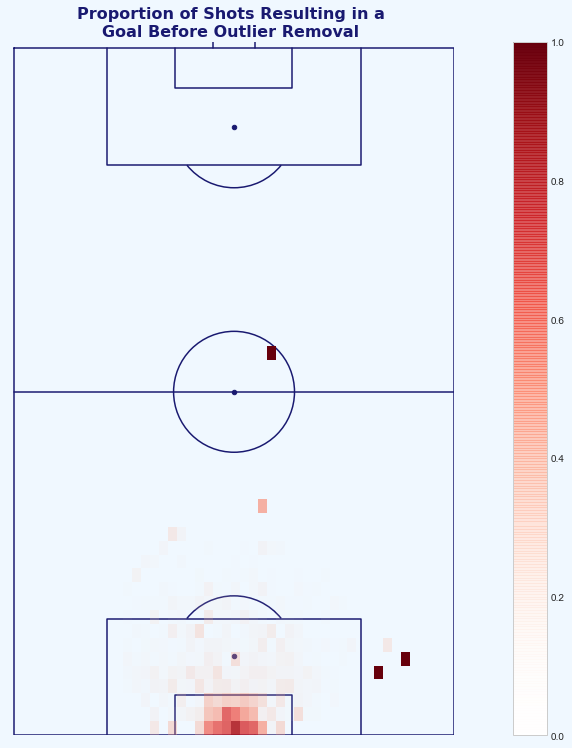

In [67]:
# Visualise the probability of scoring from different points

## Set background colour
background = 'aliceblue' #"white"

## Create figure 
fig, ax = plt.subplots(figsize=(16.5, 10.5))
fig.set_facecolor(background)

## Draw the pitch
draw_pitch(x_min=0,
           x_max=pitch_length_x,
           y_min=0,
           y_max=pitch_length_y,
           orientation="vertical", # "horizontal"
           aspect="fll",
           pitch_color=background,
           line_color="midnightblue",
           ax=ax)

## Heat map
pos=ax.imshow(H_Goal[0]/H_Shot[0],
              extent=[-1, pitch_length_y, pitch_length_x, -1],
              aspect='auto',
              cmap=my_cmap,
             #vmin=0,
             #vmax=0.5
             )

## Colour bar
fig.colorbar(pos, ax=ax)

## Set title
ax.set_title('Proportion of Shots Resulting in a\nGoal Before Outlier Removal',
             loc='center',
             color='midnightblue', 
             fontweight='bold',
             fontfamily='DejaVu Sans',
             fontsize=16,
            )


## Save figure
if not os.path.exists(fig_shots_dir + '/op_shots_v_full_proportion_goals_from_shots_before_outlier_removal.png'):
    plt.savefig(fig_shots_dir + '/op_shots_v_full_proportion_goals_from_shots_before_outlier_removal.png', bbox_inches='tight', dpi=300)
else:
    pass

## Show figure
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

There are data points far away from the goal that almost certainly wrong, the other might indeed have happened in a match and are therefore right, just like the Xabi Alonso goal against Luton where the goalkeeper was out of position, causing Xabi to shoot from a position that he otherwise would not shoot from. For example, it appears that a goal was scored from the edge of the of the attacking team's box. There is also a goal from the halfway line.

Reasons for this could be:
*    The data in correctly entered,
*    Coordinate system flipped for the particular shot (unlikely).

The data is required to be smooth so that the model doesn't think there's a 100% chance of scoring when shooting from the edge of the goalkeepers box.

There are three options to deal with these outliers:
1.    Delete the outliers;
2.    Use our experience and tell the model that the probability to score from this position is realistically 0. This means we change the target but leave the features as is; and
3.    Assume that the shot happened closer to the goal, but we still assume that it went in. This means that we change the features but leave the target.

In our situation, the second strategy would make the most sense.

There are sophisticated ways to filter out these shots when a full set of Event data is available. For example, with full event data, we could determine the percentage likelihood of shooting from a position by looking at all actions on a pitch, and seeing how many times a player shoots relative to other actions. If the player 99 times out of 100 passes the ball instead of shooting for said position, we can set the chance that the player scorores to zero. With this logic, we can assume that all shots happening in any of the cells with < 1% shooting probability did not result in a goal.

The following code creates three, important features that are crucial to the Logistic Regression modeling and we will use to filter out imporbable shots. These include:
*    The distance of the shot from the goal (x-axis);
*    The distance of the shot from the center of the pitch (y-axis); and 
*    The angle of the shot to the goal.

These can all be determined using Pythagoras' theorem and basic trigonometry. For more information, David Sumpter's lecture [How to Build An Expected Goals Model 1: Data and Model](https://www.youtube.com/watch?v=bpjLyFyLlXs) for Friends of Tracking @ the 17 minute mark.

In [68]:
# Create new features - distance_to_goalM, 'distance_to_centerM', and 'angle'
df_op_shots['distance_to_goalM'] = np.sqrt((((pitch_length_x/2) - df_op_shots['position_xM'])**2) + ((df_op_shots['position_yM'])**2))
df_op_shots['distance_to_centerM'] = np.abs(df_op_shots['position_yM'])
df_op_shots['angle'] = np.absolute(np.degrees(np.arctan((df_op_shots['position_yM']) / ((pitch_length_x/2) - df_op_shots['position_xM']))))

In [69]:
df_op_shots[(df_op_shots['isGoal'] == 1) & (df_op_shots['distance_to_goalM'] > 18) & (df_op_shots['angle'] > 45)].sort_values(by='position_yM', ascending=False).head(50)

,match_minute,match_second,position_x,position_y,play_type,BodyPart,Number_Intervening_Opponents,Number_Intervening_Teammates,Interference_on_Shooter,outcome,position_xM,position_yM,position_xM_r,position_yM_r,position_xM_std,position_yM_std,position_xM_std_r,position_yM_std_r,Interference_on_Shooter_Code,BodyPartCode,isGoal,distance_to_goalM,distance_to_centerM,angle
4177,69,8,12.22,26.93,Open Play,Left,2,0,Medium,Goal,40.78,26.993514,-40.78,-26.993514,93.78,60.993514,146.78,94.993514,2,1,1,29.630697,26.993514,65.643674
938,74,6,13.22,24.19,Open Play,Right,2,1,Low,Goal,39.78,24.247052,-39.78,-24.247052,92.78,58.247052,145.78,92.247052,1,2,1,27.616805,24.247052,61.399858
9368,33,36,10.47,22.20,Open Play,Left,3,0,Low,Goal,42.53,22.252358,-42.53,-22.252358,95.53,56.252358,148.53,90.252358,1,1,1,24.592445,22.252358,64.802456
3886,33,47,12.97,17.71,Open Play,Left,2,0,Medium,Goal,40.03,17.751769,-40.03,-17.751769,93.03,51.751769,146.03,85.751769,2,1,1,21.985136,17.751769,53.846962
3809,72,49,10.97,16.71,Open Play,Left,2,0,Medium,Goal,42.03,16.749410,-42.03,-16.749410,95.03,50.749410,148.03,84.749410,2,1,1,20.022079,16.749410,56.777269
1222,3,41,14.71,16.71,Open Play,Right,1,0,Low,Goal,38.29,16.749410,-38.29,-16.749410,91.29,50.749410,144.29,84.749410,1,2,1,22.291856,16.749410,48.709107
1704,27,35,13.97,15.46,Open Play,Right,2,0,Medium,Goal,39.03,15.496462,-39.03,-15.496462,92.03,49.496462,145.03,83.496462,2,2,1,20.863874,15.496462,47.965464
1156,85,41,10.47,14.96,Open Play,Left,1,0,Low,Goal,42.53,14.995283,-42.53,-14.995283,95.53,48.995283,148.53,82.995283,1,1,1,18.288778,14.995283,55.076501
6744,60,1,13.97,13.97,Open Play,Right,2,0,Medium,Goal,39.03,14.002948,-39.03,-14.002948,92.03,48.002948,145.03,82.002948,2,2,1,19.779875,14.002948,45.067486
10836,28,40,12.97,13.97,Open Play,Left,2,0,Medium,Goal,40.03,14.002948,-40.03,-14.002948,93.03,48.002948,146.03,82.002948,2,1,1,19.086735,14.002948,47.193111


In [70]:
df_op_shots[(df_op_shots['isGoal'] == 1) & (df_op_shots['distance_to_goalM'] > 18)].sort_values(by='distance_to_goalM', ascending=False).head(50)

,match_minute,match_second,position_x,position_y,play_type,BodyPart,Number_Intervening_Opponents,Number_Intervening_Teammates,Interference_on_Shooter,outcome,position_xM,position_yM,position_xM_r,position_yM_r,position_xM_std,position_yM_std,position_xM_std_r,position_yM_std_r,Interference_on_Shooter_Code,BodyPartCode,isGoal,distance_to_goalM,distance_to_centerM,angle
9855,87,26,58.85,6.48,Open Play,Right,2,0,Low,Goal,-5.85,6.495283,5.85,-6.495283,47.15,40.495283,100.15,74.495283,1,2,1,59.207358,6.495283,6.298252
8778,39,55,35.41,4.24,Open Play,Right,3,1,Low,Goal,17.59,4.250000,-17.59,-4.250000,70.59,38.250000,123.59,72.250000,1,2,1,35.664136,4.250000,6.844049
1464,26,22,30.92,-8.98,Open Play,Right,6,1,Low,Goal,22.08,-9.001179,-22.08,9.001179,75.08,24.998821,128.08,58.998821,1,2,1,32.203534,9.001179,16.230905
4637,36,21,30.92,-7.23,Open Play,Right,2,0,Low,Goal,22.08,-7.247052,-22.08,7.247052,75.08,26.752948,128.08,60.752948,1,2,1,31.757931,7.247052,13.190921
8416,67,16,28.93,-9.73,Open Play,Right,2,0,Medium,Goal,24.07,-9.752948,-24.07,9.752948,77.07,24.247052,130.07,58.247052,2,2,1,30.529738,9.752948,18.630109
4108,24,1,29.18,6.73,Open Play,Right,6,3,Medium,Goal,23.82,6.745873,-23.82,-6.745873,76.82,40.745873,129.82,74.745873,2,2,1,29.949611,6.745873,13.017035
2675,79,43,29.43,4.24,Open Play,Left,5,1,Medium,Goal,23.57,4.250000,-23.57,-4.250000,76.57,38.250000,129.57,72.250000,2,1,1,29.735289,4.250000,8.217302
4177,69,8,12.22,26.93,Open Play,Left,2,0,Medium,Goal,40.78,26.993514,-40.78,-26.993514,93.78,60.993514,146.78,94.993514,2,1,1,29.630697,26.993514,65.643674
4808,57,17,29.18,-3.99,Open Play,Right,3,0,Low,Goal,23.82,-3.999410,-23.82,3.999410,76.82,30.000590,129.82,64.000590,1,2,1,29.452804,3.999410,7.804332
10404,94,3,28.18,7.23,Open Play,Right,3,1,Medium,Goal,24.82,7.247052,-24.82,-7.247052,77.82,41.247052,130.82,75.247052,2,2,1,29.096944,7.247052,14.422234


In [71]:
# Shots_before_outlier_treatment = len(df_op_shots)
goals_before_outlier_treatment = np.sum(df_op_shots['isGoal'] == 1)

In [72]:
df_op_shots_after = df_op_shots
df_op_shots_after['isGoal'] = np.where(df_op_shots_after['distance_to_goalM'] > 35, 0, df_op_shots_after['isGoal'])
df_op_shots_after['isGoal'] = np.where(((df_op_shots_after['distance_to_goalM'] > 20) & (df_op_shots_after['angle'] > 35)), 0, df_op_shots_after['isGoal'])

In [73]:
#shots_after_outlier_treatment = len(df_op_shots_after)
goals_after_outlier_treatment = np.sum(df_op_shots_after['isGoal'] == 1)

In [74]:
#print(f'Shots before outlier treatment: {shots_before_outlier_treatment:,}')
#print(f'Shots after outlier treatment: {shots_after_outlier_treatment:,} ({(1-(shots_after_outlier_treatment/shots_before_outlier_treatment))*100:.3f}% shots removed)')
print(f'Goals before outlier treatment: {goals_before_outlier_treatment:,}')
print(f'Goals after outlier treatment: {goals_after_outlier_treatment:,} ({(1-(goals_after_outlier_treatment/goals_before_outlier_treatment))*100:.3f}% goals changed).')

Goals before outlier treatment: 1,218
Goals after outlier treatment: 1,200 (1.478% goals changed).


By replacing the value of whether a goals was scored or not to no goal for all shots taken from greater than 35m (38.27 yards) or from 20m (21.87 yards) where the angle to the goal is also greater than 35 degrees, 33 shots are replaced in the Open Play dataset (2.71% of all goals).

Let now replot the proportion of shots resulting in a goal, with these outliers removed.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


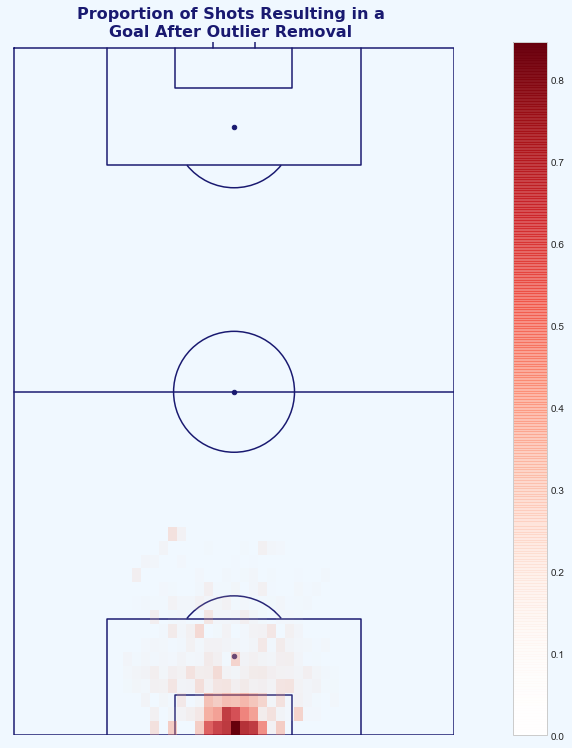

In [75]:
# Visualise the probability of scoring from different points after outlier removal

## Two dimensional histogram
H_Shot = np.histogram2d(df_op_shots_after['position_xM_std'], df_op_shots_after['position_yM_std'], bins=50, range=[[0, pitch_length_x], [0, pitch_length_y]])
df_op_goals_after = df_op_shots_after[df_op_shots_after['isGoal'] == 1]
H_Goal = np.histogram2d(df_op_goals_after['position_xM_std'], df_op_goals_after['position_yM_std'], bins=50, range=[[0, pitch_length_x], [0, pitch_length_y]])

## Set background colour
background = 'aliceblue' #"white"

## Create figure 
fig, ax = plt.subplots(figsize=(16.5, 10.5))
fig.set_facecolor(background)

## Draw the pitch
draw_pitch(x_min=0,
           x_max=pitch_length_x,
           y_min=0,
           y_max=pitch_length_y,
           orientation="vertical", # "horizontal"
           aspect="fll",
           pitch_color=background,
           line_color="midnightblue",
           ax=ax)

## Heat map
pos=ax.imshow(H_Goal[0]/H_Shot[0],
              extent=[-1, pitch_length_y, pitch_length_x, -1],
              aspect='auto',
              cmap=my_cmap,
             #vmin=0,
             #vmax=0.5
             )

## Colour bar
fig.colorbar(pos, ax=ax)

## Set title
ax.set_title('Proportion of Shots Resulting in a\nGoal After Outlier Removal',
             loc='center',
             color='midnightblue', 
             fontweight='bold',
             fontfamily='DejaVu Sans',
             fontsize=16,
            )

## Save figure
if not os.path.exists(fig_shots_dir + '/op_shots_v_full_proportion_goals_from_shots_after_outlier_removal.png'):
    plt.savefig(fig_shots_dir + '/op_shots_v_full_proportion_goals_from_shots_after_outlier_removal.png', bbox_inches='tight', dpi=300)
else:
    pass

## Show figure
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


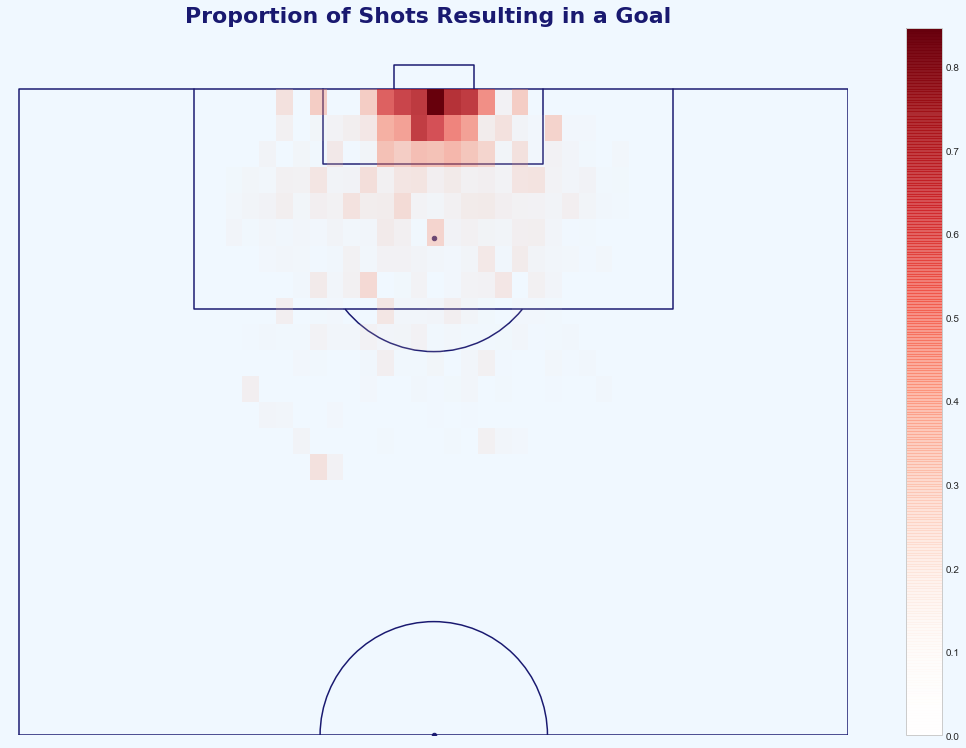

In [76]:
# Visualise the probability of scoring from different points after outlier removal

## Two dimensional histogram
H_Shot = np.histogram2d(df_op_shots_after['position_xM_std'], df_op_shots_after['position_yM_std'], bins=50, range=[[0, pitch_length_x], [0, pitch_length_y]])
df_op_goals_after = df_op_shots_after[df_op_shots_after['isGoal'] == 1]
H_Goal = np.histogram2d(df_op_goals_after['position_xM_std'], df_op_goals_after['position_yM_std'], bins=50, range=[[0, pitch_length_x], [0, pitch_length_y]])

## Set background colour
background = 'aliceblue' #"white"

## Create figure 
fig, ax = plt.subplots(figsize=(16.5, 10.5))
fig.set_facecolor(background)

## Draw the pitch
draw_pitch(x_min=0,
           x_max=pitch_length_x,
           y_min=0,
           y_max=pitch_length_y,
           orientation="vertical", # "horizontal"
           aspect="half",
           pitch_color=background,
           line_color="midnightblue",
           ax=ax)

## Heat map
pos=ax.imshow(H_Goal[0]/H_Shot[0],
              extent=[-1, pitch_length_y, pitch_length_x, -1],
              aspect='auto',
              cmap=my_cmap,
             #vmin=0,
             #vmax=0.5
             )

## Colour bar
fig.colorbar(pos, ax=ax)

## Set title
ax.set_title('Proportion of Shots Resulting in a Goal',
             loc='center',
             color='midnightblue', 
             fontweight='bold',
             fontfamily='DejaVu Sans',
             fontsize=22,
            )

## Save figure
if not os.path.exists(fig_shots_dir + '/op_shots_v_half_proportion_goals_from_shots_after_outlier_removal.png'):
    plt.savefig(fig_shots_dir + '/op_shots_v_half_proportion_goals_from_shots_after_outlier_removal.png', bbox_inches='tight', dpi=300)
else:
    pass

## Show figure
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

The data now looks better. The goals from inside the attacking team's area and some acute goals scored outside the box at tight angles have been removed. Even though this was quite an arbitrary method of removing outliers, as this is not a complete dataset and a well known problem, I believe this is an adequate method in this circumstance.

The output now looks a lot like the general Expected Goals diagram that features in [David Sumpter's](https://twitter.com/Soccermatics?) (@Soccermatics) book Soccermatics, in which goals in the circle around the 6-yard box have roughly a 30% of scoring, 15% in the circle outside between the 6 and 12-yard box, and 7% towards the edge and just outside the box. This diagram also shows that the angle the shot has is important, which shots closer to the goal but from an acute angle having less chance of scoring than shots in with high visibility of the goal from the edge of the box.

![title](../../img/expected_goals_diagram.png)

For more information, see David Sumpter's talk: 'Expected Goals to a football player' below:

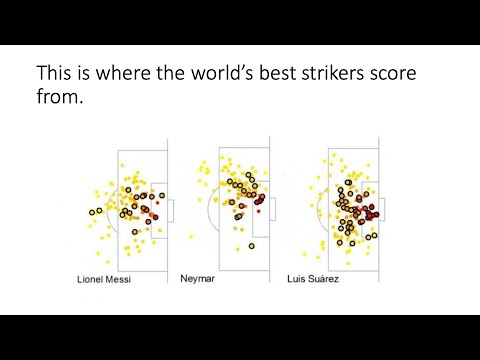

In [178]:
# How to explain Expected Goals to a football player by David Sumpter (@Soccermatics)
YouTubeVideo('Xc6IG9-Dt18')

### <a id='#section7.2'>7.2. Body Part</a>

In [77]:
# Print statements about the dataset

## Assign variables
number_of_shots_all = len(df_op_shots_after)

## Print statement
print(f'All shots: {number_of_shots_all:,}.')

## Body Part types and their frequency
df_op_shots_after.groupby(['BodyPart']).BodyPart.count()

All shots: 10,269.


BodyPart
Head     1860
Left     3309
Other      70
Right    5030
Name: BodyPart, dtype: int64

70 goals are scored with an 'Other' body part. As this body part cannot be identified, this will affect how this model works with the Metrica Sports data, where the body part is either 'foot' or 'head'. For this reason, these 70 shots will be removed from the dataset, but this will take place after the univariate analysis in the next section, where this is touched upon again.

### <a id='#section7.3'>7.3. Number of Intervening Opponents</a>

In [78]:
# Print statements about the dataset

## Assign variables
number_of_shots_all = len(df_op_shots_after)

## Print statement
print(f'All shots: {number_of_shots_all:,}.')

## Body Part types and their frequency
df_op_shots_after.groupby(['Number_Intervening_Opponents']).Number_Intervening_Opponents.count()

All shots: 10,269.


Number_Intervening_Opponents
0      132
1     2130
2     3834
3     2591
4     1033
5      362
6      131
7       47
8        7
10       1
11       1
Name: Number_Intervening_Opponents, dtype: int64

The values look correct, there are between 0 to 11 intervening opponents, which makes logic sense. No further action required.

### <a id='#section7.4'>7.4. Number of Intervening Teammates</a>

In [79]:
# Print statements about the dataset

## Assign variables
number_of_shots_all = len(df_op_shots_after)

## Print statement
print(f'All shots: {number_of_shots_all:,}.')

## Body Part types and their frequency
df_op_shots_after.groupby(['Number_Intervening_Teammates']).Number_Intervening_Teammates.count()

All shots: 10,269.


Number_Intervening_Teammates
0    7960
1    1802
2     399
3      90
4      15
5       3
Name: Number_Intervening_Teammates, dtype: int64

The values look correct, there are between 0 to 7 intervening team mates (max 10 team mates), which makes logic sense. No further action required.

### <a id='#section7.5'>7.5. Interference on Shooter</a>

In [80]:
# Print statements about the dataset

## Assign variables
number_of_shots_all = len(df_op_shots_after)

## Print statement
print(f'All shots: {number_of_shots_all:,}.')

## Body Part types and their frequency
df_op_shots_after.groupby(['Interference_on_Shooter']).Interference_on_Shooter.count()

All shots: 10,269.


Interference_on_Shooter
High       1692
Low        3398
Medium     5136
Unknown      43
Name: Interference_on_Shooter, dtype: int64

As with the 'Body Part', 43 goals are scored with 'Unknown' interference. As this level of interference on the shooter cannot be identified, this will affect how this model works with the Metrica Sports data, where thanks to the tracking data we always know this level of interference. For this reason, these 43 shots will be removed from the dataset, but this will take place after the univariate analysis in the next section, where this is touched upon again.

### <a id='#section7.6'>7.6. Impact on Log Loss</a>
Before we start with the next section, let's quickly check what impact the outlier treatment had on our log loss. As we only changed 0.06% of the data points, we would only expect a very little impact. Nevertheless, we should recompute it to have a good baseline for our actual model development.

First, we need to recalculate our training and test set (by the way, if you don't know why we split into test and train, you should definitely look it up - this is one of the key concepts of machine learning and there is tons of material on this online). Notice, that in contrast to the shitty example above, we do not only keep the feature columns and target column separately, but we store everything (including non-feature information) in a new data frame. We will see below why in my opinion this makes a lot of sense...

In [81]:
df_train, df_test, _, _ = train_test_split(df_op_shots_after, df_op_shots_after['isGoal'], test_size=0.30, random_state=42)
df_train.head()

,match_minute,match_second,position_x,position_y,play_type,BodyPart,Number_Intervening_Opponents,Number_Intervening_Teammates,Interference_on_Shooter,outcome,position_xM,position_yM,position_xM_r,position_yM_r,position_xM_std,position_yM_std,position_xM_std_r,position_yM_std_r,Interference_on_Shooter_Code,BodyPartCode,isGoal,distance_to_goalM,distance_to_centerM,angle
2409,87,48,22.94,-3.24,Open Play,Right,3,1,Low,Missed,30.06,-3.247642,-30.06,3.247642,83.06,30.752358,136.06,64.752358,1,2,0,23.168746,3.247642,8.057879
2393,57,20,9.23,8.48,Open Play,Right,1,0,Medium,Saved,43.77,8.500000,-43.77,-8.500000,96.77,42.500000,149.77,76.500000,2,2,0,12.547625,8.500000,42.642284
893,55,58,20.70,5.74,Open Play,Right,3,0,Medium,Blocked,32.30,5.753538,-32.30,-5.753538,85.30,39.753538,138.30,73.753538,2,2,0,21.484720,5.753538,15.533201
9194,87,33,16.71,-9.48,Open Play,Left,2,0,Medium,Goal,36.29,-9.502358,-36.29,9.502358,89.29,24.497642,142.29,58.497642,2,1,1,19.222875,9.502358,29.625287
4229,70,50,7.73,4.49,Open Play,Head,3,0,Medium,Missed,45.27,4.500590,-45.27,-4.500590,98.27,38.500590,151.27,72.500590,2,3,0,8.944731,4.500590,30.208981


Let's save the raw training and test data sets so that we can use them later on

In [82]:
df_train_raw = df_train.copy()
df_test_raw = df_test.copy()

We re-train the logistic regression and check the log loss on the test set

In [172]:
features = ['position_xM', 
            'position_yM', 
            'BodyPartCode'
           ]

# training of the logistic regression on the train set
reg_outlier = LogisticRegression(random_state=42)
reg_outlier.fit(df_train[features], np.array(df_train['isGoal']).ravel())

# prediction on the test set
pred_probs = reg_outlier.predict_proba(df_test[features])[:,1]
print(f"Log loss after outlier removal: {sk_metrics.log_loss(df_test['isGoal'], pred_probs):.5f}")
print(f"AUC after outlier removal: {sk_metrics.roc_auc_score(df_test['isGoal'], pred_probs)*100:.2f}%")

Log loss after outlier removal: 0.32670
AUC after outlier removal: 72.76%


Good, the log loss indeed only changed very slightly from 0.33182 to 0.32910, i.e. it was reduced by 0.8%). Given that only 0.27% of the data points were changed from goal to no goal, this seems quite resonable.

---

## <a id='#section8'>8. Univariate Analysis</a>
When training a Logistic Regression algorithm, it is crucial that the probabilities are monotone in the continuous and discrete variables.

In this section, we are going to conduct a univariate analysis, to go through the features that have already been worked on and focus on the following:
1.    Meaningfulness of the features
2.    Monotonicity of continuous and discrete features
3.    One-hot (dummy) encoding of categorical features

The continuous and discrete features for which the monoticity is to be analysed are:
*    `distance`;
*    `position_yM_center`;
*    `angle`;
*    `Number_Intervening_Opponents`; and
*    `Number_Intervening_Teammates`.

The categorical features to dummy encoded are:
*    `BodyPart`; and
*    `Interference_on_Shooter`.

### <a id='#section8.1'>8.1. `distance`</a>

When looking at the position the shot was taken along the x-axis, we could use the standardised x coordinate of the position where the shot was taken, i.e. `position_xM`. However, now we have calculated the distance in the previous section when looking at outliers in the data to remove shots that were scored from much further than expected. Using the distance to the goal has other advantages for use in Logistic Regression, including:
*    Easier to check results;
*    Easier for use to create new features (see Feature Engineering section); and
*    Easier to explain to non-Data Scientists.

Next steps is to check the monotonicity of the continuous `distance` feature. 

In [86]:
# Create DataFrame to determine probability of scoring from bucketed distances - to convert this to function

## Define DataFrame
df = df_train

## Define bins
bins= [0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50,52,54,56,58,60,110]
df['distance_to_goalM_binned'] = pd.cut(df['distance_to_goalM'], bins)

## Create ID attribute
df['idx'] = range(1, len(df) + 1)

## Group and Aggregate data
df_grouped = (df.groupby('distance_to_goalM_binned')
                .agg({'idx': 'count',
                      'isGoal': 'sum'
                     }
                    )
                .reset_index()
                .rename(columns={'idx': 'shots',
                                 'isGoal': 'goals'
                                }
                       )
                .sort_values(by='distance_to_goalM_binned', ascending=True)
             )

## Clean binned attribute
df_grouped['distance_to_goalM_binned'] = df_grouped['distance_to_goalM_binned'].astype(str).str.replace('(', '').str.replace(']', '').str.replace(', ', '-')

## Create 'ratio_Goals_shots' attribute
df_grouped['ratio_goals_shots'] = df_grouped['goals'] / df_grouped['shots']

## Assign final DataFrame to specific DataFrame
df_distance = df_grouped

## Display DataFrame
df_distance.head(20)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be 

,distance_to_goalM_binned,shots,goals,ratio_goals_shots
0,0-2,15,12,0.800000
1,2-4,127,77,0.606299
2,4-6,247,92,0.372470
3,6-8,456,87,0.190789
4,8-10,739,114,0.154263
5,10-12,634,110,0.173502
6,12-14,763,104,0.136304
7,14-16,745,86,0.115436
8,16-18,515,46,0.089320
9,18-20,503,33,0.065606


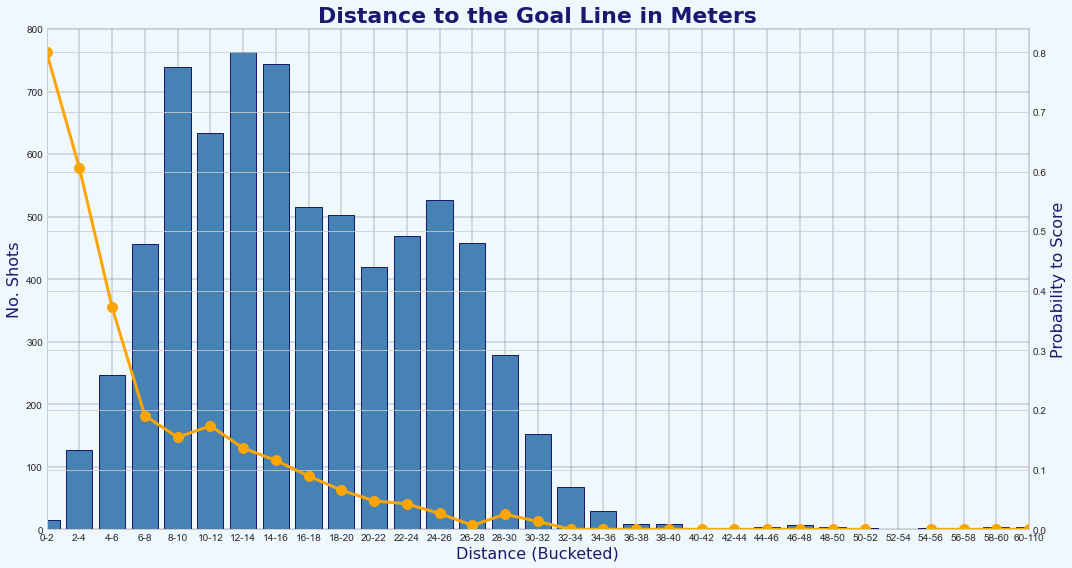

In [87]:
# Visualise the probability of scoring from different points

## Assign data to be used
df = df_distance
x_axis_bar = df['distance_to_goalM_binned']
y_axis_bar = df['shots']
x_axis_line = df['distance_to_goalM_binned']
y_axis_line = df['ratio_goals_shots']

## Set background colour
background = 'aliceblue'

## Create figure 
fig, ax = plt.subplots(figsize=(15, 8))
fig.set_facecolor(background)

## Set Gridlines 
ax.grid(linewidth=0.25, color='k', zorder=1)

## Create Bar Chart
ax.bar(x_axis_bar,
       y_axis_bar,
       edgecolor='midnightblue',
       color='steelblue'
      )


## Set subplot face colour
ax.patch.set_facecolor(background)

## Twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

## Create Line Chart
ax2.plot(x_axis_line,
         y_axis_line,
         color='orange',
         linewidth='3',
         marker='o',
         markersize='10',
         label='Goals to Shots Ratio'
        )

## Axis
plt.xlim(('0-2', '60-110'))
plt.ylim((0))

## Set title
ax.set_title('Distance to the Goal Line in Meters',
             loc='center',
             color='midnightblue', 
             fontweight='bold',
             fontfamily='DejaVu Sans',
             fontsize=22,
            )

## Set Gridlines 
ax.grid(linewidth=0.25, color='k', zorder=1)

## X and Y Labels
ax.set_xlabel('Distance (Bucketed)', color='midnightblue', fontfamily='DejaVu Sans', fontsize=16)
ax.set_ylabel('No. Shots', color='midnightblue', fontfamily='DejaVu Sans', fontsize=16)
ax2.set_ylabel('Probability to Score', color='midnightblue', fontfamily='DejaVu Sans', fontsize=16)

## Show Legend
#plt.legend()

## Save figure
if not os.path.exists(fig_shots_dir + '/op_shots_monoticity_distance.png'):
    plt.savefig(fig_shots_dir + '/op_shots_monoticity_distance.png', bbox_inches='tight', dpi=300)
else:
    pass

## Show figure
plt.tight_layout()
plt.show()

The visualisation shows that as expected, the further a shot is away from the goal line, the less likely the shot taker is to score. Right on the line, the goal has an 80% chance of being scored, which drops teeply to 60% from 2-4m and 35-37.5% from 4-6m out, putting to question when pundits often say for a string "he's got to score from there!". `distance` is therefore very monotonic and no further changes are required to this feature for use in the Logistic Regression model.

### <a id='#section8.2'>8.2. `position_yM`</a>

####  `position_yM`
Let's start by plotting the univariate variable graph of the y-coordinate of the shots. 

In [88]:
# Create DataFrame to determine probability of scoring from bucketed distances - to convert this to function

## Define DataFrame
df = df_train

## Define bins
bins = [-34,-32,-30,-28,-26,-24,-22,-20,-18,-16,-14,-12,-10,-8,-6,-4,-2,0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34]
df['position_yM_binned'] = pd.cut(df['position_yM'], bins)

## Create ID attribute
df['idx'] = range(1, len(df) + 1)

## Group and Aggregate data
df_grouped = (df.groupby('position_yM_binned')
                .agg({'idx': 'count',
                      'isGoal': 'sum'
                     }
                    )
                .reset_index()
                .rename(columns={'idx': 'shots',
                                 'isGoal': 'goals'
                                }
                       )
                .sort_values(by='position_yM_binned', ascending=True)
             )

## Clean binned attribute
df_grouped['position_yM_binned'] = df_grouped['position_yM_binned'].astype(str).str.replace('(', '').str.replace(']', '').str.replace(', ', '-')

## Create 'ratio_Goals_shots' attribute
df_grouped['ratio_goals_shots'] = df_grouped['goals'] / df_grouped['shots']

## Assign final DataFrame to specific DataFrame
df_position_yM = df_grouped

## Display DataFrame
df_position_yM

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be 

,position_yM_binned,shots,goals,ratio_goals_shots
0,-34--32,0,0,NaN
1,-32--30,1,0,0.000000
2,-30--28,2,0,0.000000
3,-28--26,3,0,0.000000
4,-26--24,2,0,0.000000
5,-24--22,11,0,0.000000
6,-22--20,9,0,0.000000
7,-20--18,29,0,0.000000
8,-18--16,108,0,0.000000
9,-16--14,279,12,0.043011


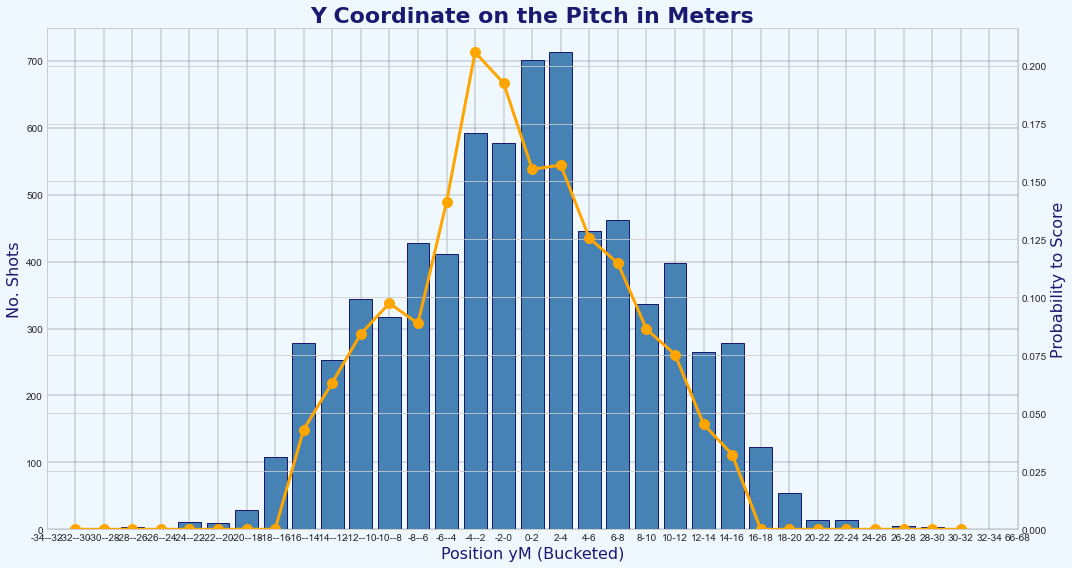

In [89]:
# Visualise the probability of scoring from different points

## Assign data to be used
df = df_position_yM
x_axis_bar = df['position_yM_binned']
y_axis_bar = df['shots']
x_axis_line = df['position_yM_binned']
y_axis_line = df['ratio_goals_shots']

## Set background colour
background = 'aliceblue'

## Create figure 
fig, ax = plt.subplots(figsize=(15, 8))
fig.set_facecolor(background)

## Set Gridlines 
ax.grid(linewidth=0.25, color='k', zorder=1)

## Create Bar Chart
ax.bar(x_axis_bar,
       y_axis_bar,
       edgecolor='midnightblue',
       color='steelblue'
      )


## Set subplot face colour
ax.patch.set_facecolor(background)

## Twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

## Create Line Chart
ax2.plot(x_axis_line,
         y_axis_line,
         color='orange',
         linewidth='3',
         marker='o',
         markersize='10',
         label='Goals to Shots Ratio'
        )

## Axis
plt.xlim(('-34--32', '66-68'))
plt.ylim((0))

## Set title
ax.set_title('Y Coordinate on the Pitch in Meters',
             loc='center',
             color='midnightblue', 
             fontweight='bold',
             fontfamily='DejaVu Sans',
             fontsize=22,
            )

## Set Gridlines 
ax.grid(linewidth=0.25, color='k', zorder=1)

## X and Y Labels
ax.set_xlabel('Position yM (Bucketed)', color='midnightblue', fontfamily='DejaVu Sans', fontsize=16)
ax.set_ylabel('No. Shots', color='midnightblue', fontfamily='DejaVu Sans', fontsize=16)
ax2.set_ylabel('Probability to Score', color='midnightblue', fontfamily='DejaVu Sans', fontsize=16)

## Show Legend
#plt.legend()

## Save figure
if not os.path.exists(fig_shots_dir + '/op_shots_monoticity_postion_yM.png'):
    plt.savefig(fig_shots_dir + '/op_shots_monoticity_postion_yM.png', bbox_inches='tight', dpi=300)
else:
    pass

## Show figure
plt.tight_layout()
plt.show()

The standardised `position_yM` feature has a normal distribution and is not monotone, with the shots with the highest probability to score lying at -4-2m and -2-0m, i.e. the center of the field.

Therefore a better attribute would be measuring the distance the player is from the center of the field along the y-axis, which was determined in the previous section, `distnace_to_centerM`.

####  `distance_to_centerM`
The code to convert the `position_yM` feature to a new feature, `distance_to_centerM`, is as follows:

In [90]:
df_train['distance_to_centerM'] = np.abs(df_train['position_yM'])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [91]:
# Create DataFrame to determine probability of scoring from bucketed distances

## Define DataFrame
df = df_train

## Define bins
bins = [0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50,52,54,56,58,60,62,64,68]
df['distance_to_centerM_binned'] = pd.cut(df['distance_to_centerM'], bins)

## Create ID attribute
df['idx'] = range(1, len(df) + 1)

## Group and Aggregate data
df_grouped = (df.groupby('distance_to_centerM_binned')
                .agg({'idx': 'count',
                      'isGoal': 'sum'
                     }
                    )
                .reset_index()
                .rename(columns={'idx': 'shots',
                                 'isGoal': 'goals'
                                }
                       )
                .sort_values(by='distance_to_centerM_binned', ascending=True)
             )

## Clean binned attribute
df_grouped['distance_to_centerM_binned'] = df_grouped['distance_to_centerM_binned'].astype(str).str.replace('(', '').str.replace(']', '').str.replace(', ', '-')

## Create 'ratio_Goals_shots' attribute
df_grouped['ratio_goals_shots'] = df_grouped['goals'] / df_grouped['shots']

## Assign final DataFrame to specific DataFrame
df_distance_to_centerM = df_grouped

## Display DataFrame
df_distance_to_centerM

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be 

,distance_to_centerM_binned,shots,goals,ratio_goals_shots
0,0-2,1269,215,0.169425
1,2-4,1306,234,0.179173
2,4-6,857,114,0.133022
3,6-8,890,91,0.102247
4,8-10,654,60,0.091743
5,10-12,742,59,0.079515
6,12-14,518,28,0.054054
7,14-16,558,21,0.037634
8,16-18,231,0,0.000000
9,18-20,84,0,0.000000


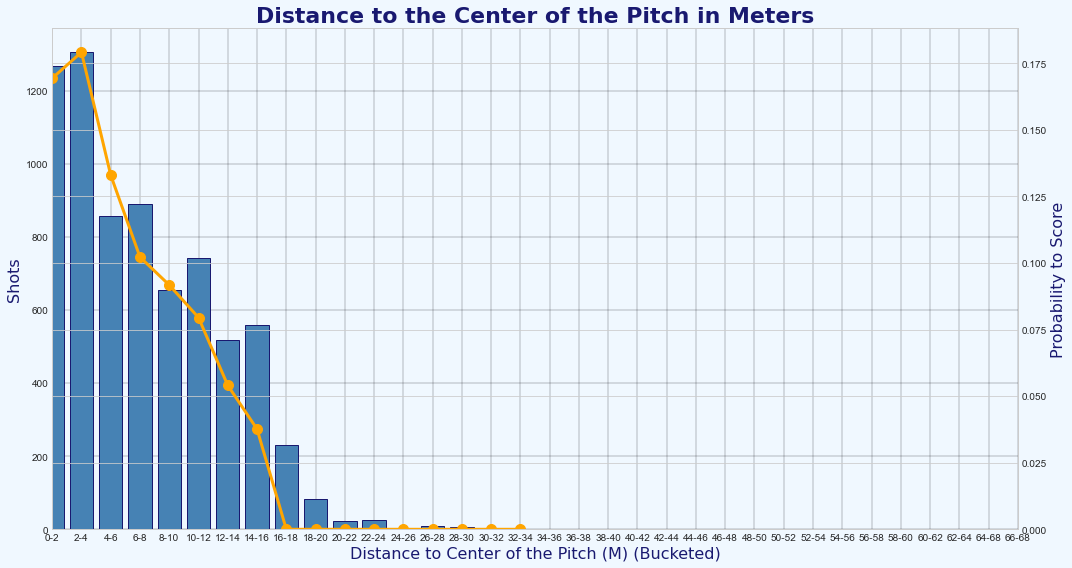

In [92]:
# Visualise the probability of scoring from different points

## Assign data to be used
df = df_distance_to_centerM
x_axis_bar = df['distance_to_centerM_binned']
y_axis_bar = df['shots']
x_axis_line = df['distance_to_centerM_binned']
y_axis_line = df['ratio_goals_shots']

## Set background colour
background = 'aliceblue'

## Create figure 
fig, ax = plt.subplots(figsize=(15, 8))
fig.set_facecolor(background)

## Set Gridlines 
ax.grid(linewidth=0.25, color='k', zorder=1)

## Create Bar Chart
ax.bar(x_axis_bar,
       y_axis_bar,
       edgecolor='midnightblue',
       color='steelblue'
      )


## Set subplot face colour
ax.patch.set_facecolor(background)

## Twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

## Create Line Chart
ax2.plot(x_axis_line,
         y_axis_line,
         color='orange',
         linewidth='3',
         marker='o',
         markersize='10',
         label='Goals to Shots Ratio'
        )

## Axis
plt.xlim(('0-2', '66-68'))
plt.ylim((0))

## Set title
ax.set_title('Distance to the Center of the Pitch in Meters',
             loc='center',
             color='midnightblue', 
             fontweight='bold',
             fontfamily='DejaVu Sans',
             fontsize=22,
            )

## Set Gridlines 
ax.grid(linewidth=0.25, color='k', zorder=1)

## X and Y Labels
ax.set_xlabel('Distance to Center of the Pitch (M) (Bucketed)', color='midnightblue', fontfamily='DejaVu Sans', fontsize=16)
ax.set_ylabel('Shots', color='midnightblue', fontfamily='DejaVu Sans', fontsize=16)
ax2.set_ylabel('Probability to Score', color='midnightblue', fontfamily='DejaVu Sans', fontsize=16)

## Show Legend
#plt.legend()

## Save figure
if not os.path.exists(fig_shots_dir + '/op_shots_monoticity_distance_center_pitchM.png'):
    plt.savefig(fig_shots_dir + '/op_shots_monoticity_distance_center_pitchM.png', bbox_inches='tight', dpi=300)
else:
    pass

## Show figure
plt.tight_layout()
plt.show()

The visualisation shows that this feature is monotone, the further a shot is from the center of the field, the less likely the shot taker is to score. `distance_to_centerM` is therefore very monotonic and no further changes are required.

### <a id='#section8.3'>8.3. `angle`</a>

In [93]:
# Create DataFrame to determine probability of scoring from bucketed distances - to convert this to function

## Define DataFrame
df = df_train

## Define bins
bins = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90]
df['angle_binned'] = pd.cut(df['angle'], bins)

## Create ID attribute
df['idx'] = range(1, len(df) + 1)

## Group and Aggregate data
df_grouped = (df.groupby('angle_binned')
                .agg({'idx': 'count',
                      'isGoal': 'sum'
                     }
                    )
                .reset_index()
                .rename(columns={'idx': 'shots',
                                 'isGoal': 'goals'
                                }
                       )
                .sort_values(by='angle_binned', ascending=True)
             )

## Clean binned attribute
df_grouped['angle_binned'] = df_grouped['angle_binned'].astype(str).str.replace('(', '').str.replace(']', '').str.replace(', ', '-')

## Create 'ratio_Goals_shots' attribute
df_grouped['ratio_goals_shots'] = df_grouped['goals'] / df_grouped['shots']

## Assign final DataFrame to specific DataFrame
df_angle = df_grouped

## Display DataFrame
df_angle

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be 

,angle_binned,shots,goals,ratio_goals_shots
0,0-5,749,64,0.085447
1,5-10,745,83,0.111409
2,10-15,685,98,0.143066
3,15-20,653,81,0.124043
4,20-25,634,75,0.118297
5,25-30,591,71,0.120135
6,30-35,623,76,0.121990
7,35-40,574,56,0.097561
8,40-45,427,41,0.096019
9,45-50,435,52,0.119540


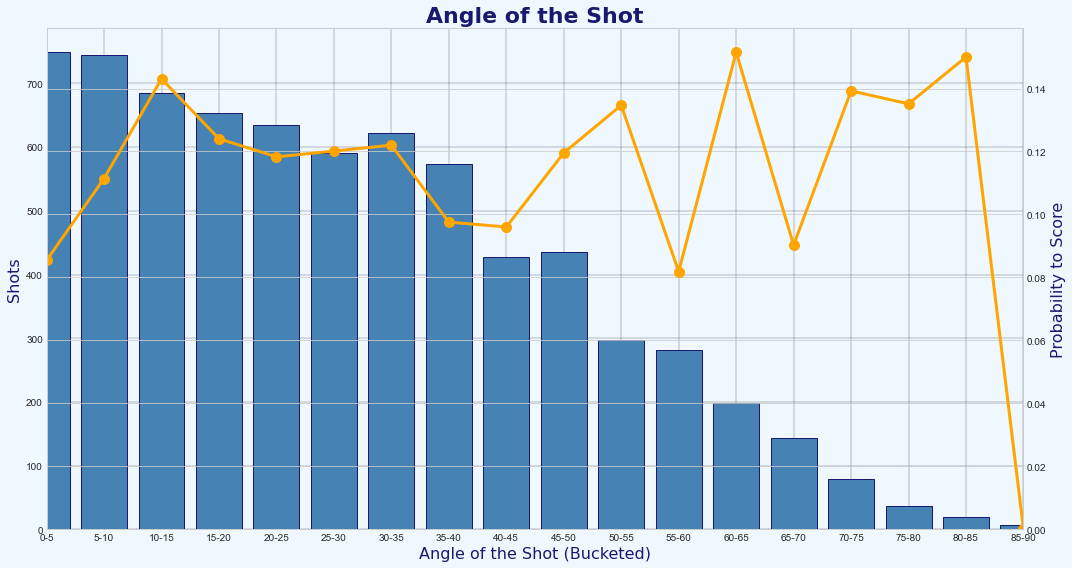

In [94]:
# Visualise the probability of scoring from different angles

## Assign data to be used
df = df_angle
x_axis_bar = df['angle_binned']
y_axis_bar = df['shots']
x_axis_line = df['angle_binned']
y_axis_line = df['ratio_goals_shots']

## Set background colour
background = 'aliceblue'

## Create figure 
fig, ax = plt.subplots(figsize=(15, 8))
fig.set_facecolor(background)

## Set Gridlines 
ax.grid(linewidth=0.25, color='k', zorder=1)

## Create Bar Chart
ax.bar(x_axis_bar,
       y_axis_bar,
       edgecolor='midnightblue',
       color='steelblue'
      )


## Set subplot face colour
ax.patch.set_facecolor(background)

## Twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

## Create Line Chart
ax2.plot(x_axis_line,
         y_axis_line,
         color='orange',
         linewidth='3',
         marker='o',
         markersize='10',
         label='Goals to Shots Ratio'
        )

## Axis
plt.xlim(('0-5', '85-90'))
plt.ylim((0))

## Set title
ax.set_title('Angle of the Shot',
             loc='center',
             color='midnightblue', 
             fontweight='bold',
             fontfamily='DejaVu Sans',
             fontsize=22,
            )

## Set Gridlines 
ax.grid(linewidth=0.25, color='k', zorder=1)

## X and Y Labels
ax.set_xlabel('Angle of the Shot (Bucketed)', color='midnightblue', fontfamily='DejaVu Sans', fontsize=16)
ax.set_ylabel('Shots', color='midnightblue', fontfamily='DejaVu Sans', fontsize=16)
ax2.set_ylabel('Probability to Score', color='midnightblue', fontfamily='DejaVu Sans', fontsize=16)

## Show Legend
#plt.legend()

## Save figure
if not os.path.exists(fig_shots_dir + '/op_shots_monoticity_angle.png'):
    plt.savefig(fig_shots_dir + '/op_shots_monoticity_angle.png', bbox_inches='tight', dpi=300)
else:
    pass

## Show figure
plt.tight_layout()
plt.show()

We can see in the above chart, it is relatively monotone to around 25-30 and 30-35 degrees, at which points it increases/decreases in a random fashion. Let's just clip the values at 35 to have a strong monotone curve.

### <a id='#section8.4'>8.4. `Number_Intervening_Opponents`</a>

In [95]:
# Create DataFrame to determine probability of scoring from bucketed distances

## Define DataFrame
df = df_train

## Create ID attribute
df['idx'] = range(1, len(df) + 1)

## Group and Aggregate data
df_grouped = (df.groupby('Number_Intervening_Opponents')
                .agg({'idx': 'count',
                      'isGoal': 'sum'
                     }
                    )
                .reset_index()
                .rename(columns={'idx': 'shots',
                                 'isGoal': 'goals'
                                }
                       )
                .sort_values(by='Number_Intervening_Opponents', ascending=True)
             )

## Create 'ratio_Goals_shots' attribute
df_grouped['ratio_goals_shots'] = df_grouped['goals'] / df_grouped['shots']

## Assign final DataFrame to specific DataFrame
df_intervening_opponents = df_grouped

## Display DataFrame
df_intervening_opponents

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Number_Intervening_Opponents,shots,goals,ratio_goals_shots
0,0,105,74,0.704762
1,1,1468,368,0.250681
2,2,2665,236,0.088555
3,3,1825,107,0.058630
4,4,737,33,0.044776
5,5,253,7,0.027668
6,6,93,2,0.021505
7,7,38,0,0.000000
8,8,4,0,0.000000


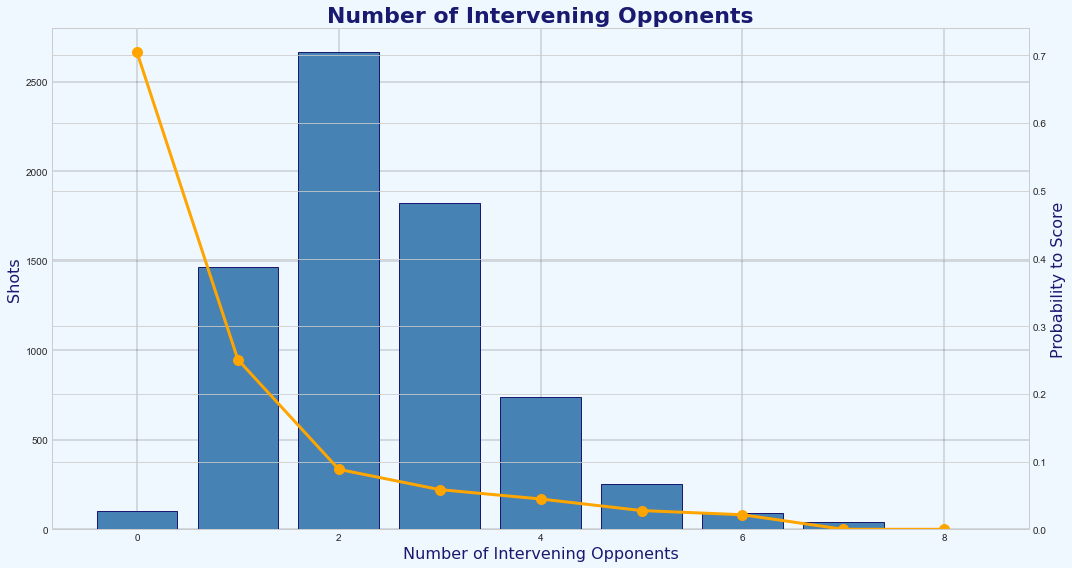

In [96]:
# Visualise the probability of scoring from different angles

## Assign data to be used
df = df_intervening_opponents
x_axis_bar = df['Number_Intervening_Opponents']
y_axis_bar = df['shots']
x_axis_line = df['Number_Intervening_Opponents']
y_axis_line = df['ratio_goals_shots']

## Set background colour
background = 'aliceblue'

## Create figure 
fig, ax = plt.subplots(figsize=(15, 8))
fig.set_facecolor(background)

## Set Gridlines 
ax.grid(linewidth=0.25, color='k', zorder=1)

## Create Bar Chart
ax.bar(x_axis_bar,
       y_axis_bar,
       edgecolor='midnightblue',
       color='steelblue'
      )

## Set subplot face colour
ax.patch.set_facecolor(background)

## Twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

## Create Line Chart
ax2.plot(x_axis_line,
         y_axis_line,
         color='orange',
         linewidth='3',
         marker='o',
         markersize='10',
         label='Goals to Shots Ratio'
        )

## Axis
#plt.xlim(('0-5', '85-90'))
plt.ylim((0))

## Set title
ax.set_title('Number of Intervening Opponents',
             loc='center',
             color='midnightblue', 
             fontweight='bold',
             fontfamily='DejaVu Sans',
             fontsize=22,
            )

## Set Gridlines 
ax.grid(linewidth=0.25, color='k', zorder=1)

## X and Y Labels
ax.set_xlabel('Number of Intervening Opponents', color='midnightblue', fontfamily='DejaVu Sans', fontsize=16)
ax.set_ylabel('Shots', color='midnightblue', fontfamily='DejaVu Sans', fontsize=16)
ax2.set_ylabel('Probability to Score', color='midnightblue', fontfamily='DejaVu Sans', fontsize=16)

## Show Legend
#plt.legend()

## Save figure
if not os.path.exists(fig_shots_dir + '/op_shots_monoticity_intervening_opponents.png'):
    plt.savefig(fig_shots_dir + '/op_shots_monoticity_intervening_opponents.png', bbox_inches='tight', dpi=300)
else:
    pass

## Show figure
plt.tight_layout()
plt.show()

### <a id='#section8.5'>8.5. `Number_Intervening_Teammates`</a>

In [97]:
# Create DataFrame to determine probability of scoring from bucketed distances

## Define DataFrame
df = df_train

## Create ID attribute
df['idx'] = range(1, len(df) + 1)

## Group and Aggregate data
df_grouped = (df.groupby('Number_Intervening_Teammates')
                .agg({'idx': 'count',
                      'isGoal': 'sum'
                     }
                    )
                .reset_index()
                .rename(columns={'idx': 'shots',
                                 'isGoal': 'goals'
                                }
                       )
                .sort_values(by='Number_Intervening_Teammates', ascending=True)
             )

## Create 'ratio_Goals_shots' attribute
df_grouped['ratio_goals_shots'] = df_grouped['goals'] / df_grouped['shots']

## Assign final DataFrame to specific DataFrame
df_intervening_teammates = df_grouped

## Display DataFrame
df_intervening_teammates

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Number_Intervening_Teammates,shots,goals,ratio_goals_shots
0,0,5568,740,0.132902
1,1,1249,74,0.059247
2,2,292,7,0.023973
3,3,62,6,0.096774
4,4,15,0,0.000000
5,5,2,0,0.000000


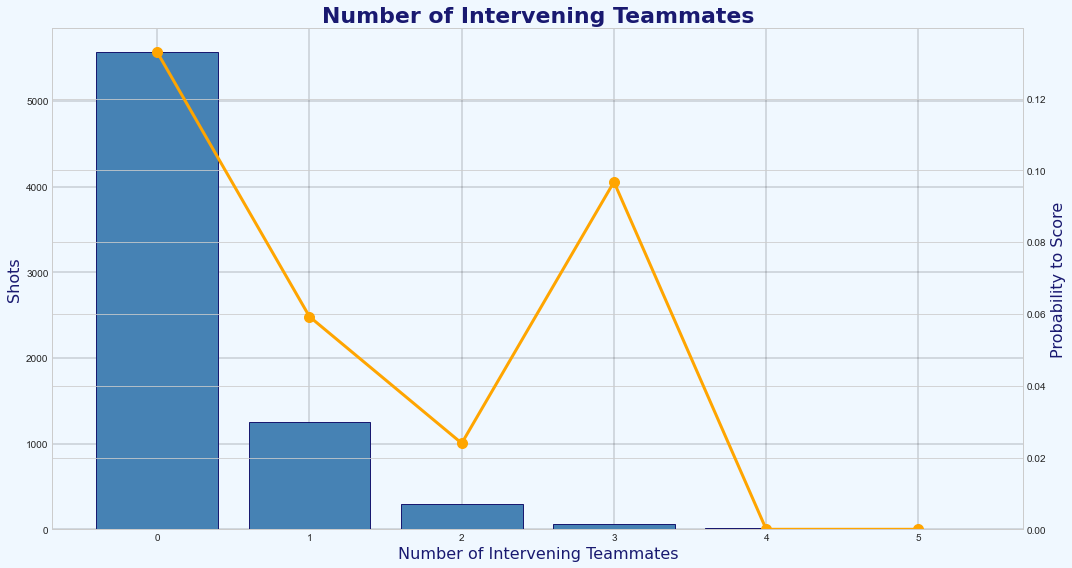

In [98]:
# Visualise the probability of scoring from different angles

## Assign data to be used
df = df_intervening_teammates
x_axis_bar = df['Number_Intervening_Teammates']
y_axis_bar = df['shots']
x_axis_line = df['Number_Intervening_Teammates']
y_axis_line = df['ratio_goals_shots']

## Set background colour
background = 'aliceblue'

## Create figure 
fig, ax = plt.subplots(figsize=(15, 8))
fig.set_facecolor(background)

## Set Gridlines 
ax.grid(linewidth=0.25, color='k', zorder=1)

## Create Bar Chart
ax.bar(x_axis_bar,
       y_axis_bar,
       edgecolor='midnightblue',
       color='steelblue'
      )

## Set subplot face colour
ax.patch.set_facecolor(background)

## Twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

## Create Line Chart
ax2.plot(x_axis_line,
         y_axis_line,
         color='orange',
         linewidth='3',
         marker='o',
         markersize='10',
         label='Goals to Shots Ratio'
        )

## Axis
#plt.xlim(('0-5', '85-90'))
plt.ylim((0))

## Set title
ax.set_title('Number of Intervening Teammates',
             loc='center',
             color='midnightblue', 
             fontweight='bold',
             fontfamily='DejaVu Sans',
             fontsize=22,
            )

## Set Gridlines 
ax.grid(linewidth=0.25, color='k', zorder=1)

## X and Y Labels
ax.set_xlabel('Number of Intervening Teammates', color='midnightblue', fontfamily='DejaVu Sans', fontsize=16)
ax.set_ylabel('Shots', color='midnightblue', fontfamily='DejaVu Sans', fontsize=16)
ax2.set_ylabel('Probability to Score', color='midnightblue', fontfamily='DejaVu Sans', fontsize=16)

## Show Legend
#plt.legend()

## Save figure
if not os.path.exists(fig_shots_dir + '/op_shots_monoticity_intervening_teammates.png'):
    plt.savefig(fig_shots_dir + '/op_shots_monoticity_intervening_teammates.png', bbox_inches='tight', dpi=300)
else:
    pass

## Show figure
plt.tight_layout()
plt.show()

### <a id='#section8.6'>8.6. `Body Part`</a>
The next variable to analyse is the body part with which the shot was taken. 

Let's first look at how many shots are taken and subsequently, goals scored with each body part, to determine the ratio of goals to shots.

In [99]:
# Body Part types used for shots  and their frequency

## Group and Aggregate data
df_body_part = (df_op_shots_after.groupby('BodyPart')
                                 .agg({'match_minute': 'count',
                                       'isGoal': 'sum'
                                      }
                                     )
                                 .reset_index()
                                 .rename(columns={'match_minute': 'shots',
                                                  'isGoal': 'goals'
                                                 }
                                        )
                                 .sort_values(by='BodyPart', ascending=True)
                )

## Create 'ratio_Goals_shots' attribute
df_body_part['ratio_goals_shots'] = df_body_part['goals'] / df_body_part['shots']

## Display DataFrame
df_body_part

,BodyPart,shots,goals,ratio_goals_shots
0,Head,1860,233,0.125269
1,Left,3309,413,0.124811
2,Other,70,24,0.342857
3,Right,5030,530,0.105368


From the data there is left foot, right foot, header, and other.

Firstly, when looking at each foot, the laterality of the player, whether they shoot with their left or right foot should have no bearing on the probability to score - take David Beckham's right foot and Roberto Carlos' left foot.

However, in our data, it appears that a player has nearly a 2% greater chance if they score with their left foot, and the chance of them scoring with their right foot is less than that when using their head. This is unexpected.

As we have no Feature that explicitely mentions the player in question's preferred foot, we are unable to determine features such as whether the goal was scored with their strongest foot. It's also possible to determine this with a full set of event data, analysing how many actions were done per foot in a match, per player, and assigning the most used foot as the preferred foot. Unfortunately this data isn't available to us, so instead, we will just differentiate between foot or head/other.

However, whether the shot was scored with their head or other body part should have an effect.

According to The Numbers Game, a shot with either foot is twice as likely to be scored than a header from the same position, within the 18 yard box. Headers should therefore be isolated.

What is unusual about the data, is that the ratio of goals to shots for the 'Other' body part is much higher that foot or header. As 'other' is an unknown quantity, these shots will be removed from the test and train datasets.

In [100]:
print(f'Train shots before treatment: {len(df_train):,}')
print(f'Test shots before treatment: {len(df_test):,}')

Train shots before treatment: 7,188
Test shots before treatment: 3,081


In [101]:
df_train = df_train[df_train['BodyPart'] != 'Other']
df_test = df_test[df_test['BodyPart'] != 'Other']

In [102]:
print(f'Train shots after treatment: {len(df_train):,}')
print(f'Test shots after treatment: {len(df_test):,}')

Train shots after treatment: 7,130
Test shots after treatment: 3,069


In [103]:
# Define dictionary of whether shot was taken with a foot or not
dict_isFoot = {'Left': 1,
               'Right': 1,
               'Head': 0,
               'Other': 0
              }

# Map isFoot assignment to DataFrame
df_train['isFoot'] = df_train['BodyPart'].map(dict_isFoot)

## Display DataFrame
df_train.head()

,match_minute,match_second,position_x,position_y,play_type,BodyPart,Number_Intervening_Opponents,Number_Intervening_Teammates,Interference_on_Shooter,outcome,position_xM,position_yM,position_xM_r,position_yM_r,position_xM_std,position_yM_std,position_xM_std_r,position_yM_std_r,Interference_on_Shooter_Code,BodyPartCode,isGoal,distance_to_goalM,distance_to_centerM,angle,distance_to_goalM_binned,idx,position_yM_binned,distance_to_centerM_binned,angle_binned,isFoot
2409,87,48,22.94,-3.24,Open Play,Right,3,1,Low,Missed,30.06,-3.247642,-30.06,3.247642,83.06,30.752358,136.06,64.752358,1,2,0,23.168746,3.247642,8.057879,"(22, 24]",1,"(-4, -2]","(2, 4]","(5, 10]",1
2393,57,20,9.23,8.48,Open Play,Right,1,0,Medium,Saved,43.77,8.500000,-43.77,-8.500000,96.77,42.500000,149.77,76.500000,2,2,0,12.547625,8.500000,42.642284,"(12, 14]",2,"(8, 10]","(8, 10]","(40, 45]",1
893,55,58,20.70,5.74,Open Play,Right,3,0,Medium,Blocked,32.30,5.753538,-32.30,-5.753538,85.30,39.753538,138.30,73.753538,2,2,0,21.484720,5.753538,15.533201,"(20, 22]",3,"(4, 6]","(4, 6]","(15, 20]",1
9194,87,33,16.71,-9.48,Open Play,Left,2,0,Medium,Goal,36.29,-9.502358,-36.29,9.502358,89.29,24.497642,142.29,58.497642,2,1,1,19.222875,9.502358,29.625287,"(18, 20]",4,"(-10, -8]","(8, 10]","(25, 30]",1
4229,70,50,7.73,4.49,Open Play,Head,3,0,Medium,Missed,45.27,4.500590,-45.27,-4.500590,98.27,38.500590,151.27,72.500590,2,3,0,8.944731,4.500590,30.208981,"(8, 10]",5,"(4, 6]","(4, 6]","(30, 35]",0


In [104]:
# Define dictionary of whether shot was taken with the head or not
dict_isHead = {'Left': 0,
               'Right': 0,
               'Head': 1,
               'Other': 0
              }

# Map isFoot assignment to DataFrame
df_train['isHead'] = df_train['BodyPart'].map(dict_isHead)

## Display DataFrame
df_train.head()

,match_minute,match_second,position_x,position_y,play_type,BodyPart,Number_Intervening_Opponents,Number_Intervening_Teammates,Interference_on_Shooter,outcome,position_xM,position_yM,position_xM_r,position_yM_r,position_xM_std,position_yM_std,position_xM_std_r,position_yM_std_r,Interference_on_Shooter_Code,BodyPartCode,isGoal,distance_to_goalM,distance_to_centerM,angle,distance_to_goalM_binned,idx,position_yM_binned,distance_to_centerM_binned,angle_binned,isFoot,isHead
2409,87,48,22.94,-3.24,Open Play,Right,3,1,Low,Missed,30.06,-3.247642,-30.06,3.247642,83.06,30.752358,136.06,64.752358,1,2,0,23.168746,3.247642,8.057879,"(22, 24]",1,"(-4, -2]","(2, 4]","(5, 10]",1,0
2393,57,20,9.23,8.48,Open Play,Right,1,0,Medium,Saved,43.77,8.500000,-43.77,-8.500000,96.77,42.500000,149.77,76.500000,2,2,0,12.547625,8.500000,42.642284,"(12, 14]",2,"(8, 10]","(8, 10]","(40, 45]",1,0
893,55,58,20.70,5.74,Open Play,Right,3,0,Medium,Blocked,32.30,5.753538,-32.30,-5.753538,85.30,39.753538,138.30,73.753538,2,2,0,21.484720,5.753538,15.533201,"(20, 22]",3,"(4, 6]","(4, 6]","(15, 20]",1,0
9194,87,33,16.71,-9.48,Open Play,Left,2,0,Medium,Goal,36.29,-9.502358,-36.29,9.502358,89.29,24.497642,142.29,58.497642,2,1,1,19.222875,9.502358,29.625287,"(18, 20]",4,"(-10, -8]","(8, 10]","(25, 30]",1,0
4229,70,50,7.73,4.49,Open Play,Head,3,0,Medium,Missed,45.27,4.500590,-45.27,-4.500590,98.27,38.500590,151.27,72.500590,2,3,0,8.944731,4.500590,30.208981,"(8, 10]",5,"(4, 6]","(4, 6]","(30, 35]",0,1


In [105]:
df_train.columns

Index(['match_minute', 'match_second', 'position_x', 'position_y', 'play_type',
       'BodyPart', 'Number_Intervening_Opponents',
       'Number_Intervening_Teammates', 'Interference_on_Shooter', 'outcome',
       'position_xM', 'position_yM', 'position_xM_r', 'position_yM_r',
       'position_xM_std', 'position_yM_std', 'position_xM_std_r',
       'position_yM_std_r', 'Interference_on_Shooter_Code', 'BodyPartCode',
       'isGoal', 'distance_to_goalM', 'distance_to_centerM', 'angle',
       'distance_to_goalM_binned', 'idx', 'position_yM_binned',
       'distance_to_centerM_binned', 'angle_binned', 'isFoot', 'isHead'],
      dtype='object')

In [106]:
# Body Part types used for shots  and their frequency

## Group and Aggregate data
df_body_part = (df_train.groupby('BodyPart')
                        .agg({'idx': 'count',
                              'isGoal': 'sum'
                             }
                            )
                        .reset_index()
                        .rename(columns={'idx': 'shots',
                                         'isGoal': 'goals'
                                        }
                               )
                        .sort_values(by='BodyPart', ascending=True)
                )

## Create 'ratio_Goals_shots' attribute
df_body_part['ratio_goals_shots'] = df_body_part['goals'] / df_body_part['shots']

## Display DataFrame
df_body_part

,BodyPart,shots,goals,ratio_goals_shots
0,Head,1274,150,0.117739
1,Left,2332,287,0.123070
2,Right,3524,372,0.105562


In [107]:
# Create DataFrame to determine probability of scoring from feet or head

## Define DataFrame
df = df_train

## Create ID attribute
df['idx'] = range(1, len(df) + 1)

## Group and Aggregate data
df_grouped = (df.groupby('isFoot')
                .agg({'idx': 'count',
                      'isGoal': 'sum'
                     }
                    )
                .reset_index()
                .rename(columns={'idx': 'shots',
                                 'isGoal': 'goals'
                                }
                       )
                .sort_values(by='isFoot', ascending=True)
             )

## Create 'ratio_Goals_shots' attribute
df_grouped['ratio_goals_shots'] = df_grouped['goals'] / df_grouped['shots']

## Assign final DataFrame to specific DataFrame
df_isFoot = df_grouped

## Display DataFrame
df_isFoot

,isFoot,shots,goals,ratio_goals_shots
0,0,1274,150,0.117739
1,1,5856,659,0.112534


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator


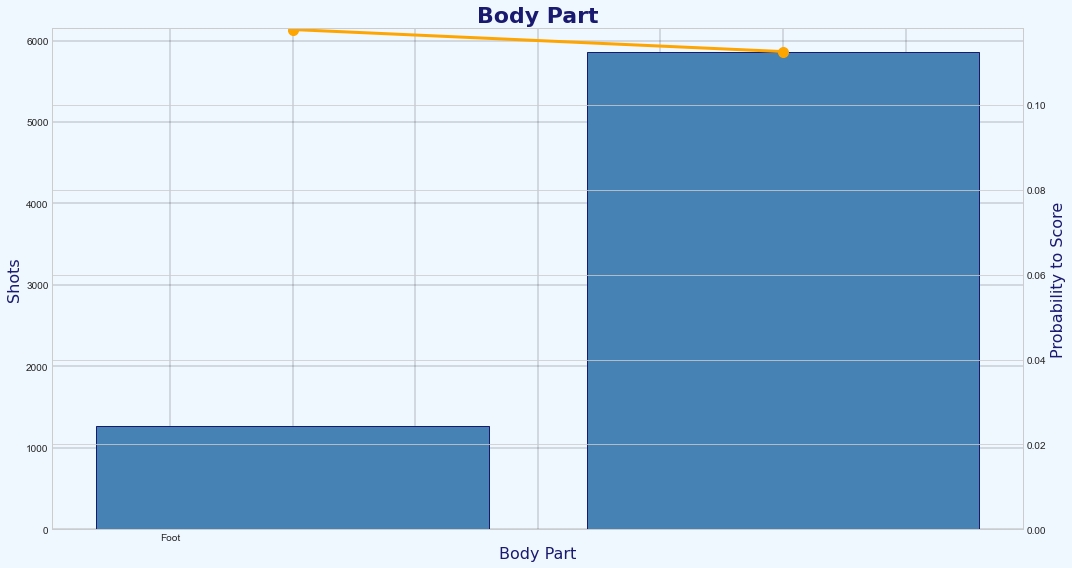

In [108]:
# Visualise the probability of scoring from different angles

## Assign data to be used
df = df_isFoot
x_axis_bar = df['isFoot']
y_axis_bar = df['shots']
x_axis_line = df['isFoot']
y_axis_line = df['ratio_goals_shots']

## Set background colour
background = 'aliceblue'

## Create figure 
fig, ax = plt.subplots(figsize=(15, 8))
fig.set_facecolor(background)

## Set Gridlines 
ax.grid(linewidth=0.25, color='k', zorder=1)

## Create Bar Chart
ax.bar(x_axis_bar,
       y_axis_bar,
       
       edgecolor='midnightblue',
       color='steelblue'
      )

## Custom x-axis labels
x_labels = ['Head', 'Foot']
ax.set_xticklabels(x_labels)

## Set subplot face colour
ax.patch.set_facecolor(background)

## Twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

## Create Line Chart
ax2.plot(x_axis_line,
         y_axis_line,
         color='orange',
         linewidth='3',
         marker='o',
         markersize='10',
         label='Goals to Shots Ratio'
        )

## Axis
#plt.xlim(('0-5', '85-90'))
plt.ylim((0))

## Set title
ax.set_title('Body Part',
             loc='center',
             color='midnightblue', 
             fontweight='bold',
             fontfamily='DejaVu Sans',
             fontsize=22,
            )

## Set Gridlines 
ax.grid(linewidth=0.25, color='k', zorder=1)

## X and Y Labels
ax.set_xlabel('Body Part', color='midnightblue', fontfamily='DejaVu Sans', fontsize=16)
ax.set_ylabel('Shots', color='midnightblue', fontfamily='DejaVu Sans', fontsize=16)
ax2.set_ylabel('Probability to Score', color='midnightblue', fontfamily='DejaVu Sans', fontsize=16)

## Show Legend
#plt.legend()

## Save figure
if not os.path.exists(fig_shots_dir + '/op_shots_monoticity_isFoot.png'):
    plt.savefig(fig_shots_dir + '/op_shots_monoticity_isFoot.png', bbox_inches='tight', dpi=300)
else:
    pass

## Show figure
plt.tight_layout()
plt.show()

As the data is giving unexpected values as to whether a shot is scored with a head or foot, and showing that the shot has more chance to be score when taken with a head, which is known to not be true. The body part feature in its current state most likely needs to be disgarded from the Logistic Regression algorithm, but this will be discussed later in the analysis.

### <a id='#section8.7'>8.7. `Interference_on_Shooter`</a>

In [109]:
# Interference on Shooter types used for shots and their frequency

## Group and Aggregate data
df_interference_on_shooter  = (df_op_shots_after.groupby('Interference_on_Shooter')
                                   .agg({'match_minute': 'count',
                                         'isGoal': 'sum'
                                        }
                                       )
                                   .reset_index()
                                   .rename(columns={'match_minute': 'shots',
                                                    'isGoal': 'goals'
                                                   }
                                          )
                                   .sort_values(by='Interference_on_Shooter', ascending=True)
                    )

## Create 'ratio_Goals_shots' attribute
df_interference_on_shooter['ratio_goals_shots'] = df_interference_on_shooter['goals'] / df_interference_on_shooter['shots']

## Display DataFrame
df_interference_on_shooter

,Interference_on_Shooter,shots,goals,ratio_goals_shots
0,High,1692,104,0.061466
1,Low,3398,506,0.148911
2,Medium,5136,547,0.106503
3,Unknown,43,43,1.000000


Generally, the data is as expected, the higher the interference on the shoot, the less goals are scored from the shots taken.

What is unusual about the data, is that the ratio of goals to shots with the 'Unknown' Interference on the Shooter all resulted in a goal. As 'Unknown' is an unknown quantity that cannot be compared between this Shots dataset and the Metrica Sprots data, these 43 will be removed from the test and train datasets.

In [110]:
print(f'Train shots before treatment: {len(df_train):,}')
print(f'Test shots before treatment: {len(df_test):,}')

Train shots before treatment: 7,130
Test shots before treatment: 3,069


In [111]:
df_train = df_train[df_train['Interference_on_Shooter'] != 'Unknown']
df_test = df_test[df_test['Interference_on_Shooter'] != 'Unknown']

In [112]:
print(f'Train shots after treatment: {len(df_train):,}')
print(f'Test shots after treatment: {len(df_test):,}')

Train shots after treatment: 7,105
Test shots after treatment: 3,060


In [113]:
# Create DataFrame to determine probability of scoring from bucketed distances - to convert this to function

## Define DataFrame
df = df_train

## Create ID attribute
df['idx'] = range(1, len(df) + 1)

## Group and Aggregate data
df_grouped = (df.groupby('Interference_on_Shooter')
                  .agg({'idx': 'count',
                        'isGoal': 'sum'
                       }
                      )
                  .reset_index()
                  .rename(columns={'idx': 'shots',
                                   'isGoal': 'goals'
                                  }
                         )
             )

## Create 'ratio_Goals_shots' attribute
df_grouped['ratio_goals_shots'] = df_grouped['goals'] / df_grouped['shots']

## Sort values
df_grouped = df_grouped.sort_values(by='ratio_goals_shots', ascending=False)

## Assign final DataFrame to specific DataFrame
df_interference_on_shooter = df_grouped

## Display DataFrame
df_interference_on_shooter

,Interference_on_Shooter,shots,goals,ratio_goals_shots
1,Low,2374,320,0.134794
2,Medium,3569,392,0.109835
0,High,1162,72,0.061962


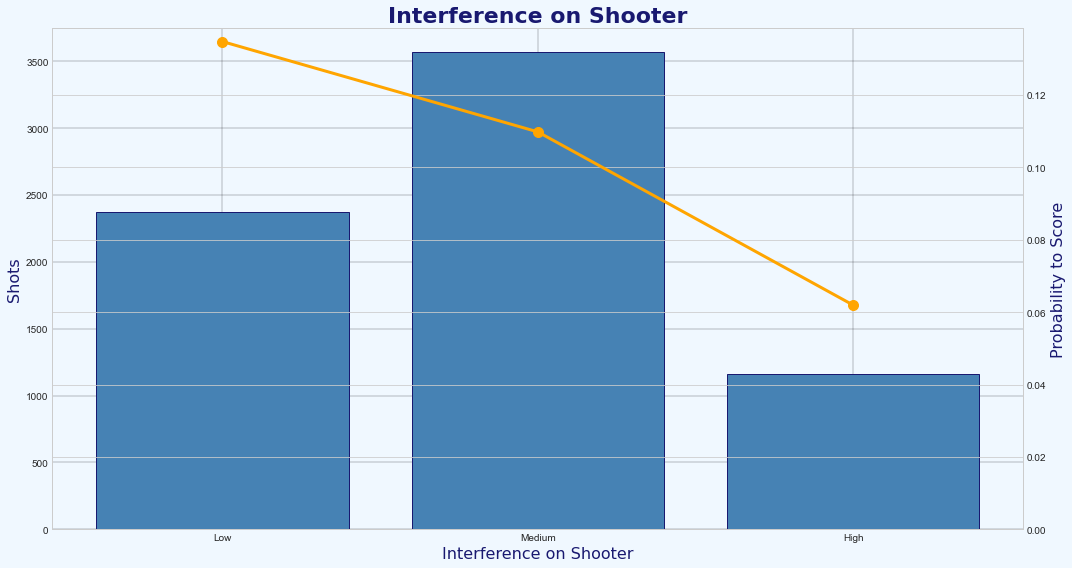

In [114]:
# Visualise the probability of scoring from different angles

## Assign data to be used
df = df_interference_on_shooter
x_axis_bar = df['Interference_on_Shooter']
y_axis_bar = df['shots']
x_axis_line = df['Interference_on_Shooter']
y_axis_line = df['ratio_goals_shots']

## Set background colour
background = 'aliceblue'

## Create figure 
fig, ax = plt.subplots(figsize=(15, 8))
fig.set_facecolor(background)

## Set Gridlines 
ax.grid(linewidth=0.25, color='k', zorder=1)

## Create Bar Chart
ax.bar(x_axis_bar,
       y_axis_bar,     
       edgecolor='midnightblue',
       color='steelblue'
      )

## Custom x-axis labels
#x_labels = ['High', 'Medim']
#ax.set_xticklabels(x_labels)

## Set subplot face colour
ax.patch.set_facecolor(background)

## Twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

## Create Line Chart
ax2.plot(x_axis_line,
         y_axis_line,
         color='orange',
         linewidth='3',
         marker='o',
         markersize='10',
         label='Goals to Shots Ratio'
        )

## Axis
#plt.xlim(('0-5', '85-90'))
plt.ylim((0))

## Set title
ax.set_title('Interference on Shooter',
             loc='center',
             color='midnightblue', 
             fontweight='bold',
             fontfamily='DejaVu Sans',
             fontsize=22,
            )

## Set Gridlines 
ax.grid(linewidth=0.25, color='k', zorder=1)

## X and Y Labels
ax.set_xlabel('Interference on Shooter', color='midnightblue', fontfamily='DejaVu Sans', fontsize=16)
ax.set_ylabel('Shots', color='midnightblue', fontfamily='DejaVu Sans', fontsize=16)
ax2.set_ylabel('Probability to Score', color='midnightblue', fontfamily='DejaVu Sans', fontsize=16)

## Show Legend
#plt.legend()

## Save figure
if not os.path.exists(fig_shots_dir + '/op_shots_monoticity_interference_on_shooter.png'):
    plt.savefig(fig_shots_dir + '/op_shots_monoticity_interference_on_shooter.png', bbox_inches='tight', dpi=300)
else:
    pass

## Show figure
plt.tight_layout()
plt.show()

`Interference_on_Shooter` is in fact monotoic, the lower the level of interference on the shooter, the higher the probability that they are to score from the shot.

There is a 13.5% chance of a shot being scored under Low interference, dropping to 11.0% with Medium interference, and 6.20% with High interference.

Next stage is to use the features that are monotonic in the latest model and see if there is improve performance.

### <a id='#section8.8'>8.8. Model Performance</a>
First start by quickly writing a small function that does all of the transformation steps defined above to both the training and test sets.

In [115]:
def transformation_univariate(df):
    """
    Function performs all transformation steps defined in the section *Univariate analysis - Part A*
    """
    
    df = df.copy()
    
    # Drop 'BodyPart' == 'Unknown'
    df = df[df['BodyPart'] != 'Other']
    
    # Drop 'Interference_on_Shooter' == 'Unknown'
    df = df[df['Interference_on_Shooter'] != 'Unknown']
    
    # Compute the distance to the center - distance_to_centerM
    df['distance_to_centerM'] = np.abs(df['position_yM'])
    
    # Computer whether the shot is taken with the foot or head
    df['isFoot'] = df['BodyPart'].map(dict_isFoot)
    df['isHead'] = df['BodyPart'].map(dict_isHead)

    # One-hot encode the Interference on the Shooter
    
    ## One-hot encoding
    df_dummy_interference_on_shooter = pd.get_dummies(df['Interference_on_Shooter'])
    
    # Attach separate columns back onto the dataset
    df = pd.concat([df, df_dummy_interference_on_shooter], axis=1)
    
    return df

Transform the raw training and test datasets

In [116]:
df_train_trans = transformation_univariate(df_train_raw)
df_test_trans = transformation_univariate(df_test_raw)

Nice, so let's re-train the model and see if the Log Loss has been reduced and also let's see if the AUC increased.

In [117]:
features = ['distance_to_goalM',
            'distance_to_centerM',
            'angle',
            'Number_Intervening_Opponents',
            'Number_Intervening_Teammates',
            'isFoot',   # potential remove this one as deemed non-monotic
            'isHead',   # potential remove this one as deemed non-monotic
            'High',     # 'Interference_on_Shooter'
            'Medium',   # 'Interference_on_Shooter'
            'Low'       # 'Interference_on_Shooter'
           ]

# training of the logistic regression on the train set
reg_uni_a = LogisticRegression(random_state=42)
reg_uni_a.fit(df_train_trans[features], np.array(df_train_trans['isGoal']).ravel())

# prediction on the test set
pred_probs = reg_uni_a.predict_proba(df_test_trans[features])[:,1]
print(f"Log loss on test set after univariate analysis part A: {sk_metrics.log_loss(df_test_trans['isGoal'], pred_probs):.5f}")
print(f"AUC on test set after univariate analysis part A: {sk_metrics.roc_auc_score(df_test_trans['isGoal'], pred_probs)*100:.2f}%")

Log loss on test set after univariate analysis part A: 0.28979
AUC on test set after univariate analysis part A: 80.74%


The Log Loss was reduced from 0.3291 to 0.2851; this is a decrease increase by ~12.1%.

As previous mentioned in the Metric section, AUC is not the ultimate measure, but it's good to see the value increase to 81.24%.

---

## <a id='#section9'>9. Feature Engineering</a>
At this current point in the analysis, with the data available and through conducting both outlier removal and univariate analysis, the following features are now available in the dataset:
*    `position_xM`;
*    `position_yM`;
*    `distance_to_goalM`;
*    `distance_to_centerM`;
*    `angle`;
*    `isFoot` (not currently used in Logistic Regression modelling as the relationship was non-monotonic);
*    `isHead` (not used in Logistic Regression modelling);
*    `Low` (Interference_on_Shooter);
*    `Medium` (Interference_on_Shooter); and
*    `High` (Interference_on_Shooter);

As well as the label, `isGoal`.

From the analysis in the previous section, I now deem that there are currently no more features that can be engineered from the current dataset. However, I'll briefly include some information about the types of features that I would like include, if a full Event dataset was to be made available. There features include:
*    `isStrongFoot`;
*    `isCounterAttack`;
*    `isSmartPass`;
*    `isShotBefore`;
*    `isFromCross`;
*    `isFromCorner`; and
*    `isFromDirectFK`.

### <a id='#section9.1'>9.1. Features to Add</a>

In [119]:
df_train_feats = df_train_trans
df_test_feats = df_test_trans 

#### `attacking_side_of_field`

In [120]:
def add_feature_attacking_side_of_field(df):
    df['attacking_side_of_field'] = np.where((df['position_xM'] <= (pitch_length_x / 2)), 1, 0)
    return df

In [121]:
df_train_feats = add_feature_attacking_side_of_field(df_train_feats)
df_test_feats = add_feature_attacking_side_of_field(df_test_feats)

As all goals are scored in the defending team's half, I will not include this feature in the Logistic Regression model.

#### `is_front_of_goal`

In [122]:
df_train_feats['is_front_of_goal'] = np.where((df_train_feats['distance_to_goalM'] <= 5) & (df_train_feats['angle'] <= 5), 1, 0)
df_test_feats['is_front_of_goal'] = np.where((df_test_feats['distance_to_goalM'] <= 5) & (df_test_feats['angle'] <= 5), 1, 0)

In [123]:
# Body Part types used for shots  and their frequency

## Group and Aggregate data
df_in_front_goal = (df_train_feats.groupby('is_front_of_goal')
                                  .agg({'match_minute': 'count',
                                        'isGoal': 'sum'
                                       }
                                      )
                                  .reset_index()
                                  .rename(columns={'match_minute': 'shots',
                                                   'isGoal': 'goals'
                                                  }
                                         )
                                  .sort_values(by='is_front_of_goal', ascending=True)
                   )

## Create 'ratio_Goals_shots' attribute
df_in_front_goal['ratio_goals_shots'] = df_in_front_goal['goals'] / df_in_front_goal['shots']

## Display DataFrame
df_in_front_goal

,is_front_of_goal,shots,goals,ratio_goals_shots
0,0,7098,781,0.110031
1,1,7,3,0.428571


As the number of goals to shots is not near 100%, I will not include this feature in the Logistic Regression model.

#### `header_distance_to_goal`
The feature `header_distance_to_goal` is an example of create new features out of existing ones by combining two or more features - `isHead` and `distance_to_goalM`. 

In [124]:
df_train_feats['isHead'] = df_train_feats['BodyPart'].map(dict_isHead)
df_test_feats['isHead'] = df_test_feats['BodyPart'].map(dict_isHead)

df_train_feats['header_distance_to_goalM'] = df_train_feats['isHead'] * df_train_feats['distance_to_goalM']
df_test_feats['header_distance_to_goalM'] = df_test_feats['isHead'] * df_test_feats['distance_to_goalM']

In [125]:
# Create DataFrame to determine probability of scoring from bucketed distances

## Define DataFrame
df = df_train_feats

## Define bins
bins = [0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50,52,54,56,58,60,62,64,68]
df['header_distance_to_goalM_binned'] = pd.cut(df['header_distance_to_goalM'], bins)

## Create ID attribute
df['idx'] = range(1, len(df) + 1)

## Group and Aggregate data
df_grouped = (df.groupby('header_distance_to_goalM_binned')
                .agg({'idx': 'count',
                      'isGoal': 'sum'
                     }
                    )
                .reset_index()
                .rename(columns={'idx': 'shots',
                                 'isGoal': 'goals'
                                }
                       )
                .sort_values(by='header_distance_to_goalM_binned', ascending=True)
             )

## Clean binned attribute
df_grouped['header_distance_to_goalM_binned'] = df_grouped['header_distance_to_goalM_binned'].astype(str).str.replace('(', '').str.replace(']', '').str.replace(', ', '-')

## Create 'ratio_Goals_shots' attribute
df_grouped['ratio_goals_shots'] = df_grouped['goals'] / df_grouped['shots']

## Assign final DataFrame to specific DataFrame
df_header_distance_to_goalM = df_grouped

## Display DataFrame
df_header_distance_to_goalM

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.


,header_distance_to_goalM_binned,shots,goals,ratio_goals_shots
0,0-2,0,0,NaN
1,2-4,45,24,0.533333
2,4-6,100,31,0.310000
3,6-8,240,29,0.120833
4,8-10,405,37,0.091358
5,10-12,237,16,0.067511
6,12-14,161,3,0.018634
7,14-16,63,2,0.031746
8,16-18,10,1,0.100000
9,18-20,3,0,0.000000


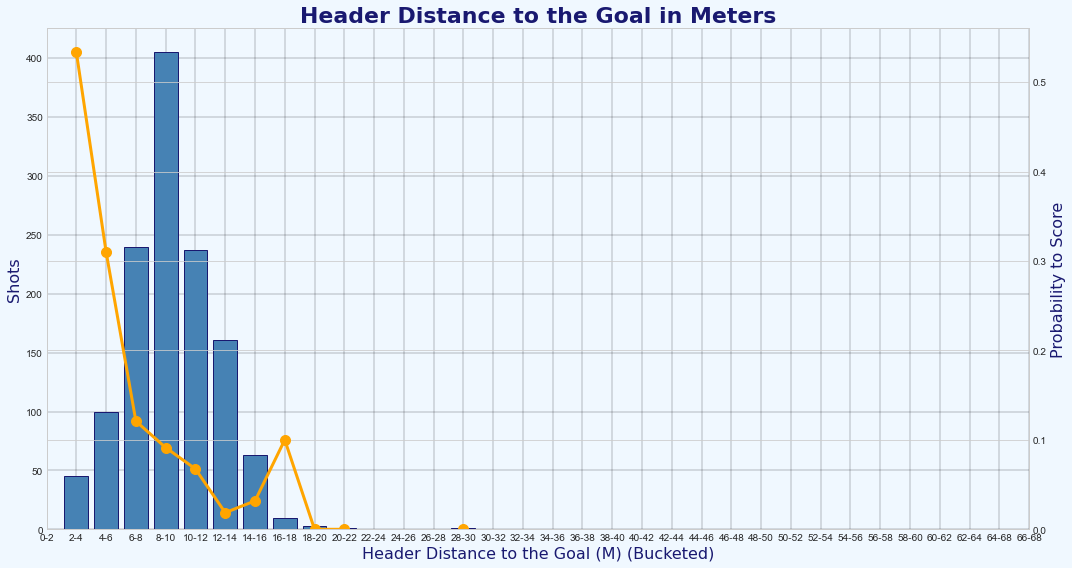

In [126]:
# Visualise the probability of scoring from different points

## Assign data to be used
df = df_header_distance_to_goalM
x_axis_bar = df['header_distance_to_goalM_binned']
y_axis_bar = df['shots']
x_axis_line = df['header_distance_to_goalM_binned']
y_axis_line = df['ratio_goals_shots']

## Set background colour
background = 'aliceblue'

## Create figure 
fig, ax = plt.subplots(figsize=(15, 8))
fig.set_facecolor(background)

## Set Gridlines 
ax.grid(linewidth=0.25, color='k', zorder=1)

## Create Bar Chart
ax.bar(x_axis_bar,
       y_axis_bar,
       edgecolor='midnightblue',
       color='steelblue'
      )


## Set subplot face colour
ax.patch.set_facecolor(background)

## Twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

## Create Line Chart
ax2.plot(x_axis_line,
         y_axis_line,
         color='orange',
         linewidth='3',
         marker='o',
         markersize='10',
         label='Goals to Shots Ratio'
        )

## Axis
plt.xlim(('0-2', '66-68'))
plt.ylim((0))

## Set title
ax.set_title('Header Distance to the Goal in Meters',
             loc='center',
             color='midnightblue', 
             fontweight='bold',
             fontfamily='DejaVu Sans',
             fontsize=22,
            )

## Set Gridlines 
ax.grid(linewidth=0.25, color='k', zorder=1)

## X and Y Labels
ax.set_xlabel('Header Distance to the Goal (M) (Bucketed)', color='midnightblue', fontfamily='DejaVu Sans', fontsize=16)
ax.set_ylabel('Shots', color='midnightblue', fontfamily='DejaVu Sans', fontsize=16)
ax2.set_ylabel('Probability to Score', color='midnightblue', fontfamily='DejaVu Sans', fontsize=16)

## Show Legend
#plt.legend()

## Save figure
if not os.path.exists(fig_shots_dir + '/op_shots_monoticity_header_distance_to_goalM.png'):
    plt.savefig(fig_shots_dir + '/op_shots_monoticity_header_distance_to_goalM.png', bbox_inches='tight', dpi=300)
else:
    pass

## Show figure
plt.tight_layout()
plt.show()

The probability of scoring decreases as the heading distance decreases. This observed monotonic behaviour of the feature make it good for use in the Logistic Regression model.

### <a id='#section9.2'>9.2. 'Wishlist' Features</a>
The data provided is not a full set of Event data, that includes all on-the-ball actions on the pitch, only the shots. For this reason, we are not able to add all the features that can be found in some of the more sophisticated Expeceted Goals models. However, below I have listed some of the features I would add, if such data was available.

#### Strong and Weak Foot
The dataset provided does not include a feature that explicitly mentions the player in question's preferred foot, therefore, we are unable to determine features such as whether the goal was scored with their strongest foot.

This knowledge of preferred foot can be gathered from player bio data, or, it is also possible to determine this with a full set of Event data, analysing how many actions were done per foot in a match, per player, and assigning the most used foot as the preferred foot. From the data, we can then compare that player's preferred foot to the foot with which each shot was taken and determine whether it was taken with their strongest foot, using a Boolean `isStrongFoot` attribute, and also a `isWeakFoot` attribute.

Unfortunately, as the full set of Event data was not provided for this task, this is not an attribute that can be included on this occasion.

#### Counter Attack
Potential to try and create a an `isCounterAttack` attribute with Event and/or Tracking data, using the position on the pitch from which a ball was won and the number of opposing defenders behind the ball, relative to the attack team. This is data that can be found in [StatsBomb](https://statsbomb.com/)'s latest 360 release [[link](https://statsbomb.com/2021/02/statsbomb-360-and-evolve/)], or deriven from Tracking data. This also ties into existing metrics such as [Impect](https://www.impect.com/en/about-us)'s 'Packing' metric [[link](https://www.youtube.com/watch?v=fk8yAQU9U1E&ab_channel=IMPECT)].

Unfortunately, as the full set of Event data was not provided for this task and the only data we have is `Number_Intervening_Opponents`, `Number_Intervening_Teammates`, and the x-position of the shot, this is not an attribute that can be included on this occasion.

#### Smart Pass
How do we classify a Smart Pass? A Smart Pass can be identified as a pass that breaks through opposition lines or cuts a number of players out of play, such as how the [Impect](https://www.impect.com/en/about-us)'s 'Packing' metric [[link](https://www.youtube.com/watch?v=fk8yAQU9U1E&ab_channel=IMPECT)] calculates moments in play.

#### Shot Before
Knowing whether there was a shot taken before a shot of interest can determine whether the goalkeeper is out of position and making a reflex save, with the subsequent shot being in a state different to that of a normal shot in that position.

This feature can be derived by looking at the event before the shot, and seeing if the event type is a shot along with the number of second before that the shot took place.

Unforunately, this is not possible with the current data due to the lack of availablity for a match ID attribute. The time is available.

#### From Corner
This feature can be derived by looking at the event before the shot, and seeing if the event type is a corner.

#### From Cross
This feature can be derived by looking at the event before the shot, and seeing if the event type is from a cross.

---

## <a id='#section10'>10. Multivariate Analysis</a>
Currently only analysed each feature one at a time, only cared about one variable at a time but did not really look at all the features together. This is what we want to do in this section.

Multivariate analysis is all about finding highly correlated features and thinking about how to deal with them. This needs to be done for two reasons:
1.    Highly correlated features might lead to overfitting and actually worsen your results; and
2.    Highly correlated features can very easily mess with the feature interpretation and importance

First, let's get started by calculating the correlations between the features and create a correlation matrix.

In [127]:
def add_feature_engineering_features(df):
    df['header_distance_to_goalM'] = df['isHead'] * df['distance_to_goalM']
    df['header_distance_to_goalM'] = df['isHead'] * df['distance_to_goalM']
    return df

df_train_trans = add_feature_engineering_features(df_train_trans)
df_test_trans = add_feature_engineering_features(df_test_trans)

In [128]:
## Define features
features = ['distance_to_goalM',
            'distance_to_centerM',
            'angle',
            'Number_Intervening_Opponents',
            'Number_Intervening_Teammates',
            'isFoot',   # non-monotic
            'isHead',   # non-monotic
            'High',
            'Medium',
            'Low',
            'header_distance_to_goalM'
           ]


df_corr = df_train_trans[features].corr()

## Display DataFrame
df_corr 

,distance_to_goalM,distance_to_centerM,angle,Number_Intervening_Opponents,Number_Intervening_Teammates,isFoot,isHead,High,Medium,Low,header_distance_to_goalM
distance_to_goalM,1.000000,0.440262,-0.158820,0.391524,0.234769,0.449856,-0.449856,-0.191233,0.030754,0.117352,-0.349948
distance_to_centerM,0.440262,1.000000,0.718883,0.069425,-0.011260,0.307056,-0.307056,-0.093283,0.055995,0.013790,-0.245410
angle,-0.158820,0.718883,1.000000,-0.190035,-0.156256,0.075535,-0.075535,0.018700,0.018582,-0.034361,-0.068188
Number_Intervening_Opponents,0.391524,0.069425,-0.190035,1.000000,0.581021,0.095291,-0.095291,0.015382,-0.007902,-0.003685,-0.056842
Number_Intervening_Teammates,0.234769,-0.011260,-0.156256,0.581021,1.000000,0.046832,-0.046832,-0.065475,-0.050885,0.105280,-0.033892
isFoot,0.449856,0.307056,0.075535,0.095291,0.046832,1.000000,-1.000000,-0.136976,0.022387,0.083677,-0.929661
isHead,-0.449856,-0.307056,-0.075535,-0.095291,-0.046832,-1.000000,1.000000,0.136976,-0.022387,-0.083677,0.929661
High,-0.191233,-0.093283,0.018700,0.015382,-0.065475,-0.136976,0.136976,1.000000,-0.444240,-0.313231,0.129786
Medium,0.030754,0.055995,0.018582,-0.007902,-0.050885,0.022387,-0.022387,-0.444240,1.000000,-0.711674,-0.016841
Low,0.117352,0.013790,-0.034361,-0.003685,0.105280,0.083677,-0.083677,-0.313231,-0.711674,1.000000,-0.083917


Let's plot as a heatmap.

<AxesSubplot:>

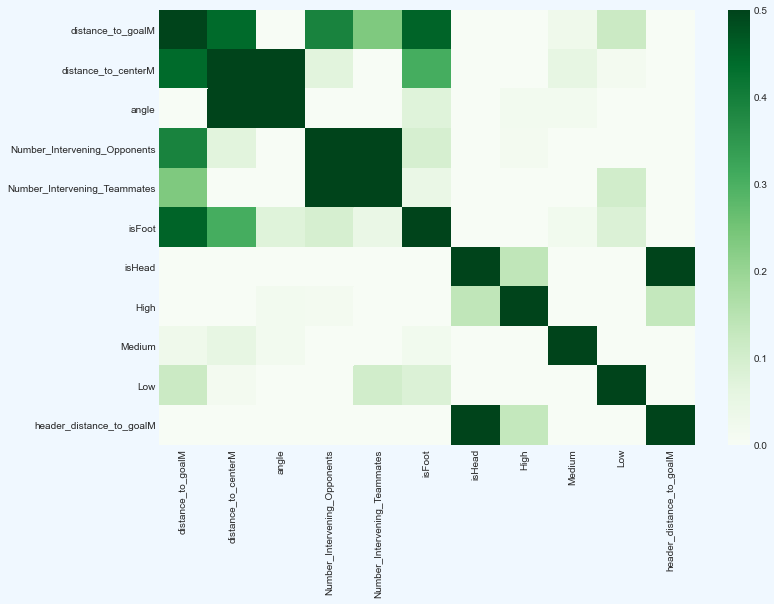

In [129]:
## Assign data to be used
df = df_corr 

## Create figure 
fig, ax = plt.subplots(figsize=(12, 8))
fig.set_facecolor(background)

## Seaborn heat map
sns.heatmap(df , 
            xticklabels=df.columns,
            yticklabels=df.columns,
            cmap='Greens',
            vmin=0,
            vmax=0.5
           )

The Heat Map matrix is easier to process than the correlation matrix. The points to look at are the dark green points points in the heatmap, which represent the combinations with high correlation. Generally, correlations greater than 0.5, should be addressed.

The features with a correlation >= 50% are:
*    `angle` and `distance_to_centerM`;
*    `isHead` and `header_distance_to_goalM`; and
*    `Number_Intervening_Opponents` and `Number_Intervening_Teammates`.

This is not suprising as `angle` and `distance_to_centerM` are features that are derived directly from the x and y position of the player relative to the goal.

`Number_Intervening_Opponents` and `Number_Intervening_Teammates` are features that were provided in the raw dataset, and will therefore be left untouched.

Other features with relatively high correlations are:
*    `distance_to_goalM` and `distance_to_centerM`; and
*    `Number_Intervening_Opponents` and `distance`.

When dummy encoding a categorical column, you should always delete one of the created columns. A good rule of thumb is to go with the column of the value that is most common, as this will have the biggest correlation to the other columns. In our dataset, we need to remove the `Infererence_on_the_Shooter` is equal to Medium.

Let's see how this matrix looks with these features removed from the matrix.

In [130]:
## Define features
features = ['distance_to_goalM',
           #'distance_to_centerM',    # commented out as elected to go with 'angle' instead
            'angle',
            'Number_Intervening_Opponents',
            'Number_Intervening_Teammates',
            'isFoot',
           #'isHead',    # commented out as elected to go with 'header_distance_to_goalM' instead
            'High',
           #'Medium',    # commented out as this is one of three dummy-encoded categorical columns and the one that is most occuring
            'Low',
            'header_distance_to_goalM'
           ]

df_corr_revised = df_train_trans[features].corr()

## Display DataFrame
df_corr_revised 

,distance_to_goalM,angle,Number_Intervening_Opponents,Number_Intervening_Teammates,isFoot,High,Low,header_distance_to_goalM
distance_to_goalM,1.000000,-0.158820,0.391524,0.234769,0.449856,-0.191233,0.117352,-0.349948
angle,-0.158820,1.000000,-0.190035,-0.156256,0.075535,0.018700,-0.034361,-0.068188
Number_Intervening_Opponents,0.391524,-0.190035,1.000000,0.581021,0.095291,0.015382,-0.003685,-0.056842
Number_Intervening_Teammates,0.234769,-0.156256,0.581021,1.000000,0.046832,-0.065475,0.105280,-0.033892
isFoot,0.449856,0.075535,0.095291,0.046832,1.000000,-0.136976,0.083677,-0.929661
High,-0.191233,0.018700,0.015382,-0.065475,-0.136976,1.000000,-0.313231,0.129786
Low,0.117352,-0.034361,-0.003685,0.105280,0.083677,-0.313231,1.000000,-0.083917
header_distance_to_goalM,-0.349948,-0.068188,-0.056842,-0.033892,-0.929661,0.129786,-0.083917,1.000000


<AxesSubplot:>

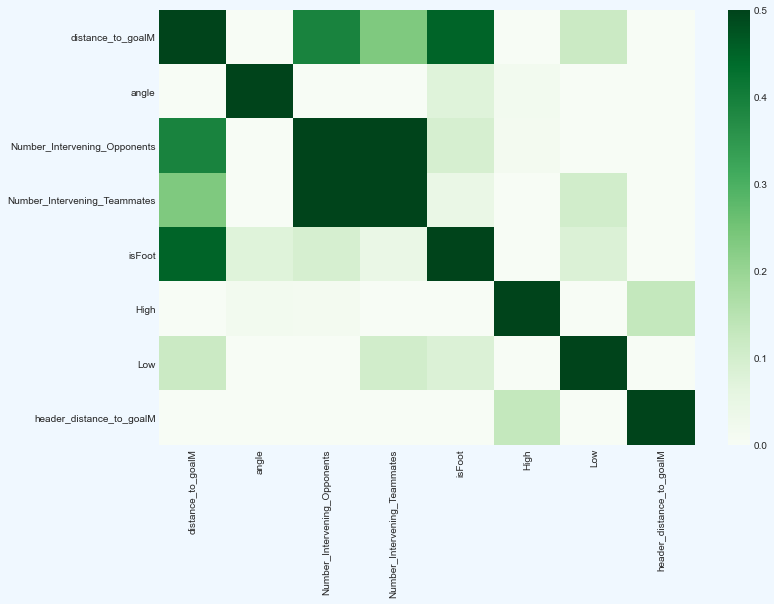

In [131]:
## Assign data to be used
df = df_corr_revised 

## Create figure 
fig, ax = plt.subplots(figsize=(12, 8))
fig.set_facecolor(background)

## Heat map
sns.heatmap(df , 
            xticklabels=df.columns,
            yticklabels=df.columns,
            cmap='Greens',
            vmin=0,
            vmax=0.5
           )

All correlations except for `Number_Intervening_Opponents` and `Number_Intervening_Teammates` are now below 0.5, so we are done with the eliminating correlated features. Now to check that now there is less features, is there a performance drop.

In [132]:
# 
features = ['distance_to_goalM',
           #'distance_to_centerM',    # commented out as elected to go with 'angle' instead
            'angle',
            'Number_Intervening_Opponents',
            'Number_Intervening_Teammates',
            'isFoot',
           #'isHead',    # commented out as elected to go with 'header_distance_to_goalM' instead
            'High',
           #'Medium',    # commented out as this is one of three dummy-encoded categorical columns and the one that is most occuring
            'Low',
            'header_distance_to_goalM'
           ]

# training of the logistic regression on the train set
reg_multi = LogisticRegression(random_state=42)
reg_multi.fit(df_train_trans[features], np.array(df_train['isGoal']).ravel())

# prediction on the test set
pred_probs = reg_multi.predict_proba(df_test_trans[features])[:,1]
print(f"Log loss on test set after interaction term: {sk_metrics.log_loss(df_test_trans['isGoal'], pred_probs):.5f}")
print(f"AUC on test set after after interaction term: {sk_metrics.roc_auc_score(df_test_trans['isGoal'], pred_probs)*100:.2f}%")

Log loss on test set after interaction term: 0.28892
AUC on test set after after interaction term: 80.72%


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Columns were deleted but both the Log Loss was reduced and the AUC increased.

---

## <a id='#section11'>11. Final Model and Evaluation</a>

##### Standard scaling
The final step of the model is to tweak it slightly so that we can interpret the influence of the variables in an easier way

The step that we need to do, is to make different variables "live" on the same scale. We can achieve that by normalizing for mean and standard deviation. You see, what we currently have is that
- `distance_to_goalM` can be any value between 0 and 106;
- `angle` can be an value between 0 and 90;
- `Number_Intervening_Opponents` can be any value between 0 and 11;
- `Number_Intervening_Teammates` can be any value between 0 and 11;
- `isFoot` can be any value between 0 and 1;
- `High` can be any value between 0 and 1; and
- `Low` can be any value between 0 and 1.

This makes it very hard to compare different variables and also for the model to optimise. We are therefore making sure that all of the features take values on a comparable scale. 

<b>Important: All scaling needs to be done only looking at the training dataset!</b>

In [133]:
def transformation_features(df):
    """
    Function performs all transformation steps defined in the section *Univariate analysis - Part A*
    """
    
    df = df.copy()
    
    # Drop 'BodyPart' == 'Unknown'
    df = df[df['BodyPart'] != 'Other']
    
    # Drop 'Interference_on_Shooter' == 'Unknown'
    df = df[df['Interference_on_Shooter'] != 'Unknown']
    
    # Compute the distance to the center - distance_to_centerM
    df['distance_to_centerM'] = np.abs(df['position_yM'])
    
    # Compute whether the shot is taken with the foot or head
    df['isFoot'] = df['BodyPart'].map(dict_isFoot)
    df['isHead'] = df['BodyPart'].map(dict_isHead)
    
    # Compute header distance to goal
    df['header_distance_to_goalM'] = df['isHead'] * df['distance_to_goalM']

    # One-hot encode the Interference on the Shooter
    
    ## One-hot encoding
    df_dummy_interference_on_shooter = pd.get_dummies(df['Interference_on_Shooter'])
    
    # Attach separate columns back onto the dataset
    df = pd.concat([df, df_dummy_interference_on_shooter], axis=1)
    
    return df

In [134]:
# copy the features in a new data frame
feat_train = df_train.copy()
feat_test = df_test.copy()

# 
feat_train = transformation_features(feat_train)
feat_test = transformation_features(feat_test)

# Same features as before
features = ['distance_to_goalM',
            'angle',
            'Number_Intervening_Opponents',
            'Number_Intervening_Teammates',
            'isFoot',
            'High',
            'Low',
            'header_distance_to_goalM']

# copy the features in a new DataFrame
feat_train = feat_train[features]
feat_test = feat_test[features]

feature_measures = dict()

# normalize the features - make sure you take the mean and standard deviation both from the training dataset! 
for feat in features:
    
    mean_feat = feat_train[feat].mean()
    std_feat = feat_train[feat].std()
    
    # save the mean and standard deviation for later usage
    feature_measures[feat] = {"mean": mean_feat, "std": std_feat}
    
    feat_train[feat] = (feat_train[feat] - mean_feat) / std_feat
    feat_test[feat] = (feat_test[feat] - mean_feat) / std_feat

# training of the logistic regression on the train set
reg_final = LogisticRegression(random_state=42)
reg_final.fit(feat_train, np.array(df_train['isGoal']).ravel())

# Prediction on the test set
pred_probs = reg_final.predict_proba(feat_test)[:,1]
print(f"Log loss on test set: {sk_metrics.log_loss(df_test['isGoal'], pred_probs):.5f}")
print(f"AUC on test set: {sk_metrics.roc_auc_score(df_test['isGoal'], pred_probs)*100:.2f}%")

# Save the predictions in the training and test set
df_train["prediction"] = reg_final.predict_proba(feat_train)[:,1]
df_train["overprediction"] = df_train["prediction"] - df_train['isGoal']

df_test["prediction"] = pred_probs
df_test["overprediction"] = df_test["prediction"] - df_test['isGoal']

Log loss on test set: 0.28924
AUC on test set: 80.61%


The Log Loss is the same as before.

#### Save final model
Save final model to be exported and applied to the Metrica Sports data.

In [135]:
# Save the model
pickle.dump(reg_final, open(os.path.join(models_dir_shots, 'final_chance_quality_model_lr.sav'), 'wb'))

#### Save final dataset
Export the final dataset to be used for further analysis and modeling, including XGBoost algorithms.

In [179]:
# Define function to transform the sample dataset into the 
def transformation_metrica_test_train(df):
    """
    Function performs all transformation steps applied during this analysis to the DataFrame selected
    """
    
    df = df.copy()
    
    # Drop 'BodyPart' == 'Unknown'
    df = df[df['BodyPart'] != 'Other']
    
    # Drop 'Interference_on_Shooter' == 'Unknown'
    df = df[df['Interference_on_Shooter'] != 'Unknown']
    
    # Compute the distance to the center - distance_to_centerM
    df['distance_to_centerM'] = np.abs(df['position_yM'])
    
    # Computer whether the shot is taken with the foot or head
    df['isFoot'] = df['BodyPart'].map(dict_isFoot)
    df['isHead'] = df['BodyPart'].map(dict_isHead)

    # Compute header distance to goal
    df['header_distance_to_goalM'] = df['isHead'] * df['distance_to_goalM']
    
    # One-hot encode the Interference on the Shooter
    
    ## One-hot encoding
    df_dummy_interference_on_shooter = pd.get_dummies(df['Interference_on_Shooter'])
    
    # Attach separate columns back onto the dataset
    df = pd.concat([df, df_dummy_interference_on_shooter], axis=1)
    
    return df

In [189]:
# Apply the 
df_train_exp = transformation_metrica_test_train(df_train_raw)
df_test_exp = transformation_metrica_test_train(df_test_raw)

In [190]:
df_train_exp.shape

(7105, 30)

In [191]:
df_test.shape

(3060, 30)

In [192]:
# Concate the 
df_complete = pd.concat([df_train_exp, df_test])

In [194]:
df_complete.shape

(10165, 30)

In [195]:
# Export the final datasets, including the separate train and test sets
df_train_exp.to_csv(os.path.join(data_dir_shots, 'engineered', 'train_shots_engineered.csv'), index=None, header=True)
df_test_exp.to_csv(os.path.join(data_dir_shots, 'engineered', 'test_shots_engineered.csv'), index=None, header=True)
df_complete.to_csv(os.path.join(data_dir_shots, 'engineered', 'complete_shots_engineered.csv'), index=None, header=True)

#### Calibration plot
The reason why this model was created in the first place was to create a Chance Quality Model that calculates the probability of a shot resulting in a goal (i.e. P[goal|shot,situation]) Using this, we can attach a probability to score a goal to each shot.

To optimise the model, the notebook focuses on minimising the Log Loss, but the important thing now is to see if the model predicts the probabilities correctly? This can be done by looking atcalibration plots. The idea behind these plots is the following: You put all of your prediction probabilities in buckets. Let's say bucket 1 are all predictions of 0% - 5%, bucket 2 are all predictions 5% - 10% etc. Then you go ahead and compute for each of the buckets the *observed* scoring likelihood. If the observed likelihood is between those boundaries (i.e. between 0% and 5% for bucket 1) your model is well-calibrated and you are ready to be used.

<b>Important:</b> You should <b>always</b> look at calibration plots when predicting probabilities. While this is most likely no big problem for Logistic Regression, very weird things can happen for almost all other classification models! The nasty part is this: While all models have a *predict_proba* function, for most of the models it does <b>not</b> necessarily return the probability. You can read more about this [here](https://scikit-learn.org/stable/modules/calibration.html).

In [136]:
# Create DataFrame to determine probability of scoring from bucketed distances - to convert this to function

## Define DataFrame
df = df_train

## Define bins
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
df['prediction_binned'] = pd.cut(df['prediction']*100, bins)

## Create ID attribute
df['idx'] = range(1, len(df) + 1)

## Group and Aggregate data
df_grouped = (df.groupby('prediction_binned')
                .agg({'idx': 'count',
                      'isGoal': 'sum'
                     }
                    )
                .reset_index()
                .rename(columns={'idx': 'shots',
                                 'isGoal': 'goals'
                                }
                       )
                .sort_values(by='prediction_binned', ascending=True)
             )

## Clean binned attribute
df_grouped['prediction_binned'] = df_grouped['prediction_binned'].astype(str).str.replace('(', '').str.replace(']', '').str.replace(', ', '-')

## Create 'ratio_Goals_shots' attribute
df_grouped['ratio_goals_shots'] = df_grouped['goals'] / df_grouped['shots']

## Assign final DataFrame to specific DataFrame
df_prediction = df_grouped

## Display DataFrame
df_prediction

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.


,prediction_binned,shots,goals,ratio_goals_shots
0,0-5,3017,84,0.027842
1,5-10,1530,108,0.070588
2,10-15,826,100,0.121065
3,15-20,529,92,0.173913
4,20-25,354,73,0.206215
5,25-30,249,63,0.253012
6,30-35,174,59,0.339080
7,35-40,124,55,0.443548
8,40-45,89,34,0.382022
9,45-50,77,33,0.428571


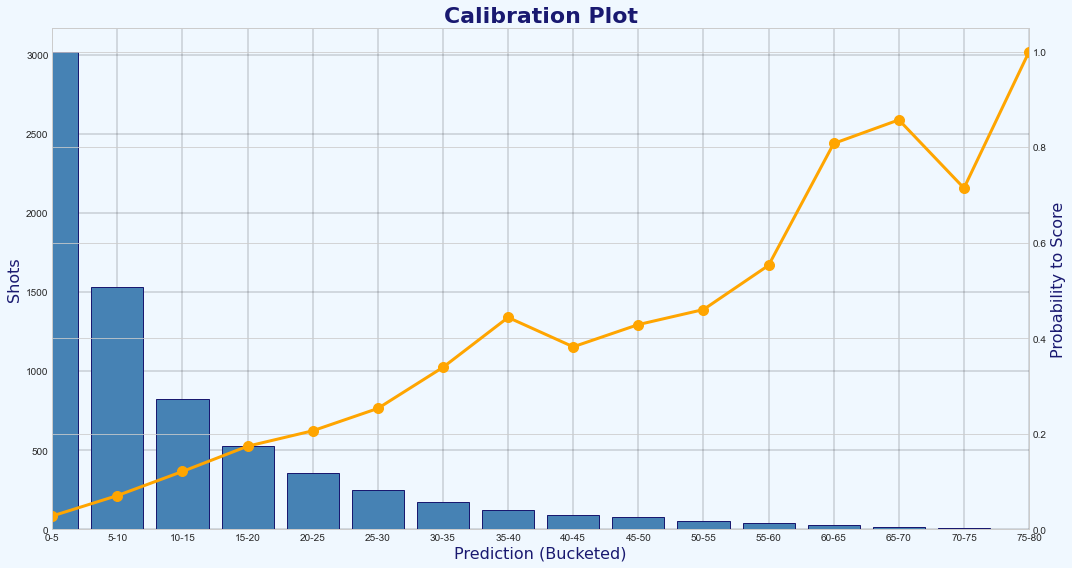

In [137]:
# Visualise the probability of scoring from different angles

## Assign data to be used
df = df_prediction
x_axis_bar = df['prediction_binned']
y_axis_bar = df['shots']
x_axis_line = df['prediction_binned']
y_axis_line = df['ratio_goals_shots']

## Set background colour
background = 'aliceblue'

## Create figure 
fig, ax = plt.subplots(figsize=(15, 8))
fig.set_facecolor(background)

## Set Gridlines 
ax.grid(linewidth=0.25, color='k', zorder=1)

## Create Bar Chart
ax.bar(x_axis_bar,
       y_axis_bar,
       edgecolor='midnightblue',
       color='steelblue'
      )


## Set subplot face colour
ax.patch.set_facecolor(background)

## Twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

## Create Line Chart
ax2.plot(x_axis_line,
         y_axis_line,
         color='orange',
         linewidth='3',
         marker='o',
         markersize='10',
         label='Goals to Shots Ratio'
        )

## Axis
plt.xlim(('0-5', '75-80'))
plt.ylim((0))

## Set title
ax.set_title('Calibration Plot',
             loc='center',
             color='midnightblue', 
             fontweight='bold',
             fontfamily='DejaVu Sans',
             fontsize=22,
            )

## Set Gridlines 
ax.grid(linewidth=0.25, color='k', zorder=1)

## X and Y Labels
ax.set_xlabel('Prediction (Bucketed)', color='midnightblue', fontfamily='DejaVu Sans', fontsize=16)
ax.set_ylabel('Shots', color='midnightblue', fontfamily='DejaVu Sans', fontsize=16)
ax2.set_ylabel('Probability to Score', color='midnightblue', fontfamily='DejaVu Sans', fontsize=16)

## Show Legend
#plt.legend()

## Save figure
if not os.path.exists(fig_shots_dir + '/op_shots_monoticity_prediction.png'):
    plt.savefig(fig_shots_dir + '/op_shots_monoticity_prediction.png', bbox_inches='tight', dpi=300)
else:
    pass

## Show figure
plt.tight_layout()
plt.show()

The plot looks slightly strange for a very high prediction e.g. the probability when predicting a value between 75% and 80% is "only" 71.4% in reality. However, when looking at the blue bars, we notice that we basically do not have any observations there. So let's focus on the more common ones and maybe be a little bit more specific there.

In [138]:
# Create DataFrame to determine probability of scoring from bucketed distances - to convert this to function

## Define DataFrame
df = df_train

## Define bins
bins = [0,5,10,15,20,25,30,35,40]
df['prediction_binned'] = pd.cut(df['prediction']*100, bins)

## Create ID attribute
df['idx'] = range(1, len(df) + 1)

## Group and Aggregate data
df_grouped = (df.groupby('prediction_binned')
                .agg({'idx': 'count',
                      'isGoal': 'sum'
                     }
                    )
                .reset_index()
                .rename(columns={'idx': 'shots',
                                 'isGoal': 'goals'
                                }
                       )
                .sort_values(by='prediction_binned', ascending=True)
             )

## Clean binned attribute
df_grouped['prediction_binned'] = df_grouped['prediction_binned'].astype(str).str.replace('(', '').str.replace(']', '').str.replace(', ', '-')

## Create 'ratio_Goals_shots' attribute
df_grouped['ratio_goals_shots'] = df_grouped['goals'] / df_grouped['shots']

## Assign final DataFrame to specific DataFrame
df_prediction_revised = df_grouped

## Display DataFrame
df_prediction_revised

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.


,prediction_binned,shots,goals,ratio_goals_shots
0,0-5,3017,84,0.027842
1,5-10,1530,108,0.070588
2,10-15,826,100,0.121065
3,15-20,529,92,0.173913
4,20-25,354,73,0.206215
5,25-30,249,63,0.253012
6,30-35,174,59,0.339080
7,35-40,124,55,0.443548


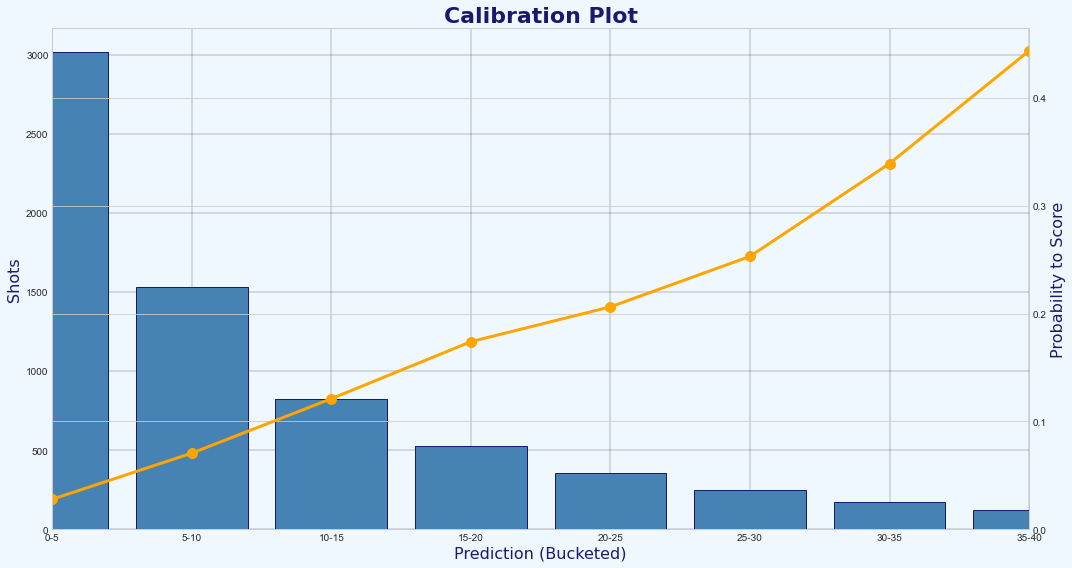

In [139]:
# Visualise the probability of scoring from different angles

## Assign data to be used
df = df_prediction_revised
x_axis_bar = df['prediction_binned']
y_axis_bar = df['shots']
x_axis_line = df['prediction_binned']
y_axis_line = df['ratio_goals_shots']

## Set background colour
background = 'aliceblue'

## Create figure 
fig, ax = plt.subplots(figsize=(15, 8))
fig.set_facecolor(background)

## Set Gridlines 
ax.grid(linewidth=0.25, color='k', zorder=1)

## Create Bar Chart
ax.bar(x_axis_bar,
       y_axis_bar,
       edgecolor='midnightblue',
       color='steelblue'
      )


## Set subplot face colour
ax.patch.set_facecolor(background)

## Twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

## Create Line Chart
ax2.plot(x_axis_line,
         y_axis_line,
         color='orange',
         linewidth='3',
         marker='o',
         markersize='10',
         label='Goals to Shots Ratio'
        )

## Axis
plt.xlim(('0-5', '35-40'))
plt.ylim((0))

## Set title
ax.set_title('Calibration Plot',
             loc='center',
             color='midnightblue', 
             fontweight='bold',
             fontfamily='DejaVu Sans',
             fontsize=22,
            )

## Set Gridlines 
ax.grid(linewidth=0.25, color='k', zorder=1)

## X and Y Labels
ax.set_xlabel('Prediction (Bucketed)', color='midnightblue', fontfamily='DejaVu Sans', fontsize=16)
ax.set_ylabel('Shots', color='midnightblue', fontfamily='DejaVu Sans', fontsize=16)
ax2.set_ylabel('Probability to Score', color='midnightblue', fontfamily='DejaVu Sans', fontsize=16)

## Show Legend
#plt.legend()

## Save figure
if not os.path.exists(fig_shots_dir + '/op_shots_monoticity_prediction_0-40.png'):
    plt.savefig(fig_shots_dir + '/op_shots_monoticity_prediction_0-40.png', bbox_inches='tight', dpi=300)
else:
    pass

## Show figure
plt.tight_layout()
plt.show()

The Calibration Plot says a couple of things about the model:
1.    It is very well calibrated. Every point is within the bucket it should be; and
2.    The range of predictions is quite a broad range, which is good to see. There are shots with probabilities < 4% and there are quite a few of them with probability > 40%

---

## <a id='#section12'>12. Feature Interpretation</a>
Analysing the features is a very important step in the process of model development for at least two reasons:
1.    It allows you to communicate why the model predicted what it predicted;
2.    It is often a cause to trigger change in the actual doing (assume our model identifies that there is a very severe disadvantage when shooting with the weak foot; this might trigger to slightly adjust the training and add more elements of shooting with the weak foot); and
3.    It helps you to sense-check the model results and identify potential bugs.

This section is again split into smaller parts in which we answer different questions

#### Does a variable have a positive or a negative effect on the likelihood to score?
This question is fortunately somehow simple to answer. All you need to do is to look at the signs of the coefficients of our final model. So let's print all of them quickly:

In [140]:
features = ['distance_to_goalM',
           #'distance_to_centerM',
            'angle',
            'Number_Intervening_Opponents',
            'Number_Intervening_Teammates',
            'isFoot',
           #'isHead',
            'High',
           #'Medium',
            'Low',
            'header_distance_to_goalM'
           ]

print("Coefficients")
print("############")
for i, coef in enumerate(reg_final.coef_[0]):
    print(f"{features[i]}: {coef:.3f}")

Coefficients
############
distance_to_goalM: -1.072
angle: -0.220
Number_Intervening_Opponents: -0.512
Number_Intervening_Teammates: 0.048
isFoot: -0.131
High: -0.328
Low: 0.082
header_distance_to_goalM: -0.638


Even though the magnitude of the number might be of some interest as well, let's for now only focus on the sign, i.e. is the coefficient positive or negative: A negative coefficient means that the bigger the value in the feature, the more unlikely the player becomes to score when shooting *given that all other features stay the same*. A positive coefficient, in contrast, says that the bigger the value in the feature, the more likely the player is to score. 

Let's look at `distance_to_goalM`: There we have a negative number, indicating that the bigger the distance to the goal line, the more unlikely it is for a shot to find its way into the net. Makes sense, doesn't it? So does that mean that every shot taken from 15 meters has a lower probability than a shot taken from 12 meters? No, it doesn't, that's what we mean with *given all other features stay the same*. What the negative coefficient says, is, that if I have two shots with the same features, but one from 15 meters and the other from 12 meters, then the one taken from 12 meters had a higher chance to score. That is something you should always keep in mind.

We can now go through some of features and have a look at whether the sign of the coefficient does intuitively make sense:

*    `distance_to_goalM`: as expected, the further the shooter is from the goal, the less likely the chance to score;
*    `distance_to_centerM`: as expected, the further the shooter is from the center of the field, the less likely the chance to score;
*    `angle`: as expected, the further we are from the center of the field the less likely the chance to score;
*    `Number_Intervening_Opponents`: the greater the number of opponent, the less likely the chance to score. This is unexpected;
*    `Number_Intervening_Teammates`: as expected, the greater the number of intervening teammates, the less likely the chance to score;
*    `isFoot`: the use of the foot to shoot reduces the chance to score. This goes against intuition, but is not unexpected as this was observed in the Feature Engineering section;
*    `isHead`: the use of the head to shoot increasesthe chance to score. This goes against intuition, but is not unexpected as this was observed in the Feature Engineering section;
*    `High` (interference): as expected, when the interference on the player is High (multiple defenders in close proximity and interfering with the shot), the less likely the shooter is to score.
*    `Medium` (interference): as expected, when the interference on the player is Medium (a single defender was in close proximity to the shot-taker), the less likely the shooter is to score.
*    `Low` (interference): as expected, when the interference on the player is Low (no or minimal interference), the more likely the shooter is to score.
*    `header_distance_to_goalM`: as expected, the further the shooter is from the goal, the less likely the chance to score. This is already noted in the `distance_to_goalM` features. Again, think of this variable as a multiplier in case of a header. While it is in general bad to be far from the goal, it is especially bad when taking a header.

From this analysis, we now understand all the features and whether they have a positive or negative effect on scoring. 

#### What are the most important features?
Loosely speaking, you can get the importance of a feature by looking at the magnitude of the coefficient. So let's quickly print them again, but now focus on the (absolute) magnitude rather than the sign. Notice: This is only valid after we have done the scaling of the variables!

In [177]:
features = ['distance_to_goalM',
           #'distance_to_centerM',
            'angle',
            'Number_Intervening_Opponents',
            'Number_Intervening_Teammates',
            'isFoot',
           #'isHead',
            'High',
           #'Medium',
            'Low',
            'header_distance_to_goalM'
           ]

print('Coefficients')
print('-'*40)
for i, coef in enumerate(reg_final.coef_[0]):
    print(f'{features[i]}: {coef:.3f}')

Coefficients
----------------------------------------
distance_to_goalM: -1.072
angle: -0.220
Number_Intervening_Opponents: -0.512
Number_Intervening_Teammates: 0.048
isFoot: -0.131
High: -0.328
Low: 0.082
header_distance_to_goalM: -0.638


The biggest (absolute) coefficient belongs to `distance_to_goalM` and `header_distance_to_goalM`, indicating that the distance to the goal line is the most important feature. This inituatively makes sense. The next one is `Number_Intervening_Opponents`, which again, we expect that if there is a lot of opponents between the shooter and the goal, this will have a big affect on the shot. Next is the `high` interference, when multiple defenders are in close proximity and interfering with the shot, the less likely the shooter is to score. The next is `angle` and `distance_to_centerM'` of the shot.

The take home messages from this analysis are:
1. Position on the field is extremely important when shooting;
2. The distance to the goal line is super important, and even more so when taking a header; and
3. The further you are from the center of the field, the more unlikely to score.

These take home messages are more important than presenting a list of coefficients to coaches and football. It's important to take what can be seen in the data and translate it into digestable language.

---

## <a id='#section13'>13. Apply the Trained Chance Quality Model to the Metrica Sports Data</a>
The next stage of this analysis to take the Chance Quality Model derived and apply it to the DataFrame of identified shots from game 2 of the sample Metrica Sports data. to determine which team deserved to win the game, based solely on the quality of chances that each team created.

##### Import Metrica Sports Shots data for game 2

In [142]:
# Read data directory
print(glob.glob(os.path.join(data_dir_metrica, 'engineered/*')))

['../../data/metrica-sports/engineered/game_2_shots.csv', '../../data/metrica-sports/engineered/archive', '../../data/metrica-sports/engineered/game_2_shots_with_xg.csv']


In [143]:
# Read in exported Metrica Sports game 2 shots CSV as a pandas DataFrame
df_metrica = pd.read_csv(os.path.join(data_dir_metrica, 'engineered', 'game_2_shots.csv'))

In [170]:
# Embed video of the 24 shots in game 2 of the Metrica Sports sample data
Video('../../video/fig/metrica-sports/tracking_shots_all.mp4', width=770, height=530)

##### Transform Metrica Sports data to be compatible with trained Chance Quality Model

In [145]:
# Define function to transform both the Chance Quality model and the Metrica Sports data to be compatible with trained Chance Quality Model
def transformation_metrica_test_train(df):
    """
    Function performs all transformation steps defined in the section *Univariate analysis - Part A*
    """
    
    df = df.copy()
    
    # Drop 'BodyPart' == 'Unknown'
    df = df[df['BodyPart'] != 'Other']
    
    # Drop 'Interference_on_Shooter' == 'Unknown'
    df = df[df['Interference_on_Shooter'] != 'Unknown']
    
    # Compute the distance to the center - distance_to_centerM
    df['distance_to_centerM'] = np.abs(df['position_yM'])
    
    # Computer whether the shot is taken with the foot or head
    df['isFoot'] = df['BodyPart'].map(dict_isFoot)
    df['isHead'] = df['BodyPart'].map(dict_isHead)

    # Compute header distance to goal
    df['header_distance_to_goalM'] = df['isHead'] * df['distance_to_goalM']
    
    # One-hot encode the Interference on the Shooter
    
    ## One-hot encoding
    df_dummy_interference_on_shooter = pd.get_dummies(df['Interference_on_Shooter'])
    
    # Attach separate columns back onto the dataset
    df = pd.concat([df, df_dummy_interference_on_shooter], axis=1)
    
    return df

In [146]:
# Transform Test and Train data
df_train_metrica = transformation_metrica_test_train(df_train_raw)
df_test_metrica = transformation_metrica_test_train(df_test_raw)

In [147]:
# Define function to transform both the Chance Quality model and the Metrica Sports data to be compatible with trained Chance Quality Model
def transformation_metrica(df):
    """
    Function performs all transformation steps defined in the section *Univariate analysis - Part A*
    """
    
    df = df.copy()
    
    # Drop 'BodyPart' == 'Unknown'
    df = df[df['BodyPart'] != 'Other']
    
    # Drop 'Interference_on_Shooter' == 'Unknown'
    df = df[df['Interference_on_Shooter'] != 'Unknown']
    
    # Compute the distance to the center - distance_to_centerM
    df['distance_to_centerM'] = np.abs(df['position_yM'])
    
    # Computer whether the shot is taken with the foot or head
    # df['isFoot'] = df['BodyPart'].map(dict_isFoot)
    # df['isHead'] = df['BodyPart'].map(dict_isHead)

    # Compute header distance to goal
    df['header_distance_to_goalM'] = df['isHead'] * df['distance_to_goalM']
    
    # One-hot encode the Interference on the Shooter
    
    ## One-hot encoding
    df_dummy_interference_on_shooter = pd.get_dummies(df['Interference_on_Shooter'])
    
    # Attach separate columns back onto the dataset
    df = pd.concat([df, df_dummy_interference_on_shooter], axis=1)
    
    return df

In [148]:
# Transform Metrica Sports data 
df_metrica_trans = transformation_metrica(df_metrica)

##### Create Metrica Sports Loogistic Regression Model

In [149]:
features = ['distance_to_goalM',
           #'distance_to_centerM',
            'angle',
            'Number_Intervening_Opponents',
            'Number_Intervening_Teammates',
           #'isFoot',   # potential remove this one as deemed non-monotic
           #'isHead',   # potential remove this one as deemed non-monotic
            'High',     # 'Interference_on_Shooter'
           #'Medium',   # 'Interference_on_Shooter'
            'Low',       # 'Interference_on_Shooter'
            'header_distance_to_goalM'
           ]

# Training of the logistic regression on the train set
reg_metrica = LogisticRegression(random_state=42)
reg_metrica.fit(df_train_trans[features], np.array(df_train_trans['isGoal']).ravel())

# Prediction on the test set
pred_probs = reg_metrica.predict_proba(df_test_trans[features])[:,1]
print(f"Log loss on test set after univariate analysis part A: {sk_metrics.log_loss(df_test_trans['isGoal'], pred_probs):.5f}")
print(f"AUC on test set after univariate analysis part A: {sk_metrics.roc_auc_score(df_test_trans['isGoal'], pred_probs)*100:.2f}%")

Log loss on test set after univariate analysis part A: 0.28927
AUC on test set after univariate analysis part A: 80.65%


#### Predictions
There are two types of classification predictions that can be made with the finalised model:
*    class predictions; and
*    probability predictions.

##### Single Class Prediction
Single class predictions predict which category the instant of data belongs to. As even good quality chances are rarely greater than 30-40% likely to be goals, this type of prediction is not much use in this scenario, but has been included below for reference.

In [150]:
xNew = df_metrica_trans[features]

In [151]:
yNew = reg_metrica.predict(xNew)

In [152]:
yNew

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

##### Probability Predictions
Probability predictions determines the probability of each instance belonging to the first and second classes (0 and 1), as a percentage i.e. Expected Goals (xG).

In [153]:
yNew = reg_metrica.predict_proba(xNew)

In [154]:
yNew

array([[0.97693245, 0.02306755],
       [0.76536132, 0.23463868],
       [0.90873082, 0.09126918],
       [0.91664716, 0.08335284],
       [0.9625848 , 0.0374152 ],
       [0.97256807, 0.02743193],
       [0.62142127, 0.37857873],
       [0.94836766, 0.05163234],
       [0.74777911, 0.25222089],
       [0.96686603, 0.03313397],
       [0.96506479, 0.03493521],
       [0.95282819, 0.04717181],
       [0.74854056, 0.25145944],
       [0.94964554, 0.05035446],
       [0.86529378, 0.13470622],
       [0.54958834, 0.45041166],
       [0.85650851, 0.14349149],
       [0.67566623, 0.32433377],
       [0.97202612, 0.02797388],
       [0.94552016, 0.05447984],
       [0.86669185, 0.13330815],
       [0.97960259, 0.02039741],
       [0.9047537 , 0.0952463 ],
       [0.99063446, 0.00936554]])

In [155]:
# Convert the Probability Predictions array to a pandas DataFrame
df_metrica_predictions = pd.DataFrame(yNew, columns = ['prob_no_goal', 'prob_goal'])

In [156]:
df_metrica_predictions.head()

,prob_no_goal,prob_goal
0,0.976932,0.023068
1,0.765361,0.234639
2,0.908731,0.091269
3,0.916647,0.083353
4,0.962585,0.037415


In [157]:
# Join the Probability Predictions back onto the original Metrica shots DataFrame
df_metrica_xg = pd.merge(df_metrica, df_metrica_predictions, left_index=True, right_index=True)

# Display DataFrame
df_metrica_xg.head()

,match_minute,match_second,outcome,position_xM,position_yM,position_xM_r,position_yM_r,distance_to_goalM,angle,distance_to_centerM,isGoal,BodyPart,isFoot,isHead,team,period,start_frame,end_frame,Number_Intervening_Opponents,Number_Intervening_Teammates,Interference_on_Shooter,interference_on_shooter_number_players,subtype,isPenalty,isDirectFK,prob_no_goal,prob_goal
0,2,57,Missed,39.22,18.36,-39.22,-18.36,22.956001,53.110135,18.36,0,Foot,1,0,Home,1,4419,4443,3,0,Medium,1,OFF TARGET-OUT,0,0,0.976932,0.023068
1,8,8,Goal,47.70,-3.40,-47.70,3.40,6.296825,32.680555,3.40,1,Foot,1,0,Home,1,12202,12212,1,0,High,2,ON TARGET-GOAL,0,0,0.765361,0.234639
2,10,59,Saved,41.34,11.56,-41.34,-11.56,16.419172,44.753250,11.56,0,Foot,1,0,Home,1,16484,16499,2,0,Medium,1,ON TARGET-SAVED,0,0,0.908731,0.091269
3,12,21,Blocked,31.80,10.20,-31.80,-10.20,23.526156,25.693700,10.20,0,Foot,1,0,Away,1,18515,18520,1,1,Low,0,BLOCKED,0,0,0.916647,0.083353
4,18,14,Missed,43.46,-6.12,-43.46,6.12,11.334284,32.680555,6.12,0,Head,0,1,Home,1,27345,27360,1,1,High,2,BLOCKED,0,0,0.962585,0.037415


This DataFrame is now ready to be analysed to answer the final question in the data challenge - based solely on the quality of chances that each team created, which team deserved to win the game? 

---

## <a id='#section14'>14. Assessment of the Performance of the Teams in Game 2 of the Metrica Sports Shot Data</a>
To determine which team deserved to win the game based solely on the quality of chances that each team created, a goodway to interpret and visualise this data, is using an <b>xG Race Chart</b>, i.e. an accumlative sum of xG plotted as a line chart over time.

#### Probability of Scoring Race Chart
The code to create the xG Race charts was based on that by [McKay Johns](https://twitter.com/mckayjohns) in his YouTube tutorial: [How To Create xG Flow Charts in Python](https://www.youtube.com/watch?v=bvoOOYMQkac).He has made the code available in his GitHub [[link](https://github.com/mckayjohns/Viz-Templates)].

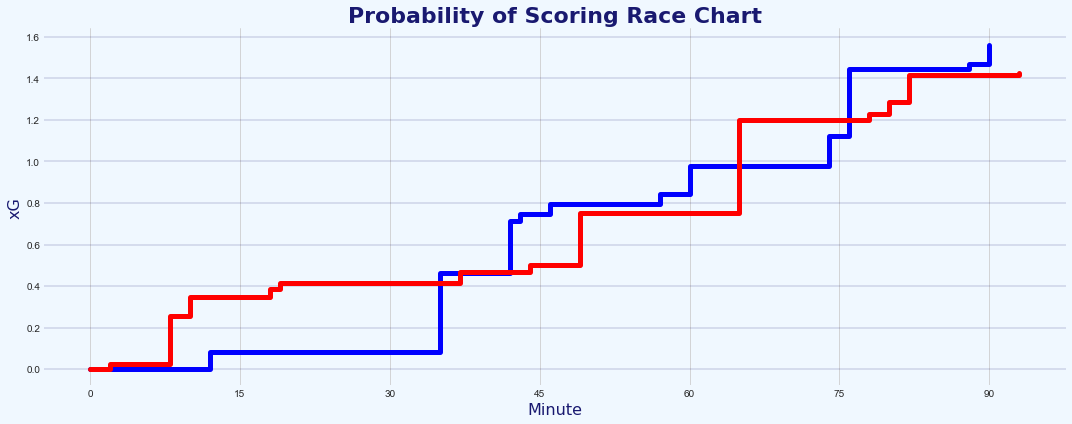

In [158]:
# Create Probability of Scoring Race Chart

## Assign DataFrame
df = df_metrica_xg

## Create four lists to plot the different xG values - home, away, xG, and minutes. We start these with zero so our charts will start at 0
a_xG = [0]
h_xG = [0]
a_min = [0]
h_min = [0]

## Define team names from the DataFrame
hteam = 'Home'
ateam = 'Away'

## For loop to append the xG and minute for both the Home and Away teams
for x in range(len(df['prob_goal'])):
    if df['team'][x]==ateam:
        a_xG.append(df['prob_goal'][x])
        a_min.append(df['match_minute'][x])
    if df['team'][x]==hteam:
        h_xG.append(df['prob_goal'][x])
        h_min.append(df['match_minute'][x])
        
## Function we use to make the xG values be cumulative rather than single shot values. Foes through the list and adds the numbers together
def nums_cumulative_sum(nums_list):
    return [sum(nums_list[:i+1]) for i in range(len(nums_list))]

## Apply defned nums_cumulative_sum function to the home and away xG lists
a_cumulative = nums_cumulative_sum(a_xG)
h_cumulative = nums_cumulative_sum(h_xG)

## Find the total xG. Create a new variable from the last item in the cumulative list
alast = round(a_cumulative[-1],2)
hlast = round(h_cumulative[-1],2)

## Set background colour
background = 'aliceblue'

## Create figure 
fig, ax = plt.subplots(figsize=(15, 6))
fig.set_facecolor(background)
ax.patch.set_facecolor(background)

# Set up our base layer
mpl.rcParams['xtick.color'] = 'midnightblue'
mpl.rcParams['ytick.color'] = 'midnightblue'

## Create xG Race Chart
plt.xticks([0, 15, 30, 45, 60, 75, 90])
plt.xlabel('Minute', fontfamily='DejaVu Sans', color='midnightblue', fontsize=16)
plt.ylabel('xG', fontfamily='DejaVu Sans', color='midnightblue', fontsize=16)

# Plot the step graphs
ax.step(x=a_min, y=a_cumulative, color='blue', label=ateam, linewidth=5, where='post')
ax.step(x=h_min, y=h_cumulative, color='red', label=ateam, linewidth=5, where='post')

## Set Gridlines 
ax.grid(linewidth=0.25, color='midnightblue', axis='y', zorder=1)
spines = ['top','bottom','left','right']
for x in spines:
    if x in spines:
        ax.spines[x].set_visible(False)

## Set title
ax.set_title('Probability of Scoring Race Chart',
             loc='center',
             color='midnightblue', 
             fontweight='bold',
             fontfamily='DejaVu Sans',
             fontsize=22,
            )

## Show Legend
#plt.legend()

## Save figure
if not os.path.exists(fig_shots_dir + '/metrica_shots_race_chart_probability_of_scoring.png'):
    plt.savefig(fig_shots_dir + '/metrica_shots_race_chart_probability_of_scoring.png', bbox_inches='tight', dpi=300)
else:
    pass

## Show figure
plt.tight_layout()
plt.show()

From this first plot, we can see that cumulative xG over the course of the match for each team is almost identical, which is not surprising as from the a glance at the data and upon viewing on the shooting chances videos created in matplotlib, the game appeared to be a very tight one.

However, one thing that has not been considered at this stage is the penalty scored by the away team. Penalties are not accounted for in the current Chance Quality Model that has been derived in this notebook, and therefore this chance should be looked into.

#### Amended xG Race Chart including values for penalty
As was discussed in the Data Engineering section, the shots in this model were filtered for only Open Play shots.

To deal with this, any penalty shots in the Metrica Sports data, will be assigned the value of 0.76 [[link](https://fbref.com/en/expected-goals-model-explained/)]. As per FBref:
> Each penalty kick is worth 0.76 xG since all penalty kicks share the same characteristics. Comparing a player's goals from penalty kicks to their penalty kick xG can indicate a player's penalty kicking ability. Likewise, we can do the same for goalkeepers in these situations.

If this is good enough for StatsBomb and FBref, it is good enough for this model.

Shot 18 (the 2nd goal scored by the Away team) is a penalty. The current model predicts this chance as having a an xG value of 0.326, more than twice that of reknowned xG models.

In [159]:
# Shot 18 - penalty to the away team
Video('../../video/fig/metrica-sports/tracking_shot_115009_1671.mp4', width=770, height=530)

The following code creates a new attribute `xG`, derived from the `prob_goal` attribute, however, where the shot is a penalty, a value of 0.76 is applied.

In [160]:
df_metrica_xg['xG'] = df_metrica_xg['prob_goal']
df_metrica_xg['xG'] = np.where(df_metrica_xg['isPenalty'] == 1, 0.76, df_metrica_xg['xG'])

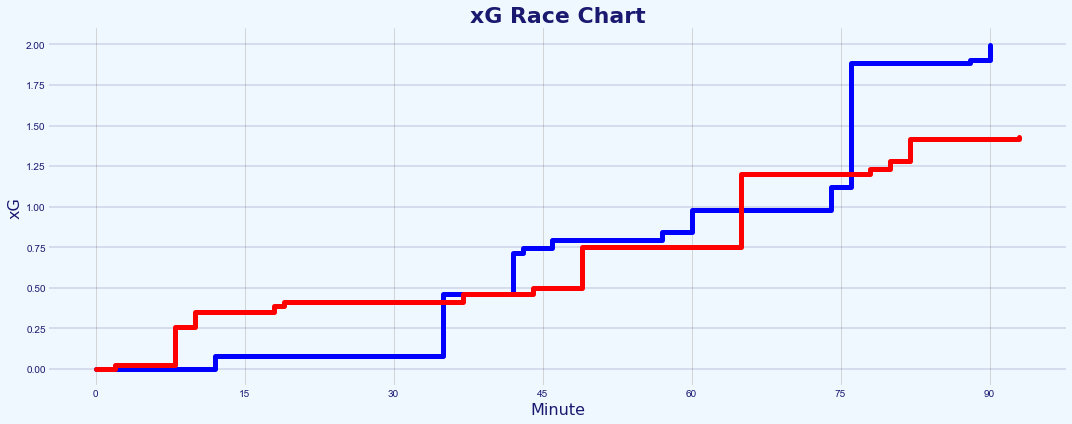

In [161]:
# Create xG Race Chart with revised xG for penalties

## Assign DataFrame
df = df_metrica_xg

## Create four lists to plot the different xG values - home, away, xG, and minutes. We start these with zero so our charts will start at 0
a_xG = [0]
h_xG = [0]
a_min = [0]
h_min = [0]

## Define team names from the DataFrame
hteam = 'Home'
ateam = 'Away'

## For loop to append the xG and minute for both the Home and Away teams
for x in range(len(df['xG'])):
    if df['team'][x]==ateam:
        a_xG.append(df['xG'][x])
        a_min.append(df['match_minute'][x])
    if df['team'][x]==hteam:
        h_xG.append(df['xG'][x])
        h_min.append(df['match_minute'][x])
        
## Function we use to make the xG values be cumulative rather than single shot values. Foes through the list and adds the numbers together
def nums_cumulative_sum(nums_list):
    return [sum(nums_list[:i+1]) for i in range(len(nums_list))]

## Apply defned nums_cumulative_sum function to the home and away xG lists
a_cumulative = nums_cumulative_sum(a_xG)
h_cumulative = nums_cumulative_sum(h_xG)

## Find the total xG. Create a new variable from the last item in the cumulative list
alast = round(a_cumulative[-1],2)
hlast = round(h_cumulative[-1],2)

## Set background colour
background = 'aliceblue'

## Create figure 
fig, ax = plt.subplots(figsize=(15, 6))
fig.set_facecolor(background)
ax.patch.set_facecolor(background)

# Set up our base layer
mpl.rcParams['xtick.color'] = 'midnightblue'
mpl.rcParams['ytick.color'] = 'midnightblue'

## Create xG Race Chart
plt.xticks([0, 15, 30, 45, 60, 75, 90])
plt.xlabel('Minute', fontfamily='DejaVu Sans', color='midnightblue', fontsize=16)
plt.ylabel('xG', fontfamily='DejaVu Sans', color='midnightblue', fontsize=16)

# Plot the step graphs
ax.step(x=a_min, y=a_cumulative, color='blue', label=ateam, linewidth=5, where='post')
ax.step(x=h_min, y=h_cumulative, color='red', label=ateam, linewidth=5, where='post')

## Set Gridlines 
ax.grid(linewidth=0.25, color='midnightblue', axis='y', zorder=1)
spines = ['top','bottom','left','right']
for x in spines:
    if x in spines:
        ax.spines[x].set_visible(False)

## Set title
ax.set_title('xG Race Chart',
             loc='center',
             color='midnightblue', 
             fontweight='bold',
             fontfamily='DejaVu Sans',
             fontsize=22,
            )

## Show Legend
#plt.legend()

## Save figure
if not os.path.exists(fig_shots_dir + '/metrica_shots_race_chart_xg.png'):
    plt.savefig(fig_shots_dir + '/metrica_shots_race_chart_xg.png', bbox_inches='tight', dpi=300)
else:
    pass

## Show figure
plt.tight_layout()
plt.show()

In the revised visualisatio, there is now a much clearer difference between the teams, with the Away team (blue) now predicted as more likely to win the game.

In [162]:
# Export the final dataset
#df_metrica_xg.to_csv(os.path.join(data_dir_metrica, 'engineered', 'game_2_shots_with_xg.csv'), index=None, header=True)

#### Further Analysis

In [163]:
df_metrica_xg.sort_values(by='xG', ascending=False).head(5)

,match_minute,match_second,outcome,position_xM,position_yM,position_xM_r,position_yM_r,distance_to_goalM,angle,distance_to_centerM,isGoal,BodyPart,isFoot,isHead,team,period,start_frame,end_frame,Number_Intervening_Opponents,Number_Intervening_Teammates,Interference_on_Shooter,interference_on_shooter_number_players,subtype,isPenalty,isDirectFK,prob_no_goal,prob_goal,xG
17,76,40,Goal,40.28,1.36,-40.28,-1.36,12.792498,6.102780,1.36,1,Foot,1,0,Away,2,115009,115024,1,0,Low,0,ON TARGET-GOAL,1,0,0.675666,0.324334,0.760000
15,65,55,Saved,48.76,-4.08,-48.76,4.08,5.884216,43.898294,4.08,0,Foot,1,0,Home,2,98880,98896,1,0,Low,0,ON TARGET-SAVED,0,0,0.549588,0.450412,0.450412
6,35,22,Goal,44.52,2.72,-44.52,-2.72,8.905549,17.783888,2.72,1,Foot,1,0,Away,1,53049,53075,1,0,Medium,1,ON TARGET-GOAL,0,0,0.621421,0.378579,0.378579
8,42,14,Missed,45.58,0.68,-45.58,-0.68,7.451094,5.236200,0.68,0,Head,0,1,Away,1,63362,63372,1,0,Medium,1,OFF TARGET-HEAD-OUT,0,0,0.747779,0.252221,0.252221
12,49,19,Goal,47.70,1.36,-47.70,-1.36,5.471709,14.391798,1.36,1,Head,0,1,Home,2,73983,73995,2,0,Medium,1,HEAD-ON TARGET-GOAL,0,0,0.748541,0.251459,0.251459


The five best chances in the game in terms of xG are the following:
*    Shot 18 - penalty to the away team with xG of 0.760 (goal)
*    Shot 16 - shot by home team with xG of 0.450 (saved)
*    Shot 7 - shot by away team with xG of 0.379 (goal)
*    Shot 9 - shot by away team with xG of 0.232 (missed)
*    Shot 13 - shot by home team with xG of 0.251 (goal)

Two of the goals scored were not in the top 5 chances in terms of xG
*    Shot 2 - shot by the home team with xG of 0.235
*    Shot 20 - shot by the home team with xG of 0.054

The following sections looks through these chances one-by-one, to inform the decision as to which team had the better chances.

##### Shot 16
Shot by home team with xG of 0.450 (saved)

In [164]:
# Shot 16 - shot by home team with xG of 0.450 (saved)
Video('../../video/fig/metrica-sports/tracking_shot_98880_1479.mp4', width=770, height=530)

##### Shot 7
Shot by away team with xG of 0.379 (goal)

In [165]:
# Shot 7 - shot by away team with xG of 0.379 (goal)
Video('../../video/fig/metrica-sports/tracking_shot_53049_823.mp4', width=770, height=530)

#####  Shot 9 
Shot by away team with xG of 0.232 (missed)

In [166]:
# Shot 9 - shot by away team with xG of 0.232 (missed)
Video('../../video/fig/metrica-sports/tracking_shot_63362_962.mp4', width=770, height=530)

#####  Shot 13
Shot by home team with xG of 0.251 (goal)

In [167]:
# Shot 13 - shot by home team with xG of 0.251 (goal)
Video('../../video/fig/metrica-sports/tracking_shot_73983_1118.mp4', width=770, height=530)

#####  Shot 2
Shot by the home team with xG of 0.235 (goal)

In [168]:
# Shot 2 - shot by the home team with xG of 0.235 (goal)
Video('../../video/fig/metrica-sports/tracking_shot_12202_198.mp4', width=770, height=530)

#####  Shot 20
Shot by the home team with xG of 0.054 (goal)

In [169]:
# Shot 20 - shot by the home team with xG of 0.054 (goal)
Video('../../video/fig/metrica-sports/tracking_shot_111758_1666.mp4', width=770, height=530)

The winning goal scored by the Home team in the 80th minute has an xG value of just 0.054. This goal went on to be the deciding goal in the game, which is most likely the deciding factor as to why the Home team won the game, despite having less accumulated xG than the Away team, who arguable are more deserving to win the game, when considering only the quality of chances that each team created using the Chance Quality Model.

## <a id='#section15'>15. Summary</a>
To summarise, this notebook a notebook that builds a simple Chance Quality Model from shots data, through the calculation of the Expected Goals (xG) value for each shot that happened during a game of football.

The steps to create this model can be summarised as the following:
1.    Set up the notebook for an environment in which to apply well know Machine Learning algorithms to a dataset of shots data using key libraries such as scikit-learn.
2.    Explained the challenge to create a Chance Quality Model and defined the key proxy in which to determine this - <b>Expected Goals</b>.
3.    Imported the provided CSV data file imported as a pandas DataFrame and conducted a basic Exploratory Data Analysis.
4.    Basic Data Engineering of the dataset to get the dataset in a form ready for modelling, including: converting the pitch length and widths to the standard pitch size, cleaning attributes, and filtering the shots DataFrame for only Open Play (OP) shots.
5.    Created an initial model using the data and features that were immediately available from the starting data, before any feature engineering, to determine a baseline figure for the model. This data was split into a training and a test set, which were kept separate during the entire modelling process and the test data was never incorporated into the training data.
6.    Understood the underlying bias of the dataset
7.    Defined the appropriate metric for which to measure model performance - <b>Log Loss</b>, and why Accuracy and ROC AUC are less appropriate for the the task of predicting probabilities.
8.    Treated outliers including removing goals scored from highly improbable areas in the attacking team’s own half and from acute  angles outside the box.
9.    Univariate analysis to analyse the monotonicity of the discrete and continuous features used in the model and to dummy encode categorical features.
10.     Feature Engineering to create features that the existing dataset does not capture and also to discuss a ‘wishlist’ of features that could be created with a full Event dataset;
11.     Multivariate analysis to deal with highly correlated features through correlation plots. Features that were highly correlated were removed from the final model.
12.    Create a final model and evaluated it through calibration plots. The model was also saved externally with the option to use it in separate notebooks.
13.    Conducted Feature Interpretation to determine which features are the most important ones i.e. which features lower the target and which decrease it and making sure to question that these make sense with intuition.
14.    Applied the Chance Quality Model to game 2 of the sample Metrica Sports shots data, created in the Metrica Sports notebook.
15.    Assessment of the teams performance in the Metrica Sports data to determine who deserved to win the game, based solely on the quality of chances that each team created - the <b>Away</b> (blue) team.

Steps 3-13 are an iterative process, that are worked on during the notebook.g the entire modelling process and the test data was never incorportated into the training data.

---

## <a id='#section16'>16. Next Steps</a>
In terms of creating an improve Chance Quality Model, this notebook only works with an initial Logistic Regression model. However, the performance of the model (reduction of the Log Loss) can most likely be improved using Gradient Boost libraries such as [XGBoost](https://xgboost.readthedocs.io/en/latest/), [lightGBM](https://lightgbm.readthedocs.io/en/latest/), or [CatBoost](https://catboost.ai/), which I would like to explore in the upcoming days and weeks post the submission of this notebook.

---

## <a id='#section17'>17. References and Further Reading</a>

### Data
*    [StatsBomb](https://statsbomb.com/)'s latest 360 release [[link](https://statsbomb.com/2021/02/statsbomb-360-and-evolve/)]
*    [Impect](https://www.impect.com/en/about-us)'s 'Packing' metric [[link](https://www.youtube.com/watch?v=fk8yAQU9U1E&ab_channel=IMPECT)].

### Expected Goals models

#### Seminars and videos
*    The Ultimate Guide to Expected Goals by David Sumpter for Friends of Tracking: https://www.youtube.com/watch?v=310_eW0hUqQ
*    How to explain Expected Goals to a football player by David Sumpter: https://www.youtube.com/watch?v=Xc6IG9-Dt18 
*    What is xG? by Alex Stewart for Tifo Football: https://www.youtube.com/watch?v=zSaeaFcm1SY
*    Opta Expected Goals presented by Duncan Alexander: https://www.youtube.com/watch?v=w7zPZsLGK18 
*    Sam Green OptaPro Interview: https://www.youtube.com/watch?v=gHIY-MgDh_o 
*    Anatomy of a Goal (with Sam Green) for Numberphile: https://www.youtube.com/watch?v=YJuHC7xXsGA 

#### Tutorials
*    Friends of Tracking Expected Goals tutorials by David Sumpter:
     +    Seminars:
          -    Part 1 – How to build an Expected Goals model 1 – Data and model: https://www.youtube.com/watch?v=bpjLyFyLlXs
          -    Part 2 – How to build an Expected Goals model 2 – Statistical fitting: https://www.youtube.com/watch?v=wHOgINJ5g54 
*    GitHub repository:
     +    xG model: https://github.com/Friends-of-Tracking-Data-FoTD/SoccermaticsForPython/blob/master/3xGModel.py
     +    Linear regression: https://github.com/Friends-of-Tracking-Data-FoTD/SoccermaticsForPython/blob/master/4LinearRegression.py
     +    xG model fit: https://github.com/Friends-of-Tracking-Data-FoTD/SoccermaticsForPython/blob/master/5xGModelFit.py 

#### Notable xG models
*    Sam Green: https://www.optasportspro.com/news-analysis/assessing-the-performance-of-premier-league-goalscorers/ 
*    Michael Caley: https://cartilagefreecaptain.sbnation.com/2014/9/11/6131661/premier-league-projections-2014#methoderology 

#### Professional and Fanalyst examples:
*    An xG Model for Everyone in 20 minutes (ish) by Paul Riley: https://differentgame.wordpress.com/2017/04/29/an-xg-model-for-everyone-in-20-minutes-ish/ 
*    [Tech how-to: build your own Expected Goals model by SciSports](https://www.scisports.com/tech-how-to-build-your-own-expected-goals-model/). For code, see: https://bitbucket.org/scisports/ssda-how-to-expected-goals/src/master/
soccer_analytics repository by Kraus Clemens: https://github.com/CleKraus/soccer_analytics/ 
*    Expected goal model using Logistic Regression: https://github.com/CleKraus/soccer_analytics/blob/master/notebooks/expected_goal_model_lr.ipynb 
*    Challenges using Gradient Boosters: https://github.com/CleKraus/soccer_analytics/blob/master/notebooks/challenges_with_gradient_boosters.ipynb 
*    Expected Goals thesis by Andrew Rowlinson: https://github.com/andrewRowlinson/expected-goals-thesis 
*    Expected Goals deep dive by Andrew Puopolo: https://github.com/andrewsimplebet/expected_goals_deep_dive
*    [Fitting your own football xG model](https://www.datofutbol.cl/xg-model/) by Ismael Gomez
*    [Python for Fantasy Football – Introduction to Machine Learning](http://www.fantasyfutopia.com/python-for-fantasy-football-introduction-to-machine-learning/) by Fantasy Futopia (Thomas Whelan)

#### Articles:
*    xG explained by FBref: https://fbref.com/en/expected-goals-model-explained/ 
*    Should you write about real goals or expected goals? A guide for journalists by David Sumpter (@Soccermatics): https://soccermatics.medium.com/should-you-write-about-real-goals-or-expected-goals-a-guide-for-journalists-2cf0c7ec6bb6 
*    [How Data Availability affects the ability to learn good xG models](https://dtai.cs.kuleuven.be/sports/blog/how-data-availability-affects-the-ability-to-learn-good-xg-models) by [Jesse Davis](https://twitter.com/jessejdavis1) and [Pieter Robberechts](https://twitter.com/p_robberechts) for [KU Leuven](https://www.kuleuven.be/kuleuven/)
*    Expected Goals and Unexpected Goals by Garry Gelade: https://web.archive.org/web/20200724125157/http://business-analytic.co.uk/blog/expected-goals-and-unexpected-goals/ 
*    Assessing Expected Goals Models. Part 1: Shots by Garry Gelade: https://web.archive.org/web/20200724125157/http://business-analytic.co.uk/blog/evaluating-expected-goals-models/
*    Assessing Expected Goals Models. Part 2: Anatomy of a Big Chance by Garry Gelade: https://web.archive.org/web/20200724125157/http://business-analytic.co.uk/blog/assessing-expected-goals-models-part-2-anatomy-of-a-big-chance/ 

#### Literature:
*    Expected Goals literature: https://docs.google.com/document/d/1OY0dxqXIBgncj0UDgb97zOtczC-b6JUknPFWgD77ng4/edit 


### Visualisation
*    [How to Draw a Football Pitch](http://petermckeever.com/2020/10/how-to-draw-a-football-pitch/) by Peter McKeever
*    [How To Create xG Flow Charts in Python](https://www.youtube.com/watch?v=bvoOOYMQkac) by [McKay Johns](https://twitter.com/mckayjohns). For code, see [[link](https://github.com/mckayjohns/Viz-Templates)]
*    [How to Make a Plot with Two Different Y-axis in Python with Matplotlib](https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/)
*    https://stackoverflow.com/questions/39409866/correlation-heatmap
*    [Control color in seaborn heatmaps](https://www.python-graph-gallery.com/92-control-color-in-seaborn-heatmaps)

---

***Visit my website [EddWebster.com](https://www.eddwebster.com) or my [GitHub Repository](https://github.com/eddwebster) for more projects. If you'd like to get in contact, my Twitter handle is [@eddwebster](http://www.twitter.com/eddwebster) and my email is: edd.j.webster@gmail.com.***

[Back to the top](#top)